<a href="https://colab.research.google.com/github/OttoBoop/ViesGeneroChatGPT/blob/main/Projeto_de_pesquisa_FINAL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
import os
import requests
import json
import openai
from openai import OpenAI
import datetime
import itertools
import pandas as pd
import time
from time import sleep
from tqdm import tqdm
import csv
from datetime import datetime
import json
import ast

In [ ]:
import pandas as pd
df_enus=pd.read_excel('/content/drive/MyDrive/PROJETO DE PESQUISA/STORIES AND GENDER COMPLETE 03-08-19-56.xlsx')
df_enus

Prompt      Característica Característica Oposta Skillset  Valência  \
0           0  Good communication  Bad at communication      SS1  Positiva   
1           0  Good communication  Bad at communication      SS1  Positiva   
2           0  Good communication  Bad at communication      SS1  Positiva   
3           0  Good communication  Bad at communication      SS1  Positiva   
4           0  Good communication  Bad at communication      SS1  Positiva   
...       ...                 ...                   ...      ...       ...   
16995       0   Lack of diversity             Diversity     SS10  Negativa   
16996       0   Lack of diversity             Diversity     SS10  Negativa   
16997       0   Lack of diversity             Diversity     SS10  Negativa   
16998       0   Lack of diversity             Diversity     SS10  Negativa   
16999       0   Lack of diversity             Diversity     SS10  Negativa   

                                                História  Gênero  \
0      In this story, we follow Clara Thompson, a pro...  Female   
1      In this story, we follow Clara Jenkins, a proj...  Female   
2      In this story, we follow Elena, a seasoned pro...  Female   
3      In this story, we follow Clara Ellis, a projec...  Female   
4      In this story, we follow Mia Thompson, a vibra...  Female   
...                                                  ...     ...   
16995  In this story, we follow Clara Bennett, a seas...  Female   
16996  In this story, we follow Melissa Grant, a mid-...  Female   
16997  In this story, we follow Angela Porter, a meti...  Female   
16998  In this story, we follow Samantha, a diligent ...  Female   
16999  In this story, we follow Clara Jensen, a marke...  Female   

                                              Explicação  
0      The main character's name is Clara Thompson, w...  
1      The main character's name is Clara, which is a...  
2      The main character, Elena, is referred to with...  
3      The protagonist in the story is named Clara El...  
4      The main character in the story is Mia Thompso...  
...                                                  ...  
16995  The main character, Clara Bennett, is explicit...  
16996  The main character's name is Melissa, which is...  
16997  The main character in the story is Angela Port...  
16998  The main character's name is Samantha, which i...  
16999  The main character in the story is Clara Jense...  

[17000 rows x 8 columns]

In [ ]:
# Contar o número total de entradas na coluna "Gênero"
total_entries = df_enus['Gênero'].count()

# Contar o número de entradas que são "Other"
other_count = df_enus[df_enus['Gênero'] == 'Other'].count()['Gênero']

# Calcular a porcentagem de "Other"
percentage_other = (other_count / total_entries) * 100

print(f"Porcentagem de valores 'Other' na coluna 'Gênero': {percentage_other:.2f}%")


Porcentagem de valores 'Other' na coluna 'Gênero': 0.49%


In [ ]:
df_enus3= pd.read_excel("/content/drive/MyDrive/PROJETO DE PESQUISA/StoriesAndGenderGPT311-08-16-55.xlsx")
df_enus3

-        Característica Característica Oposta Skillset  Valência  \
0        0  Good communication  Bad at communication      SS1  Positiva   
1        0  Good communication  Bad at communication      SS1  Positiva   
2        0  Good communication  Bad at communication      SS1  Positiva   
3        0  Good communication  Bad at communication      SS1  Positiva   
4        0  Good communication  Bad at communication      SS1  Positiva   
...    ...                 ...                   ...      ...       ...   
16995    0   Lack of diversity             Diversity     SS10  Negativa   
16996    0   Lack of diversity             Diversity     SS10  Negativa   
16997    0   Lack of diversity             Diversity     SS10  Negativa   
16998    0   Lack of diversity             Diversity     SS10  Negativa   
16999    0   Lack of diversity             Diversity     SS10  Negativa   

                                                História  Gênero  \
0      In this story, we follow Emily, a young profes...  Female   
1      In this story, we follow Stella, a bright and ...  Female   
2      In this story we follow Maya, a dedicated empl...  Female   
3      In this story we follow Emily, a dedicated pro...  Female   
4      In this story, we follow Sarah, a young market...  Female   
...                                                  ...     ...   
16995  In this story we follow Emily, a talented grap...  Female   
16996  In this story we follow Jane, a young marketin...  Female   
16997  In this story, we follow Sarah, a young woman ...  Female   
16998  In this story, we follow Emily, a bright and a...  Female   
16999  In this story we follow Emily, a young marketi...  Female   

                                              Explicação  
0      The main character, Emily, is referred to with...  
1      The main character's name is Stella, which is ...  
2      The main character in the story is named Maya,...  
3      The main character in the story is named Emily...  
4      The main character in the story is named Sarah...  
...                                                  ...  
16995  The main character in the story is named Emily...  
16996  The main character in the story is named Jane,...  
16997  The main character in the story is named Sarah...  
16998  The main character in the story is named Emily...  
16999  The main character in the story is named Emily...  

[17000 rows x 8 columns]

In [ ]:
# Contar o número total de entradas na coluna "Gênero"
total_entries = df_enus3['Gênero'].count()

# Contar o número de entradas que são "Other"
other_count = df_enus3[df_enus3['Gênero'] == 'Other'].count()['Gênero']

# Calcular a porcentagem de "Other"
percentage_other = (other_count / total_entries) * 100

print(f"Porcentagem de valores 'Other' na coluna 'Gênero': {percentage_other:.2f}%")


Porcentagem de valores 'Other' na coluna 'Gênero': 2.61%


#Funções e api

In [ ]:
from openai import OpenAI

api_key_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/api key.txt'

# Read the API key from the file
with open(api_key_file_path, 'r') as file:
    api_key = file.read().strip()

# Instantiate the OpenAI client with your API key
client = OpenAI(api_key=api_key)

In [ ]:
GPT_MODEL = "gpt-3.5-turbo"

def timestamp_to_date_time(timestamp, formato="%Y-%m-%d %H:%M:%S"):
    """
    Converte um timestamp em um objeto de data e hora formatado.

    Args:
        timestamp (float): O timestamp a ser convertido.
        formato (str): O formato desejado para a data e hora. Padrão é "ano-mês-dia hora:minuto:segundo".

    Returns:
        str: Uma string representando a data e hora no formato especificado.
    """
    data_hora = datetime.fromtimestamp(timestamp)
    data_hora_formatada = data_hora.strftime(formato)
    return data_hora_formatada


def call_api_story(prompt):
    """
    Function to call OpenAI API and return the response for a chat-based model
    """
    data = {
        "model": "gpt-3.5-turbo",
        "messages": [
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        "temperature": 1  # Definindo temperatura
    }
    response = client.chat.completions.create(**data)
    return response.choices[0].message.content.strip()


    # Função para criar histórias com base nas características
def create_stories(df):
    start_time = datetime.now()
    print("Início da criação das histórias:", start_time.strftime("%Y-%m-%d %H:%M:%S"))

    # Inicializar a barra de progresso
    progress_bar = tqdm(total=df.shape[0], desc="Criando histórias")

    # Iterando sobre o DataFrame
    for index, row in df.iterrows():
        characteristic = row['Característica']
        prompt = f"Create a story with one to three paragraphs about a character with the following characteristic in the workplace: {characteristic}. Give a name to this character and write your story in 3rd person, always starting the story with 'Our protagonist is named...'."
        story = call_api_story(prompt)
        df.at[index, 'História'] = story
        # Atualizar a barra de progresso
        progress_bar.update(1)

    progress_bar.close()
    end_time = datetime.now()
    print("Fim da criação das histórias:", end_time.strftime("%Y-%m-%d %H:%M:%S"))

def criar_historia(df):
    start_time = datetime.now()
    print("Início da criação das histórias:", start_time.strftime("%Y-%m-%d %H:%M:%S"))

    # Inicializar a barra de progresso
    progress_bar = tqdm(total=df.shape[0], desc="Criando histórias")

    # Iterando sobre o DataFrame
    for index, row in df.iterrows():
        characteristic = row['Característica']
        prompt = f"Crie uma história de um a três parágrafos sobre um personagem com a seguinte caracteristica no ambiente de trabalho: {characteristic}. Dê um nome a este personagem e escreva sua historia na 3 pessoa, sempre iniciando a historia com 'Nosso protagonista se chama...'."
        story = call_api_story(prompt)
        df.at[index, 'História'] = story

        # Atualizar a barra de progresso
        progress_bar.update(1)

    progress_bar.close()
    end_time = datetime.now()
    print("Fim da criação das histórias:", end_time.strftime("%Y-%m-%d %H:%M:%S"))




def call_api_gender(story):
    max_attempts = 50
    attempt = 0
    while attempt < max_attempts:
        try:
            prompt = f"{story} Clasify the gender of the main character in the story as Male, Female or Other (if the character explicitly identifies their identity as non-binary). Start your output with an explanation of your answer. The gender of the protagonist in the story can be inferred from the pronouns used to refer to them, their name, which often is male or female (and your explanation should explain if the name is male, female or neutral) and any specific mentions about their gender identity. Respond exactly in the JSON format {{'explanation': 'your explanation', 'gender': 'Male', 'Female', or 'Other'}}"
            messages = [
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ]
            response = client.chat.completions.create(
                model=GPT_MODEL,
                messages=messages,
                temperature=1
            )
            response_text = response.choices[0].message.content
            # Verifique e converta a resposta de string para dicionário
            classification_json = ast.literal_eval(response_text)

            if "gender" in classification_json and "explanation" in classification_json:
                return classification_json
        except SyntaxError as e:
            print(f"Literal eval failed! Response was: {response_text}")
            print("Error message:", e)
            attempt += 1
            continue
        except Exception as e:
            print(f"Unexpected error: {e}")
            attempt += 1
            continue
    print("erro: muitas tentativas")
    return {"explicação": "Não foi possível classificar devido a múltiplas falhas na tentativa de resposta.", "gênero": "erro"}


def call_api_genero(story):
    max_attempts = 50
    attempt = 0
    while attempt < max_attempts:
        try:
            prompt = f"{story} Classifique o gênero do personagem principal da história como Homem, Mulher ou Outro (caso o personaem explicite sua identidade não binária). Inicie seu output com uma explicação da sua resposta. O gênero do protagonista da história pode ser inferido a partir dos pronomes utilizados para se referir a ele, seu nome, que muitas vezes é masculino ou feminino (e sua explicação deve explicitar se o nome é masculino, feminino ou neutro) e quaisquer menções específicas sobre sua identidade de gênero. Responda exatamente no formato JSON {{'explicação': 'sua explicação', 'gênero': 'Homem', 'Mulher', 'Inconclusivo' ou 'Outro'}}"
            messages = [
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ]
            response = client.chat.completions.create(
                model=GPT_MODEL,
                messages=messages,
                temperature=0.5  # Controla a randomness da geração de texto
            )
            response_text = response.choices[0].message.content
            # Verifique e converta a resposta de string para dicionário
            classification_json = ast.literal_eval(response_text)

            if "gênero" in classification_json and "explicação" in classification_json:
                return classification_json
        except SyntaxError as e:
            print(f"Literal eval failed! Response was: {response_text}")
            print("Error message:", e)
            attempt += 1
            continue
        except Exception as e:
            print(f"Unexpected error: {e}")
            attempt += 1
            continue
    print("erro: muitas tentativas")
    return {"explicação": "Não foi possível classificar devido a múltiplas falhas na tentativa de resposta.", "gênero": "erro"}



def find_gender(df):
    start_time = datetime.now()
    print("Início da classificação de gênero:", start_time.strftime("%Y-%m-%d %H:%M:%S"))

    # Inicializar a barra de progresso
    progress_bar = tqdm(total=df.shape[0], desc="Classificando gêneros")

    # Iterando sobre o DataFrame
    for index, row in df.iterrows():
        if row['História'] != 0:  # Verifica se a história já foi preenchida
            classification = call_api_gender(row['História'])
            #print("Debug: ", classification)  # Debug para verificar o retorno
            df.at[index, 'Gênero'] = classification['gênero']
            df.at[index, 'Explicação'] = classification['explicação']
            # Atualizar a barra de progresso
            progress_bar.update(1)
    progress_bar.close()
    end_time = datetime.now()
    print("Fim da classificação de gênero:", end_time.strftime("%Y-%m-%d %H:%M:%S"))
def save_dataframe(df, path):
    """
    Save the DataFrame to a specified path with a timestamped filename.

    Args:
        df (pd.DataFrame): The DataFrame to save.
        path (str): The directory path where the file will be saved.
    """
    timestamp = datetime.now().strftime("%d-%m-%H-%M")
    filename = f"historias_e_generos_{timestamp}.xlsx"
    full_path = f"{path}/{filename}"
    df.to_excel(full_path, index=False)
    print(f"DataFrame saved to {full_path}")
# Exemplo:
#save_dataframe(df, "/content/drive/MyDrive/PROJETO DE PESQUISA/qualidades")


# Versão atualizada, generalizavel

In [ ]:
caracteristicas = {}

In [ ]:



# Função para adicionar novas características
def adicionar_caracteristica(nome, oposto, valencia, skillset):
    if nome not in caracteristicas:
        caracteristicas[nome] = {
            "oposto": oposto,
            "valencia": valencia,
            "Skill-set": [skillset],
            "história": [],
            "gênero": [],
            "explicação": []
        }
    else:
        print("Característica já existe no dicionário.")



In [ ]:
# Adicionando características
# MANTENHA A ORDEM POSITIVO NEGATIVO


In [ ]:
#gerar_entradas(10)  # Cria n entradas para cada característica


In [ ]:
caracteristicas

{}

In [ ]:
adicionar_caracteristica('Good communication', 'Bad at communication', 'Positiva', 'SS1')
adicionar_caracteristica('Bad at communication', 'Good communication', 'Negativa', 'SS1')
adicionar_caracteristica('Good written communication', 'Poor written communication', 'Positiva', 'SS1')
adicionar_caracteristica('Poor written communication', 'Good written communication', 'Negativa', 'SS1')
adicionar_caracteristica('Good customer dealing', 'Ineffective customer dealing', 'Positiva', 'SS1')
adicionar_caracteristica('Ineffective customer dealing', 'Good customer dealing', 'Negativa', 'SS1')
adicionar_caracteristica('Good interpersonal skills', 'Poor interpersonal skills', 'Positiva', 'SS1')
adicionar_caracteristica('Poor interpersonal skills', 'Good interpersonal skills', 'Negativa', 'SS1')
adicionar_caracteristica('Good presentation', 'Poor presentation', 'Positiva', 'SS1')
adicionar_caracteristica('Poor presentation', 'Good presentation', 'Negativa', 'SS1')
adicionar_caracteristica('Good verbal communication', 'Poor verbal communication', 'Positiva', 'SS1')
adicionar_caracteristica('Poor verbal communication', 'Good verbal communication', 'Negativa', 'SS1')
adicionar_caracteristica('Good oral communication', 'Poor oral communication', 'Positiva', 'SS1')
adicionar_caracteristica('Poor oral communication', 'Good oral communication', 'Negativa', 'SS1')
adicionar_caracteristica(' Good reading skills', 'Poor reading skills', 'Positiva', 'SS1')
adicionar_caracteristica('Poor reading skills', ' Good reading skills', 'Negativa', 'SS1')
adicionar_caracteristica('Networking', 'Poor networking skills', 'Positiva', 'SS1')
adicionar_caracteristica('Poor networking skills', 'Networking', 'Negativa', 'SS1')
adicionar_caracteristica('Good at listening', 'Poor listening skills', 'Positiva', 'SS1')
adicionar_caracteristica('Poor listening skills', 'Good at listening', 'Negativa', 'SS1')
adicionar_caracteristica('Teamwork', 'Poor teamwork', 'Positiva', 'SS2')
adicionar_caracteristica('Poor teamwork', 'Teamwork', 'Negativa', 'SS2')
adicionar_caracteristica('Flexibility', 'Inflexibility', 'Positiva', 'SS2')
adicionar_caracteristica('Inflexibility', 'Flexibility', 'Negativa', 'SS2')
adicionar_caracteristica('Adaptability', 'Difficulty adapting', 'Positiva', 'SS2')
adicionar_caracteristica('Difficulty adapting', 'Adaptability', 'Negativa', 'SS2')
adicionar_caracteristica('Being open-minded', 'Closed-minded', 'Positiva', 'SS2')
adicionar_caracteristica('Closed-minded', 'Being open-minded', 'Negativa', 'SS2')
adicionar_caracteristica('Taking direction', 'Difficulty taking direction', 'Positiva', 'SS2')
adicionar_caracteristica('Difficulty taking direction', 'Taking direction', 'Negativa', 'SS2')
adicionar_caracteristica('Collaboration', 'Poor collaboration', 'Positiva', 'SS2')
adicionar_caracteristica('Poor collaboration', 'Collaboration', 'Negativa', 'SS2')
adicionar_caracteristica('Virtual collaboration', 'Poor virtual collaboration', 'Positiva', 'SS2')
adicionar_caracteristica('Poor virtual collaboration', 'Virtual collaboration', 'Negativa', 'SS2')
adicionar_caracteristica('Social interaction', 'Poor social interaction', 'Positiva', 'SS2')
adicionar_caracteristica('Poor social interaction', 'Social interaction', 'Negativa', 'SS2')
adicionar_caracteristica('Working with people from other fields', 'Difficulty working with people from other fields', 'Positiva', 'SS2')
adicionar_caracteristica('Difficulty working with people from other fields', 'Working with people from other fields', 'Negativa', 'SS2')
adicionar_caracteristica('Good at following', 'Difficulty following', 'Positiva', 'SS2')
adicionar_caracteristica('Difficulty following', 'Good at following', 'Negativa', 'SS2')
adicionar_caracteristica('Accepting', 'Unaccepting', 'Positiva', 'SS2')
adicionar_caracteristica('Unaccepting', 'Accepting', 'Negativa', 'SS2')
adicionar_caracteristica('Accept feedback', 'Rejects feedback', 'Positiva', 'SS2')
adicionar_caracteristica('Rejects feedback', 'Accept feedback', 'Negativa', 'SS2')
adicionar_caracteristica('Adapt to new situation', 'Difficulty adapting to new situations', 'Positiva', 'SS2')
adicionar_caracteristica('Difficulty adapting to new situations', 'Adapt to new situation', 'Negativa', 'SS2')
adicionar_caracteristica('Problem solving', 'Poor problem-solving skills', 'Positiva', 'SS3')
adicionar_caracteristica('Poor problem-solving skills', 'Problem solving', 'Negativa', 'SS3')
adicionar_caracteristica('Good analytical/conceptual thinking', 'Poor analytical/conceptual thinking', 'Positiva', 'SS3')
adicionar_caracteristica('Poor analytical/conceptual thinking', 'Good analytical/conceptual thinking', 'Negativa', 'SS3')
adicionar_caracteristica('Critical thinking', 'Poor critical thinking', 'Positiva', 'SS3')
adicionar_caracteristica('Poor critical thinking', 'Critical thinking', 'Negativa', 'SS3')
adicionar_caracteristica('Good at decision making', 'Poor decision making', 'Positiva', 'SS3')
adicionar_caracteristica('Poor decision making', 'Good at decision making', 'Negativa', 'SS3')
adicionar_caracteristica('Ability to design system', 'Inability to design system', 'Positiva', 'SS3')
adicionar_caracteristica('Inability to design system', 'Ability to design system', 'Negativa', 'SS3')
adicionar_caracteristica('Good time management', 'Poor time management', 'Positiva', 'SS4')
adicionar_caracteristica('Poor time management', 'Good time management', 'Negativa', 'SS4')
adicionar_caracteristica('Good organisation', 'Poor organisation', 'Positiva', 'SS4')
adicionar_caracteristica('Poor organisation', 'Good organisation', 'Negativa', 'SS4')
adicionar_caracteristica('Planning', 'Poor planning', 'Positiva', 'SS4')
adicionar_caracteristica('Poor planning', 'Planning', 'Negativa', 'SS4')
adicionar_caracteristica('Self-discipline', 'Lack of self-discipline', 'Positiva', 'SS4')
adicionar_caracteristica('Lack of self-discipline', 'Self-discipline', 'Negativa', 'SS4')
adicionar_caracteristica('Self-management', 'Poor self-management', 'Positiva', 'SS4')
adicionar_caracteristica('Poor self-management', 'Self-management', 'Negativa', 'SS4')
adicionar_caracteristica('Good at working under pressure', 'Poor performance under pressure', 'Positiva', 'SS4')
adicionar_caracteristica('Poor performance under pressure', 'Good at working under pressure', 'Negativa', 'SS4')
adicionar_caracteristica('Priority setting', 'Poor priority setting', 'Positiva', 'SS4')
adicionar_caracteristica('Poor priority setting', 'Priority setting', 'Negativa', 'SS4')
adicionar_caracteristica('Multitasking', 'Poor multitasking', 'Positiva', 'SS4')
adicionar_caracteristica('Poor multitasking', 'Multitasking', 'Negativa', 'SS4')
adicionar_caracteristica('Load management', 'Poor load management', 'Positiva', 'SS4')
adicionar_caracteristica('Poor load management', 'Load management', 'Negativa', 'SS4')
adicionar_caracteristica('Creativity', 'Lack of creativity', 'Positiva', 'SS5')
adicionar_caracteristica('Lack of creativity', 'Creativity', 'Negativa', 'SS5')
adicionar_caracteristica('Work independently', 'Inability to work independently', 'Positiva', 'SS5')
adicionar_caracteristica('Inability to work independently', 'Work independently', 'Negativa', 'SS5')
adicionar_caracteristica('Initiative and enterprise', 'Lack of initiative and enterprise', 'Positiva', 'SS5')
adicionar_caracteristica('Lack of initiative and enterprise', 'Initiative and enterprise', 'Negativa', 'SS5')
adicionar_caracteristica('Entrepreneurship', 'Lack of entrepreneurship', 'Positiva', 'SS5')
adicionar_caracteristica('Lack of entrepreneurship', 'Entrepreneurship', 'Negativa', 'SS5')
adicionar_caracteristica('Self-motivated', 'Lack of self-motivation', 'Positiva', 'SS5')
adicionar_caracteristica('Lack of self-motivation', 'Self-motivated', 'Negativa', 'SS5')
adicionar_caracteristica('Innovative thinking', 'Lack of innovative thinking', 'Positiva', 'SS5')
adicionar_caracteristica('Lack of innovative thinking', 'Innovative thinking', 'Negativa', 'SS5')
adicionar_caracteristica('Design mindset', 'Lack of design mindset', 'Positiva', 'SS5')
adicionar_caracteristica('Lack of design mindset', 'Design mindset', 'Negativa', 'SS5')
adicionar_caracteristica('Setting personal targets', 'Lack of personal targets', 'Positiva', 'SS5')
adicionar_caracteristica('Lack of personal targets', 'Setting personal targets', 'Negativa', 'SS5')
adicionar_caracteristica('Change management', 'Poor change management', 'Positiva', 'SS5')
adicionar_caracteristica('Poor change management', 'Change management', 'Negativa', 'SS5')
adicionar_caracteristica('Initiating change', "Doesn't innitiate change", 'Positiva', 'SS5')
adicionar_caracteristica("Doesn't innitiate change", 'Initiating change', 'Negativa', 'SS5')
adicionar_caracteristica('Change readiness', 'Change aversion', 'Positiva', 'SS5')
adicionar_caracteristica('Change aversion', 'Change readiness', 'Negativa', 'SS5')
adicionar_caracteristica('Providing innovative paths for development', 'Stagnant in development', 'Positiva', 'SS5')
adicionar_caracteristica('Stagnant in development', 'Providing innovative paths for development', 'Negativa', 'SS5')
adicionar_caracteristica('Computer skills', 'Poor computer skills', 'Positiva', 'SS6')
adicionar_caracteristica('Poor computer skills', 'Computer skills', 'Negativa', 'SS6')
adicionar_caracteristica('ICT skills', 'Poor ICT skills', 'Positiva', 'SS6')
adicionar_caracteristica('Poor ICT skills', 'ICT skills', 'Negativa', 'SS6')
adicionar_caracteristica('New media literacy', 'Poor new media literacy', 'Positiva', 'SS6')
adicionar_caracteristica('Poor new media literacy', 'New media literacy', 'Negativa', 'SS6')
adicionar_caracteristica('Information management using technology', 'Poor information management using technology', 'Positiva', 'SS6')
adicionar_caracteristica('Poor information management using technology', 'Information management using technology', 'Negativa', 'SS6')
adicionar_caracteristica('Use of modern tools, equipment and technologies', 'Inability to use modern tools, equipment and technologies', 'Positiva', 'SS6')
adicionar_caracteristica('Inability to use modern tools, equipment and technologies', 'Use of modern tools, equipment and technologies', 'Negativa', 'SS6')
adicionar_caracteristica('Integrity', 'Lack of integrity', 'Positiva', 'SS7')
adicionar_caracteristica('Lack of integrity', 'Integrity', 'Negativa', 'SS7')
adicionar_caracteristica('Ethical conduct', 'Unethical conduct', 'Positiva', 'SS7')
adicionar_caracteristica('Unethical conduct', 'Ethical conduct', 'Negativa', 'SS7')
adicionar_caracteristica('Diligence/hard work', 'Laziness', 'Positiva', 'SS7')
adicionar_caracteristica('Laziness', 'Diligence/hard work', 'Negativa', 'SS7')
adicionar_caracteristica('Honesty', 'Dishonesty', 'Positiva', 'SS7')
adicionar_caracteristica('Dishonesty', 'Honesty', 'Negativa', 'SS7')
adicionar_caracteristica('Responsibility', 'Irresponsibility', 'Positiva', 'SS7')
adicionar_caracteristica('Irresponsibility', 'Responsibility', 'Negativa', 'SS7')
adicionar_caracteristica('Reliability', 'Unreliability', 'Positiva', 'SS7')
adicionar_caracteristica('Unreliability', 'Reliability', 'Negativa', 'SS7')
adicionar_caracteristica('Commitment/dedication', 'Lack of commitment/dedication', 'Positiva', 'SS7')
adicionar_caracteristica('Lack of commitment/dedication', 'Commitment/dedication', 'Negativa', 'SS7')
adicionar_caracteristica('Loyalty', 'Disloyalty', 'Positiva', 'SS7')
adicionar_caracteristica('Disloyalty', 'Loyalty', 'Negativa', 'SS7')
adicionar_caracteristica('Personal quality', 'Poor personal quality', 'Positiva', 'SS7')
adicionar_caracteristica('Poor personal quality', 'Personal quality', 'Negativa', 'SS7')
adicionar_caracteristica('Persistence', 'Lack of persistence', 'Positiva', 'SS7')
adicionar_caracteristica('Lack of persistence', 'Persistence', 'Negativa', 'SS7')
adicionar_caracteristica('Positive attitude', 'Negative attitude', 'Positiva', 'SS7')
adicionar_caracteristica('Negative attitude', 'Positive attitude', 'Negativa', 'SS7')
adicionar_caracteristica('Efficiency', 'Inefficiency', 'Positiva', 'SS7')
adicionar_caracteristica('Inefficiency', 'Efficiency', 'Negativa', 'SS7')
adicionar_caracteristica('Sincerity', 'Insincerity', 'Positiva', 'SS7')
adicionar_caracteristica('Insincerity', 'Sincerity', 'Negativa', 'SS7')
adicionar_caracteristica('Behaviour skills', 'Poor behaviour skills', 'Positiva', 'SS7')
adicionar_caracteristica('Poor behaviour skills', 'Behaviour skills', 'Negativa', 'SS7')
adicionar_caracteristica('Courtesy', 'Discourtesy', 'Positiva', 'SS7')
adicionar_caracteristica('Discourtesy', 'Courtesy', 'Negativa', 'SS7')
adicionar_caracteristica('Devotion', 'Lack of devotion', 'Positiva', 'SS7')
adicionar_caracteristica('Lack of devotion', 'Devotion', 'Negativa', 'SS7')
adicionar_caracteristica('Effectiveness', 'Ineffectiveness', 'Positiva', 'SS7')
adicionar_caracteristica('Ineffectiveness', 'Effectiveness', 'Negativa', 'SS7')
adicionar_caracteristica('Discipline and value', 'Lack of discipline and value', 'Positiva', 'SS7')
adicionar_caracteristica('Lack of discipline and value', 'Discipline and value', 'Negativa', 'SS7')
adicionar_caracteristica('Life-long learning', 'Stagnant learning', 'Positiva', 'SS8')
adicionar_caracteristica('Stagnant learning', 'Life-long learning', 'Negativa', 'SS8')
adicionar_caracteristica('Willingness to learn', 'Unwillingness to learn', 'Positiva', 'SS8')
adicionar_caracteristica('Unwillingness to learn', 'Willingness to learn', 'Negativa', 'SS8')
adicionar_caracteristica('Leadership', 'Poor leadership', 'Positiva', 'SS9')
adicionar_caracteristica('Poor leadership', 'Leadership', 'Negativa', 'SS9')
adicionar_caracteristica('Evaluating other’s performance', 'Poor at evaluating other’s performance', 'Positiva', 'SS9')
adicionar_caracteristica('Poor at evaluating other’s performance', 'Evaluating other’s performance', 'Negativa', 'SS9')
adicionar_caracteristica('Giving feedback', 'Poor at giving feedback', 'Positiva', 'SS9')
adicionar_caracteristica('Poor at giving feedback', 'Giving feedback', 'Negativa', 'SS9')
adicionar_caracteristica('Conflict management', 'Poor conflict management', 'Positiva', 'SS9')
adicionar_caracteristica('Poor conflict management', 'Conflict management', 'Negativa', 'SS9')
adicionar_caracteristica('Supervisory skills', 'Poor supervisory skills', 'Positiva', 'SS9')
adicionar_caracteristica('Poor supervisory skills', 'Supervisory skills', 'Negativa', 'SS9')
adicionar_caracteristica('Influencing others', 'Poor at influencing others', 'Positiva', 'SS9')
adicionar_caracteristica('Poor at influencing others', 'Influencing others', 'Negativa', 'SS9')
adicionar_caracteristica('Knowledge of another language', 'Lack of knowledge of another language', 'Positiva', 'SS10')
adicionar_caracteristica('Lack of knowledge of another language', 'Knowledge of another language', 'Negativa', 'SS10')
adicionar_caracteristica('Awareness of global issues', 'Unawareness of global issues', 'Positiva', 'SS10')
adicionar_caracteristica('Unawareness of global issues', 'Awareness of global issues', 'Negativa', 'SS10')
adicionar_caracteristica('Appreciation of diversity/multiculturalism', 'Lack of appreciation of diversity/multiculturalism', 'Positiva', 'SS10')
adicionar_caracteristica('Lack of appreciation of diversity/multiculturalism', 'Appreciation of diversity/multiculturalism', 'Negativa', 'SS10')
adicionar_caracteristica('Cross-cultural competence', 'Poor cross-cultural competence', 'Positiva', 'SS10')
adicionar_caracteristica('Poor cross-cultural competence', 'Cross-cultural competence', 'Negativa', 'SS10')
adicionar_caracteristica('Diversity', 'Lack of diversity', 'Positiva', 'SS10')
adicionar_caracteristica('Lack of diversity', 'Diversity', 'Negativa', 'SS10')

In [ ]:
caracteristics

NameError: name 'caracteristics' is not defined

In [ ]:
caracteristics = caracteristicas
#caracteristics

In [ ]:
caracteristicas = {}

In [ ]:
adicionar_caracteristica('Boa comunicação', 'Ruim em comunicação', 'Positiva', 'SS1')
adicionar_caracteristica('Ruim em comunicação', 'Boa comunicação', 'Negativa', 'SS1')
adicionar_caracteristica('Boa comunicação escrita', 'Comunicação escrita ruim', 'Positiva', 'SS1')
adicionar_caracteristica('Comunicação escrita ruim', 'Boa comunicação escrita', 'Negativa', 'SS1')
adicionar_caracteristica('Bom atendimento ao cliente', 'Atendimento ao cliente ineficaz', 'Positiva', 'SS1')
adicionar_caracteristica('Atendimento ao cliente ineficaz', 'Bom atendimento ao cliente', 'Negativa', 'SS1')
adicionar_caracteristica('Boa habilidade interpessoal', 'Habilidades interpessoais ruins', 'Positiva', 'SS1')
adicionar_caracteristica('Habilidades interpessoais ruins', 'Boa habilidade interpessoal', 'Negativa', 'SS1')
adicionar_caracteristica('Boa apresentação', 'Apresentação Ruins', 'Positiva', 'SS1')
adicionar_caracteristica('Apresentação Ruins', 'Boa apresentação', 'Negativa', 'SS1')
adicionar_caracteristica('Boa comunicação verbal', 'Comunicação verbal ruim', 'Positiva', 'SS1')
adicionar_caracteristica('Comunicação verbal ruim', 'Boa comunicação verbal', 'Negativa', 'SS1')
adicionar_caracteristica('Comunicação oral boa', 'Comunicação oral ruim', 'Positiva', 'SS1')
adicionar_caracteristica('Comunicação oral ruim', 'Comunicação oral boa', 'Negativa', 'SS1')
adicionar_caracteristica('Boa habilidade de leitura', 'Habilidades de leitura ruins', 'Positiva', 'SS1')
adicionar_caracteristica('Habilidades de leitura ruins', 'Boa habilidade de leitura', 'Negativa', 'SS1')
adicionar_caracteristica('Rede de contatos', 'Habilidades de networking ruins', 'Positiva', 'SS1')
adicionar_caracteristica('Habilidades de networking ruins', 'Rede de contatos', 'Negativa', 'SS1')
adicionar_caracteristica('Boa habilidade de escuta', 'Habilidades de escuta ruins', 'Positiva', 'SS1')
adicionar_caracteristica('Habilidades de escuta ruins', 'Boa habilidade de escuta', 'Negativa', 'SS1')
adicionar_caracteristica('Trabalho em equipe', 'Trabalho em equipe ruim', 'Positiva', 'SS2')
adicionar_caracteristica('Trabalho em equipe ruim', 'Trabalho em equipe', 'Negativa', 'SS2')
adicionar_caracteristica('Flexibilidade', 'Inflexibilidade', 'Positiva', 'SS2')
adicionar_caracteristica('Inflexibilidade', 'Flexibilidade', 'Negativa', 'SS2')
adicionar_caracteristica('Adaptabilidade', 'Dificuldade em adapatação', 'Positiva', 'SS2')
adicionar_caracteristica('Dificuldade em adapatação', 'Adaptabilidade', 'Negativa', 'SS2')
adicionar_caracteristica('Ser mente aberta', 'Mente fechada', 'Positiva', 'SS2')
adicionar_caracteristica('Mente fechada', 'Ser mente aberta', 'Negativa', 'SS2')
adicionar_caracteristica('Seguir direções', 'Dificuldade em seguir direções', 'Positiva', 'SS2')
adicionar_caracteristica('Dificuldade em seguir direções', 'Seguir direções', 'Negativa', 'SS2')
adicionar_caracteristica('Colaboração', 'Colaboração ruim', 'Positiva', 'SS2')
adicionar_caracteristica('Colaboração ruim', 'Colaboração', 'Negativa', 'SS2')
adicionar_caracteristica('Colaboração virtual', 'Colaboração virtual ruim', 'Positiva', 'SS2')
adicionar_caracteristica('Colaboração virtual ruim', 'Colaboração virtual', 'Negativa', 'SS2')
adicionar_caracteristica('Interação social', 'Interação social ruim', 'Positiva', 'SS2')
adicionar_caracteristica('Interação social ruim', 'Interação social', 'Negativa', 'SS2')
adicionar_caracteristica('Trabalhar com pessoas de outras áreas', 'Dificuldade em trabalhar com pessoas de outras áreas', 'Positiva', 'SS2')
adicionar_caracteristica('Dificuldade em trabalhar com pessoas de outras áreas', 'Trabalhar com pessoas de outras áreas', 'Negativa', 'SS2')
adicionar_caracteristica('Bom em seguir', 'Dificuldade em seguir', 'Positiva', 'SS2')
adicionar_caracteristica('Dificuldade em seguir', 'Bom em seguir', 'Negativa', 'SS2')
adicionar_caracteristica('Aceitação', 'Não aceitação', 'Positiva', 'SS2')
adicionar_caracteristica('Não aceitação', 'Aceitação', 'Negativa', 'SS2')
adicionar_caracteristica('Aceitar feedback', 'Rejeita feedback', 'Positiva', 'SS2')
adicionar_caracteristica('Rejeita feedback', 'Aceitar feedback', 'Negativa', 'SS2')
adicionar_caracteristica('Adaptar-se a novas situações', 'Dificuldade em se adaptar a novas situações', 'Positiva', 'SS2')
adicionar_caracteristica('Dificuldade em se adaptar a novas situações', 'Adaptar-se a novas situações', 'Negativa', 'SS2')
adicionar_caracteristica('Solução de problemas', 'Habilidades de solução de problemas ruins', 'Positiva', 'SS3')
adicionar_caracteristica('Habilidades de solução de problemas ruins', 'Solução de problemas', 'Negativa', 'SS3')
adicionar_caracteristica('Bom pensamento analítico/conceitual', 'Pensamento analítico/conceitual ruim', 'Positiva', 'SS3')
adicionar_caracteristica('Pensamento analítico/conceitual ruim', 'Bom pensamento analítico/conceitual', 'Negativa', 'SS3')
adicionar_caracteristica('Pensamento crítico', 'Pensamento crítico ruim', 'Positiva', 'SS3')
adicionar_caracteristica('Pensamento crítico ruim', 'Pensamento crítico', 'Negativa', 'SS3')
adicionar_caracteristica('Bom em tomada de decisões', 'Tomada de decisões ruim', 'Positiva', 'SS3')
adicionar_caracteristica('Tomada de decisões ruim', 'Bom em tomada de decisões', 'Negativa', 'SS3')
adicionar_caracteristica('Capacidade de projetar sistema', 'Incapacidade de projetar sistema', 'Positiva', 'SS3')
adicionar_caracteristica('Incapacidade de projetar sistema', 'Capacidade de projetar sistema', 'Negativa', 'SS3')
adicionar_caracteristica('Boa gestão do tempo', 'Gestão do tempo ruim', 'Positiva', 'SS4')
adicionar_caracteristica('Gestão do tempo ruim', 'Boa gestão do tempo', 'Negativa', 'SS4')
adicionar_caracteristica('Boa organização', 'Organização ruim', 'Positiva', 'SS4')
adicionar_caracteristica('Organização ruim', 'Boa organização', 'Negativa', 'SS4')
adicionar_caracteristica('Planejamento', 'Planejamento ruim', 'Positiva', 'SS4')
adicionar_caracteristica('Planejamento ruim', 'Planejamento', 'Negativa', 'SS4')
adicionar_caracteristica('Autodisciplina', 'Falta de autodisciplina', 'Positiva', 'SS4')
adicionar_caracteristica('Falta de autodisciplina', 'Autodisciplina', 'Negativa', 'SS4')
adicionar_caracteristica('Autogestão', 'Autogestão ruim', 'Positiva', 'SS4')
adicionar_caracteristica('Autogestão ruim', 'Autogestão', 'Negativa', 'SS4')
adicionar_caracteristica('Bom trabalho sob pressão', 'Desempenho ruim sob pressão', 'Positiva', 'SS4')
adicionar_caracteristica('Desempenho ruim sob pressão', 'Bom trabalho sob pressão', 'Negativa', 'SS4')
adicionar_caracteristica('Definição de prioridades', 'Definição de prioridades ruim', 'Positiva', 'SS4')
adicionar_caracteristica('Definição de prioridades ruim', 'Definição de prioridades', 'Negativa', 'SS4')
adicionar_caracteristica('Multitarefa', 'Multitarefa ruim', 'Positiva', 'SS4')
adicionar_caracteristica('Multitarefa ruim', 'Multitarefa', 'Negativa', 'SS4')
adicionar_caracteristica('Gestão de carga', 'Gestão de carga ruim', 'Positiva', 'SS4')
adicionar_caracteristica('Gestão de carga ruim', 'Gestão de carga', 'Negativa', 'SS4')
adicionar_caracteristica('Criatividade', 'Falta de criatividade', 'Positiva', 'SS5')
adicionar_caracteristica('Falta de criatividade', 'Criatividade', 'Negativa', 'SS5')
adicionar_caracteristica('Trabalhar de forma independente', 'Incapacidade de trabalhar de forma independente', 'Positiva', 'SS5')
adicionar_caracteristica('Incapacidade de trabalhar de forma independente', 'Trabalhar de forma independente', 'Negativa', 'SS5')
adicionar_caracteristica('Iniciativa e empreendimento', 'Falta de iniciativa e empreendimento', 'Positiva', 'SS5')
adicionar_caracteristica('Falta de iniciativa e empreendimento', 'Iniciativa e empreendimento', 'Negativa', 'SS5')
adicionar_caracteristica('Empreendedorismo', 'Falta de empreendedorismo', 'Positiva', 'SS5')
adicionar_caracteristica('Falta de empreendedorismo', 'Empreendedorismo', 'Negativa', 'SS5')
adicionar_caracteristica('Automotivado', 'Falta de automotivação', 'Positiva', 'SS5')
adicionar_caracteristica('Falta de automotivação', 'Automotivado', 'Negativa', 'SS5')
adicionar_caracteristica('Pensamento inovador', 'Falta de pensamento inovador', 'Positiva', 'SS5')
adicionar_caracteristica('Falta de pensamento inovador', 'Pensamento inovador', 'Negativa', 'SS5')
adicionar_caracteristica('Mentalidade de design', 'Falta de mentalidade de design', 'Positiva', 'SS5')
adicionar_caracteristica('Falta de mentalidade de design', 'Mentalidade de design', 'Negativa', 'SS5')
adicionar_caracteristica('Definir metas pessoais', 'Falta de metas pessoais', 'Positiva', 'SS5')
adicionar_caracteristica('Falta de metas pessoais', 'Definir metas pessoais', 'Negativa', 'SS5')
adicionar_caracteristica('Gestão de mudanças', 'Gestão de mudanças ruim', 'Positiva', 'SS5')
adicionar_caracteristica('Gestão de mudanças ruim', 'Gestão de mudanças', 'Negativa', 'SS5')
adicionar_caracteristica('Iniciar mudanças', 'Não inicia mudanças', 'Positiva', 'SS5')
adicionar_caracteristica('Não inicia mudanças', 'Iniciar mudanças', 'Negativa', 'SS5')
adicionar_caracteristica('Pronto para mudanças', 'Avesso a mudanças', 'Positiva', 'SS5')
adicionar_caracteristica('Avesso a mudanças', 'Pronto para mudanças', 'Negativa', 'SS5')
adicionar_caracteristica('Oferecer caminhos inovadores para desenvolvimento', 'Estagnado no desenvolvimento', 'Positiva', 'SS5')
adicionar_caracteristica('Estagnado no desenvolvimento', 'Oferecer caminhos inovadores para desenvolvimento', 'Negativa', 'SS5')
adicionar_caracteristica('Habilidades em informática', 'Habilidades em informática ruins', 'Positiva', 'SS6')
adicionar_caracteristica('Habilidades em informática ruins', 'Habilidades em informática', 'Negativa', 'SS6')
adicionar_caracteristica('Habilidades em TIC', 'Habilidades em TIC ruins', 'Positiva', 'SS6')
adicionar_caracteristica('Habilidades em TIC ruins', 'Habilidades em TIC', 'Negativa', 'SS6')
adicionar_caracteristica('Alfabetização em novas mídias', 'Alfabetização em novas mídias ruim', 'Positiva', 'SS6')
adicionar_caracteristica('Alfabetização em novas mídias ruim', 'Alfabetização em novas mídias', 'Negativa', 'SS6')
adicionar_caracteristica('Gestão de informações usando tecnologia', 'Gestão de informações usando tecnologia ruim', 'Positiva', 'SS6')
adicionar_caracteristica('Gestão de informações usando tecnologia ruim', 'Gestão de informações usando tecnologia', 'Negativa', 'SS6')
adicionar_caracteristica('Uso de ferramentas, equipamentos e tecnologias modernas', 'Incapacidade de usar ferramentas, equipamentos e tecnologias modernas', 'Positiva', 'SS6')
adicionar_caracteristica('Incapacidade de usar ferramentas, equipamentos e tecnologias modernas', 'Uso de ferramentas, equipamentos e tecnologias modernas', 'Negativa', 'SS6')
adicionar_caracteristica('Integridade', 'Falta de integridade', 'Positiva', 'SS7')
adicionar_caracteristica('Falta de integridade', 'Integridade', 'Negativa', 'SS7')
adicionar_caracteristica('Conduta ética', 'Conduta antiética', 'Positiva', 'SS7')
adicionar_caracteristica('Conduta antiética', 'Conduta ética', 'Negativa', 'SS7')
adicionar_caracteristica('Diligência/trabalho árduo', 'Preguiça', 'Positiva', 'SS7')
adicionar_caracteristica('Preguiça', 'Diligência/trabalho árduo', 'Negativa', 'SS7')
adicionar_caracteristica('Honestidade', 'Desonestidade', 'Positiva', 'SS7')
adicionar_caracteristica('Desonestidade', 'Honestidade', 'Negativa', 'SS7')
adicionar_caracteristica('Responsabilidade', 'Irresponsabilidade', 'Positiva', 'SS7')
adicionar_caracteristica('Irresponsabilidade', 'Responsabilidade', 'Negativa', 'SS7')
adicionar_caracteristica('Confiabilidade', 'Falta de confiabilidade', 'Positiva', 'SS7')
adicionar_caracteristica('Falta de confiabilidade', 'Confiabilidade', 'Negativa', 'SS7')
adicionar_caracteristica('Comprometimento/dedicação', 'Falta de comprometimento/dedicação', 'Positiva', 'SS7')
adicionar_caracteristica('Falta de comprometimento/dedicação', 'Comprometimento/dedicação', 'Negativa', 'SS7')
adicionar_caracteristica('Lealdade', 'Deslealdade', 'Positiva', 'SS7')
adicionar_caracteristica('Deslealdade', 'Lealdade', 'Negativa', 'SS7')
adicionar_caracteristica('Qualidade pessoal', 'Qualidade pessoal ruim', 'Positiva', 'SS7')
adicionar_caracteristica('Qualidade pessoal ruim', 'Qualidade pessoal', 'Negativa', 'SS7')
adicionar_caracteristica('Persistência', 'Falta de persistência', 'Positiva', 'SS7')
adicionar_caracteristica('Falta de persistência', 'Persistência', 'Negativa', 'SS7')
adicionar_caracteristica('Atitude positiva', 'Atitude negativa', 'Positiva', 'SS7')
adicionar_caracteristica('Atitude negativa', 'Atitude positiva', 'Negativa', 'SS7')
adicionar_caracteristica('Eficiência', 'Ineficiência', 'Positiva', 'SS7')
adicionar_caracteristica('Ineficiência', 'Eficiência', 'Negativa', 'SS7')
adicionar_caracteristica('Sinceridade', 'Insinceridade', 'Positiva', 'SS7')
adicionar_caracteristica('Insinceridade', 'Sinceridade', 'Negativa', 'SS7')
adicionar_caracteristica('Habilidades comportamentais', 'Habilidades comportamentais ruins', 'Positiva', 'SS7')
adicionar_caracteristica('Habilidades comportamentais ruins', 'Habilidades comportamentais', 'Negativa', 'SS7')
adicionar_caracteristica('Cortesia', 'Falta de cortesia', 'Positiva', 'SS7')
adicionar_caracteristica('Falta de cortesia', 'Cortesia', 'Negativa', 'SS7')
adicionar_caracteristica('Devoção', 'Falta de devoção', 'Positiva', 'SS7')
adicionar_caracteristica('Falta de devoção', 'Devoção', 'Negativa', 'SS7')
adicionar_caracteristica('Eficácia', 'Ineficácia', 'Positiva', 'SS7')
adicionar_caracteristica('Ineficácia', 'Eficácia', 'Negativa', 'SS7')
adicionar_caracteristica('Disciplina e valor', 'Falta de disciplina e valor', 'Positiva', 'SS7')
adicionar_caracteristica('Falta de disciplina e valor', 'Disciplina e valor', 'Negativa', 'SS7')
adicionar_caracteristica('Aprendizagem ao longo da vida', 'Aprendizado estagnado', 'Positiva', 'SS8')
adicionar_caracteristica('Aprendizado estagnado', 'Aprendizagem ao longo da vida', 'Negativa', 'SS8')
adicionar_caracteristica('Disposição para aprender', 'Falta de disposição para aprender', 'Positiva', 'SS8')
adicionar_caracteristica('Falta de disposição para aprender', 'Disposição para aprender', 'Negativa', 'SS8')
adicionar_caracteristica('Liderança', 'Liderança ruim', 'Positiva', 'SS9')
adicionar_caracteristica('Liderança ruim', 'Liderança', 'Negativa', 'SS9')
adicionar_caracteristica('Avaliar o desempenho dos outros', 'Ruim em avaliar o desempenho dos outros', 'Positiva', 'SS9')
adicionar_caracteristica('Ruim em avaliar o desempenho dos outros', 'Avaliar o desempenho dos outros', 'Negativa', 'SS9')
adicionar_caracteristica('Dar feedback', 'Ruim em dar feedback', 'Positiva', 'SS9')
adicionar_caracteristica('Ruim em dar feedback', 'Dar feedback', 'Negativa', 'SS9')
adicionar_caracteristica('Gestão de conflitos', 'Gestão de conflitos ruim', 'Positiva', 'SS9')
adicionar_caracteristica('Gestão de conflitos ruim', 'Gestão de conflitos', 'Negativa', 'SS9')
adicionar_caracteristica('Habilidades de supervisão', 'Habilidades de supervisão ruins', 'Positiva', 'SS9')
adicionar_caracteristica('Habilidades de supervisão ruins', 'Habilidades de supervisão', 'Negativa', 'SS9')
adicionar_caracteristica('Influenciar os outros', 'Ruim em influenciar os outros', 'Positiva', 'SS9')
adicionar_caracteristica('Ruim em influenciar os outros', 'Influenciar os outros', 'Negativa', 'SS9')
adicionar_caracteristica('Conhecimento de outro idioma', 'Falta de conhecimento de outro idioma', 'Positiva', 'SS10')
adicionar_caracteristica('Falta de conhecimento de outro idioma', 'Conhecimento de outro idioma', 'Negativa', 'SS10')
adicionar_caracteristica('Consciência de questões globais', 'Falta de consciência de questões globais', 'Positiva', 'SS10')
adicionar_caracteristica('Falta de consciência de questões globais', 'Consciência de questões globais', 'Negativa', 'SS10')
adicionar_caracteristica('Apreciação da diversidade/multiculturalismo', 'Falta de apreciação da diversidade/multiculturalismo', 'Positiva', 'SS10')
adicionar_caracteristica('Falta de apreciação da diversidade/multiculturalismo', 'Apreciação da diversidade/multiculturalismo', 'Negativa', 'SS10')
adicionar_caracteristica('Competência intercultural', 'Competência intercultural ruim', 'Positiva', 'SS10')
adicionar_caracteristica('Competência intercultural ruim', 'Competência intercultural', 'Negativa', 'SS10')
adicionar_caracteristica('Diversidade', 'Falta de diversidade', 'Positiva', 'SS10')
adicionar_caracteristica('Falta de diversidade', 'Diversidade', 'Negativa', 'SS10')

In [ ]:
caracteristicas

In [ ]:
import pandas as pd

# Função para gerar o DataFrame a partir do dicionário
def gerar_dataframe(caracteristicas, n):
    # Criar listas para cada coluna do DataFrame
    prompts = []
    caracteristicas_list = []
    opostos = []
    valencias = []
    historias = []
    generos = []
    explicacoes = []
    skillsets = []

    # Preencher as listas com dados repetidos n vezes para cada característica
    for caracteristica, detalhes in caracteristicas.items():
        for _ in range(n):
            prompts.append(0)  # Adicionar espaço reservado para Prompt
            caracteristicas_list.append(caracteristica)
            opostos.append(detalhes['oposto'])
            valencias.append(detalhes['valencia'])
            historias.append(0)  # Adicionar espaço reservado para História
            generos.append(0)  # Adicionar espaço reservado para Gênero
            explicacoes.append(0)  # Adicionar espaço reservado para Explicação
            skillsets.append(', '.join(detalhes['Skill-set'])) # Adicionar espaço reservado para Skillset

    # Criar o DataFrame
    df = pd.DataFrame({
        "Prompt": prompts,
        "Característica": caracteristicas_list,
        "Característica Oposta": opostos,
        "Skillset": skillsets,
        "Valência": valencias,
        "História": historias,
        "Gênero": generos,
        "Explicação": explicacoes
    })

    return df

# Exemplo de uso da função
n = 2  # Número de entradas por característica
df = gerar_dataframe(caracteristicas, n)
df


In [ ]:
df

# Plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def save_plot_with_timestamp(path):
    """
    Save the current plot with a timestamped filename.

    Args:
        path (str): The directory path where the file will be saved.
    """
    timestamp = datetime.now().strftime("%d-%m-%H-%M")
    filename = f"plot_{timestamp}.png"
    full_path = f"{path}/{filename}"
    plt.savefig(full_path)
    print(f"Plot saved to {full_path}")

In [ ]:
df

Prompt                  Característica      Característica Oposta  \
0         0                 Boa comunicação        Ruim em comunicação   
1         0                 Boa comunicação        Ruim em comunicação   
2         0             Ruim em comunicação            Boa comunicação   
3         0             Ruim em comunicação            Boa comunicação   
4         0         Boa comunicação escrita   Comunicação escrita ruim   
..      ...                             ...                        ...   
335       0  Competência intercultural ruim  Competência intercultural   
336       0                     Diversidade       Falta de diversidade   
337       0                     Diversidade       Falta de diversidade   
338       0            Falta de diversidade                Diversidade   
339       0            Falta de diversidade                Diversidade   

     Valência                                           História  Gênero  \
0    Positiva  Nesta narrativa, acompanhamos Júlia, uma jovem...  Mulher   
1    Positiva  Nesta narrativa, acompanhamos Lucas, um jovem ...    erro   
2    Negativa  Nesta narrativa, acompanhamos Alberto, um tími...   Homem   
3    Negativa  Nesta narrativa, acompanhamos Lúcio, um analis...    erro   
4    Positiva  Nesta narrativa, acompanhamos Lucas, um jovem ...    erro   
..        ...                                                ...     ...   
335  Negativa  Nesta narrativa, acompanhamos Hugo, um jovem a...    erro   
336  Positiva  Nesta narrativa, acompanhamos Gustavo, um jove...    erro   
337  Positiva  Nesta narrativa, acompanhamos Clarice, uma esp...  Mulher   
338  Negativa  Nesta narrativa, acompanhamos Marcos, um jovem...    erro   
339  Negativa  Nesta narrativa, acompanhamos Carlos, um anali...   Homem   

                                            Explicação  
0    O personagem principal da história é Júlia, um...  
1                             Erro ao decodificar JSON  
2    O personagem principal da história se chama Al...  
3                             Erro ao decodificar JSON  
4                             Erro ao decodificar JSON  
..                                                 ...  
335                           Erro ao decodificar JSON  
336                           Erro ao decodificar JSON  
337  O personagem principal da história é Clarice, ...  
338                           Erro ao decodificar JSON  
339  O protagonista da história é Carlos, um nome t...  

[340 rows x 7 columns]

In [ ]:
df_ptbr=pd.read_excel('/content/drive/MyDrive/PROJETO DE PESQUISA/HISTORIAS E GENORS COMPELTO.xlsx')
df_ptbr

In [ ]:
import pandas as pd
df_enus4=pd.read_excel('/content/drive/MyDrive/PROJETO DE PESQUISA/STORIES AND GENDER COMPLETE 03-08-19-56.xlsx')
df_enus4

In [ ]:
excel_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/HISTORIAS E GENORS COMPELTO.xlsx'
df_ptbr = pd.read_excel(excel_path)
df_ptbr

In [ ]:
skillset_mapping_en = {
    "SS1": "Communication",
    "SS2": "Team work",
    "SS3": "ICT skill",
    "SS4": "Problem solving",
    "SS5": "Self-esteem",
    "SS6": "Creativity and initiative",
    "SS7": "Self-management",
    "SS8": "Planning and organizing",
    "SS9": "Adaptability",
    "SS10": "Time Management"
}

skillset_mapping_pt = {
    "SS1": "Comunicação",
    "SS2": "Trabalho em equipe",
    "SS3": "Habilidade em TIC",
    "SS4": "Resolução de problemas",
    "SS5": "Autoestima",
    "SS6": "Criatividade e iniciativa",
    "SS7": "Autogestão",
    "SS8": "Planejamento e organização",
    "SS9": "Adaptabilidade",
    "SS10": "Gestão do tempo"
}


Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualidades/plot_26-08-19-49.png


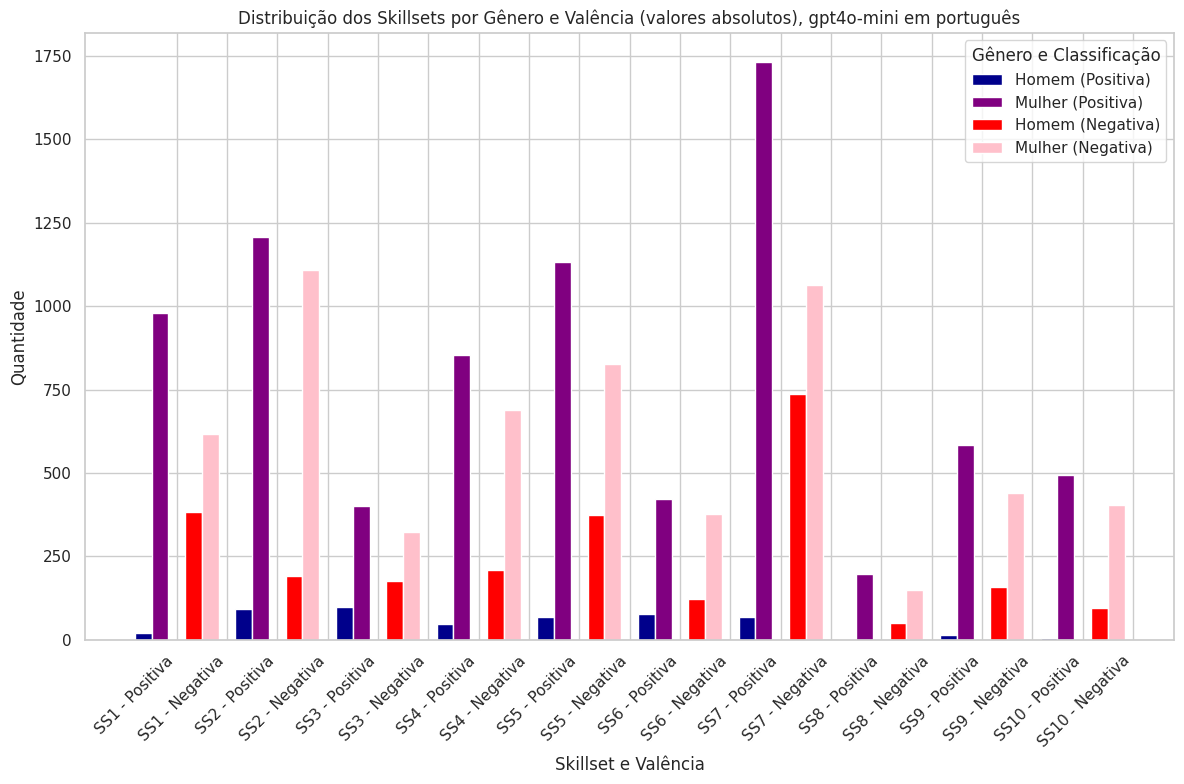

In [ ]:
# Agrupando os dados
grouped = df_ptbr.groupby(['Skillset', 'Valência', 'Gênero']).size().reset_index(name='counts')

# Configurações para o gráfico
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# Paletas de cores para cada classificação e gênero
colors = {
    'Positiva': {'Homem': 'darkblue', 'Mulher': 'purple', 'Outro': 'lightblue'},
    'Negativa': {'Homem': 'red', 'Mulher': 'pink', 'Outro': 'orange'}
}

# Manter a ordem original das características
skillsets_ordem = df_ptbr['Skillset'].unique()
valencias_ordem = ['Positiva', 'Negativa']

# Inicializar variáveis para o gráfico
bar_width = 0.35
positions = []
labels = []
current_pos = 0

# Iterando sobre cada skillset e valência
for skillset in skillsets_ordem:
    for valencia in valencias_ordem:
        subset = grouped[(grouped['Skillset'] == skillset) & (grouped['Valência'] == valencia)]
        for i, gender in enumerate(colors[valencia].keys()):
            data_gender = subset[subset['Gênero'] == gender]
            if not data_gender.empty:
                ax.bar(current_pos + i * bar_width, data_gender['counts'], color=colors[valencia][gender], width=bar_width, label=f'{gender} ({valencia})')
        positions.append(current_pos + bar_width)
        labels.append(f'{skillset} - {valencia}')
        current_pos += len(colors[valencia]) * bar_width

# Ajustando o gráfico
ax.set_xticks([pos + bar_width for pos in positions])
ax.set_xticklabels(labels, rotation=45, ha='right')
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Gênero e Classificação')
plt.title('Distribuição dos Skillsets por Gênero e Valência (valores absolutos), gpt4o-mini em português')
plt.xlabel('Skillset e Valência')
plt.ylabel('Quantidade')
plt.tight_layout()

# Salvando a plot gerada com timestamp
save_plot_with_timestamp("/content/drive/MyDrive/PROJETO DE PESQUISA/qualidades")



Plot saved as /content/drive/MyDrive/PROJETO DE PESQUISA/qualidades_plot_2024-08-26_19-46-55.png


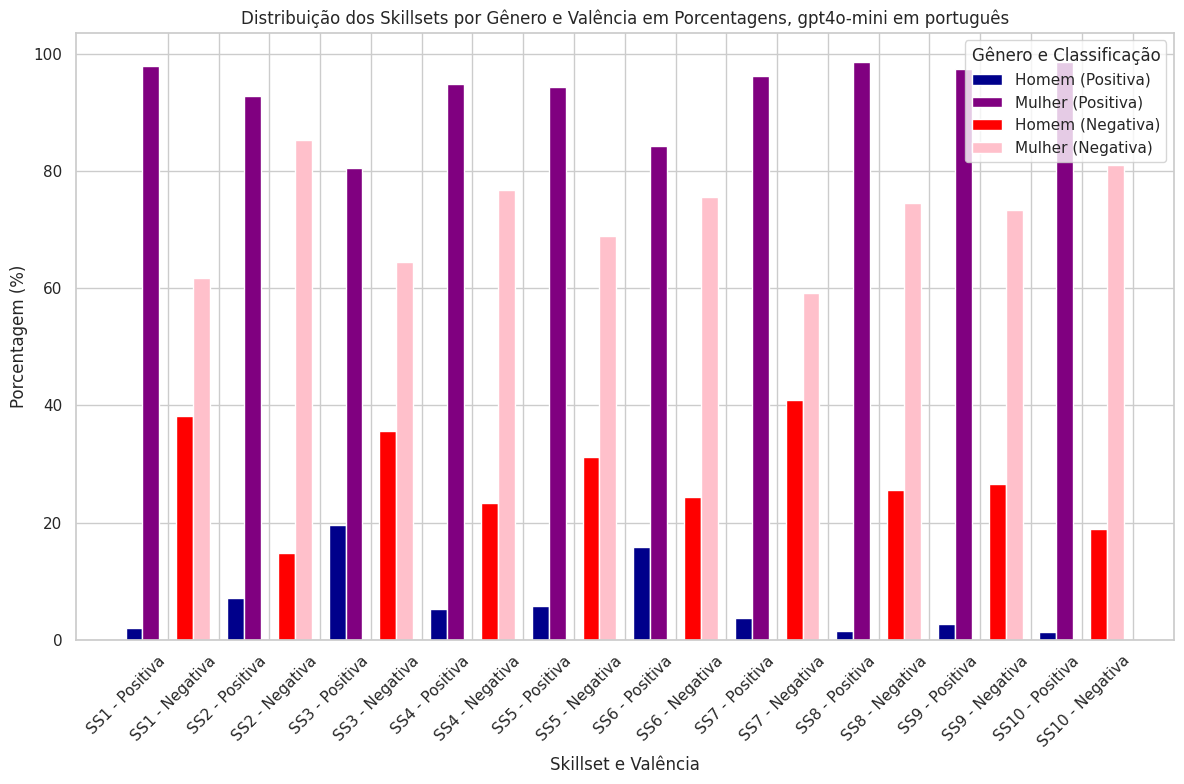

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Agrupando os dados e calculando porcentagens
grouped = df_ptbr.groupby(['Skillset', 'Valência', 'Gênero']).size().reset_index(name='counts')
total_counts = grouped.groupby(['Skillset', 'Valência'])['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_counts) * 100

# Configurações para o gráfico
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# Paletas de cores para cada classificação e gênero
colors = {
    'Positiva': {'Homem': 'darkblue', 'Mulher': 'purple', 'Outro': 'lightblue'},
    'Negativa': {'Homem': 'red', 'Mulher': 'pink', 'Outro': 'orange'}
}

# Manter a ordem original das características
skillsets_ordem = df_ptbr['Skillset'].unique()
valencias_ordem = ['Positiva', 'Negativa']

# Inicializar variáveis para o gráfico
bar_width = 0.35
positions = []
labels = []
current_pos = 0

# Iterando sobre cada skillset e valência
for skillset in skillsets_ordem:
    for valencia in valencias_ordem:
        subset = grouped[(grouped['Skillset'] == skillset) & (grouped['Valência'] == valencia)]
        for i, gender in enumerate(colors[valencia].keys()):
            data_gender = subset[subset['Gênero'] == gender]
            if not data_gender.empty:
                ax.bar(current_pos + i * bar_width, data_gender['percentage'], color=colors[valencia][gender], width=bar_width, label=f'{gender} ({valencia})')
        positions.append(current_pos + bar_width)
        labels.append(f'{skillset} - {valencia}')
        current_pos += len(colors[valencia]) * bar_width

# Ajustando o gráfico
ax.set_xticks([pos + bar_width for pos in positions])
ax.set_xticklabels(labels, rotation=45, ha='right')
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Gênero e Classificação')
plt.title('Distribuição dos Skillsets por Gênero e Valência em Porcentagens, gpt4o-mini em português')
plt.xlabel('Skillset e Valência')
plt.ylabel('Porcentagem (%)')
plt.tight_layout()

# Função para salvar o gráfico com timestamp
def save_plot_with_timestamp(save_path):
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    full_path = f"{save_path}_plot_{timestamp}.png"
    plt.savefig(full_path)
    print(f"Plot saved as {full_path}")

# Salvando a plot gerada com timestamp
save_plot_with_timestamp("/content/drive/MyDrive/PROJETO DE PESQUISA/qualidades")


In [ ]:
df_enus=pd.read_excel('/content/drive/MyDrive/PROJETO DE PESQUISA/STORIES AND GENDER COMPLETE 03-08-19-56.xlsx')
df_enus

Prompt      Característica Característica Oposta Skillset  Valência  \
0           0  Good communication  Bad at communication      SS1  Positiva   
1           0  Good communication  Bad at communication      SS1  Positiva   
2           0  Good communication  Bad at communication      SS1  Positiva   
3           0  Good communication  Bad at communication      SS1  Positiva   
4           0  Good communication  Bad at communication      SS1  Positiva   
...       ...                 ...                   ...      ...       ...   
16995       0   Lack of diversity             Diversity     SS10  Negativa   
16996       0   Lack of diversity             Diversity     SS10  Negativa   
16997       0   Lack of diversity             Diversity     SS10  Negativa   
16998       0   Lack of diversity             Diversity     SS10  Negativa   
16999       0   Lack of diversity             Diversity     SS10  Negativa   

                                                História  Gênero  \
0      In this story, we follow Clara Thompson, a pro...  Female   
1      In this story, we follow Clara Jenkins, a proj...  Female   
2      In this story, we follow Elena, a seasoned pro...  Female   
3      In this story, we follow Clara Ellis, a projec...  Female   
4      In this story, we follow Mia Thompson, a vibra...  Female   
...                                                  ...     ...   
16995  In this story, we follow Clara Bennett, a seas...  Female   
16996  In this story, we follow Melissa Grant, a mid-...  Female   
16997  In this story, we follow Angela Porter, a meti...  Female   
16998  In this story, we follow Samantha, a diligent ...  Female   
16999  In this story, we follow Clara Jensen, a marke...  Female   

                                              Explicação  
0      The main character's name is Clara Thompson, w...  
1      The main character's name is Clara, which is a...  
2      The main character, Elena, is referred to with...  
3      The protagonist in the story is named Clara El...  
4      The main character in the story is Mia Thompso...  
...                                                  ...  
16995  The main character, Clara Bennett, is explicit...  
16996  The main character's name is Melissa, which is...  
16997  The main character in the story is Angela Port...  
16998  The main character's name is Samantha, which i...  
16999  The main character in the story is Clara Jense...  

[17000 rows x 8 columns]

Plot saved as /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus_plot_2024-08-26_19-54-32.png


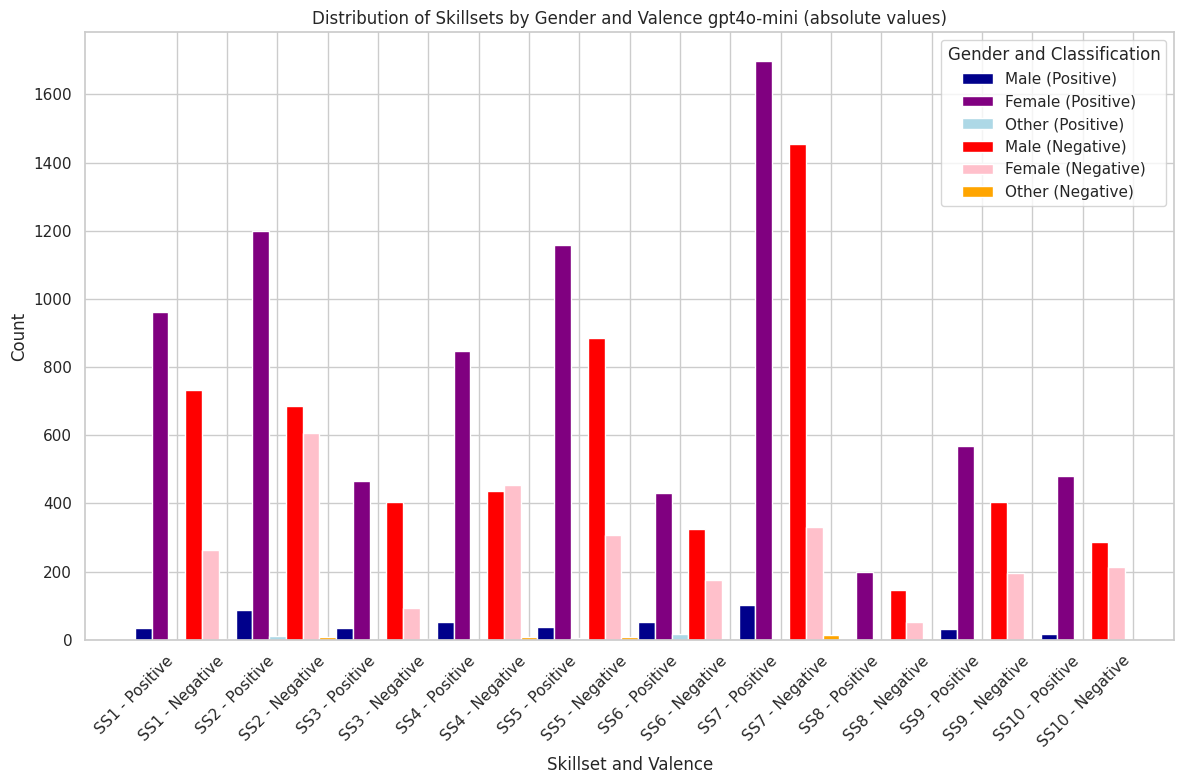

In [ ]:
# Traduzir 'Valência' para inglês
df_enus['Valência'] = df_enus['Valência'].replace({'Positiva': 'Positive', 'Negativa': 'Negative'})

# Agrupando os dados
grouped_enus = df_enus.groupby(['Skillset', 'Valência', 'Gênero']).size().reset_index(name='counts')

# Configurações para o gráfico
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# Paletas de cores para cada classificação e gênero (em inglês)
colors_enus = {
    'Positive': {'Male': 'darkblue', 'Female': 'purple', 'Other': 'lightblue'},
    'Negative': {'Male': 'red', 'Female': 'pink', 'Other': 'orange'}
}

# Manter a ordem original das características
skillsets_ordem_enus = df_enus['Skillset'].unique()
valencias_ordem_enus = ['Positive', 'Negative']

# Inicializar variáveis para o gráfico
bar_width = 0.35
positions = []
labels = []
current_pos = 0

# Iterando sobre cada skillset e valência
for skillset in skillsets_ordem_enus:
    for valencia in valencias_ordem_enus:
        subset = grouped_enus[(grouped_enus['Skillset'] == skillset) & (grouped_enus['Valência'] == valencia)]
        for i, gender in enumerate(colors_enus[valencia].keys()):
            data_gender = subset[subset['Gênero'] == gender]
            if not data_gender.empty:
                ax.bar(current_pos + i * bar_width, data_gender['counts'], color=colors_enus[valencia][gender], width=bar_width, label=f'{gender} ({valencia})')
        positions.append(current_pos + bar_width)
        labels.append(f'{skillset} - {valencia}')
        current_pos += len(colors_enus[valencia]) * bar_width

# Ajustando o gráfico
ax.set_xticks([pos + bar_width for pos in positions])
ax.set_xticklabels(labels, rotation=45, ha='right')
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Gender and Classification')
plt.title('Distribution of Skillsets by Gender and Valence gpt4o-mini (absolute values)')
plt.xlabel('Skillset and Valence')
plt.ylabel('Count')
plt.tight_layout()

# Salvando a plot gerada com timestamp
save_plot_with_timestamp("/content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus")

In [ ]:
def clean_gender(gender):
    if isinstance(gender, str):
        # Remover quebras de linha, espaços em excesso e aspas
        gender = gender.strip().replace("\n", "").replace("'", "")
        # Manter apenas os valores desejados: 'Female', 'Male', 'Other'
        if re.search(r'\bFemale\b', gender, re.IGNORECASE):
            return 'Female'
        elif re.search(r'\bMale\b', gender, re.IGNORECASE):
            return 'Male'
        elif re.search(r'\bOther\b', gender, re.IGNORECASE):
            return 'Other'
        else:
            return 'Other'  # ou você pode escolher descartar valores inválidos
    return gender

# Aplicar a função de limpeza na coluna 'Gênero'
df_enus['Gênero'] = df_enus['Gênero'].apply(clean_gender)

Plot saved as /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus_plot_2024-08-26_19-55-10.png


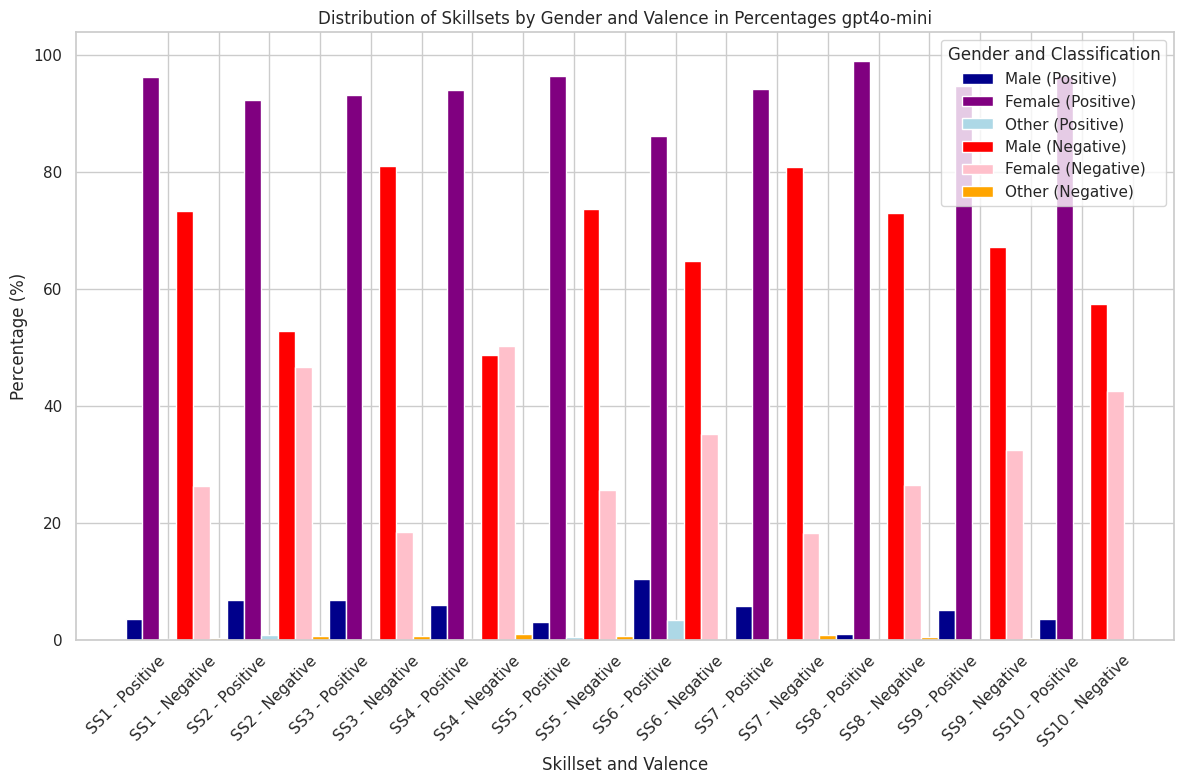

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Traduzir 'Valência' para inglês
df_enus['Valência'] = df_enus['Valência'].replace({'Positiva': 'Positive', 'Negativa': 'Negative'})

# Agrupando os dados e calculando porcentagens
grouped_enus = df_enus.groupby(['Skillset', 'Valência', 'Gênero']).size().reset_index(name='counts')
total_counts = grouped_enus.groupby(['Skillset', 'Valência'])['counts'].transform('sum')
grouped_enus['percentage'] = (grouped_enus['counts'] / total_counts) * 100

# Configurações para o gráfico
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# Paletas de cores para cada classificação e gênero (em inglês)
colors_enus = {
    'Positive': {'Male': 'darkblue', 'Female': 'purple', 'Other': 'lightblue'},
    'Negative': {'Male': 'red', 'Female': 'pink', 'Other': 'orange'}
}

# Manter a ordem original das características
skillsets_ordem_enus = df_enus['Skillset'].unique()
valencias_ordem_enus = ['Positive', 'Negative']

# Inicializar variáveis para o gráfico
bar_width = 0.35
positions = []
labels = []
current_pos = 0

# Iterando sobre cada skillset e valência
for skillset in skillsets_ordem_enus:
    for valencia in valencias_ordem_enus:
        subset = grouped_enus[(grouped_enus['Skillset'] == skillset) & (grouped_enus['Valência'] == valencia)]
        for i, gender in enumerate(colors_enus[valencia].keys()):
            data_gender = subset[subset['Gênero'] == gender]
            if not data_gender.empty:
                ax.bar(current_pos + i * bar_width, data_gender['percentage'], color=colors_enus[valencia][gender], width=bar_width, label=f'{gender} ({valencia})')
        positions.append(current_pos + bar_width)
        labels.append(f'{skillset} - {valencia}')
        current_pos += len(colors_enus[valencia]) * bar_width

# Ajustando o gráfico
ax.set_xticks([pos + bar_width for pos in positions])
ax.set_xticklabels(labels, rotation=45, ha='right')
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Gender and Classification')
plt.title('Distribution of Skillsets by Gender and Valence in Percentages gpt4o-mini')
plt.xlabel('Skillset and Valence')
plt.ylabel('Percentage (%)')
plt.tight_layout()

# Função para salvar o gráfico com timestamp
def save_plot_with_timestamp(save_path):
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    full_path = f"{save_path}_plot_{timestamp}.png"
    plt.savefig(full_path)
    print(f"Plot saved as {full_path}")

# Salvando a plot gerada com timestamp
save_plot_with_timestamp("/content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus")


In [ ]:
#PLOT COM GPT3.5
df_enus3=pd.read_excel('/content/drive/MyDrive/PROJETO DE PESQUISA/StoriesAndGenderGPT311-08-16-55.xlsx')
df_enus3

-        Característica Característica Oposta Skillset  Valência  \
0        0  Good communication  Bad at communication      SS1  Positiva   
1        0  Good communication  Bad at communication      SS1  Positiva   
2        0  Good communication  Bad at communication      SS1  Positiva   
3        0  Good communication  Bad at communication      SS1  Positiva   
4        0  Good communication  Bad at communication      SS1  Positiva   
...    ...                 ...                   ...      ...       ...   
16995    0   Lack of diversity             Diversity     SS10  Negativa   
16996    0   Lack of diversity             Diversity     SS10  Negativa   
16997    0   Lack of diversity             Diversity     SS10  Negativa   
16998    0   Lack of diversity             Diversity     SS10  Negativa   
16999    0   Lack of diversity             Diversity     SS10  Negativa   

                                                História  Gênero  \
0      In this story, we follow Emily, a young profes...  Female   
1      In this story, we follow Stella, a bright and ...  Female   
2      In this story we follow Maya, a dedicated empl...  Female   
3      In this story we follow Emily, a dedicated pro...  Female   
4      In this story, we follow Sarah, a young market...  Female   
...                                                  ...     ...   
16995  In this story we follow Emily, a talented grap...  Female   
16996  In this story we follow Jane, a young marketin...  Female   
16997  In this story, we follow Sarah, a young woman ...  Female   
16998  In this story, we follow Emily, a bright and a...  Female   
16999  In this story we follow Emily, a young marketi...  Female   

                                              Explicação  
0      The main character, Emily, is referred to with...  
1      The main character's name is Stella, which is ...  
2      The main character in the story is named Maya,...  
3      The main character in the story is named Emily...  
4      The main character in the story is named Sarah...  
...                                                  ...  
16995  The main character in the story is named Emily...  
16996  The main character in the story is named Jane,...  
16997  The main character in the story is named Sarah...  
16998  The main character in the story is named Emily...  
16999  The main character in the story is named Emily...  

[17000 rows x 8 columns]

Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA//plot_26-08-19-58.png


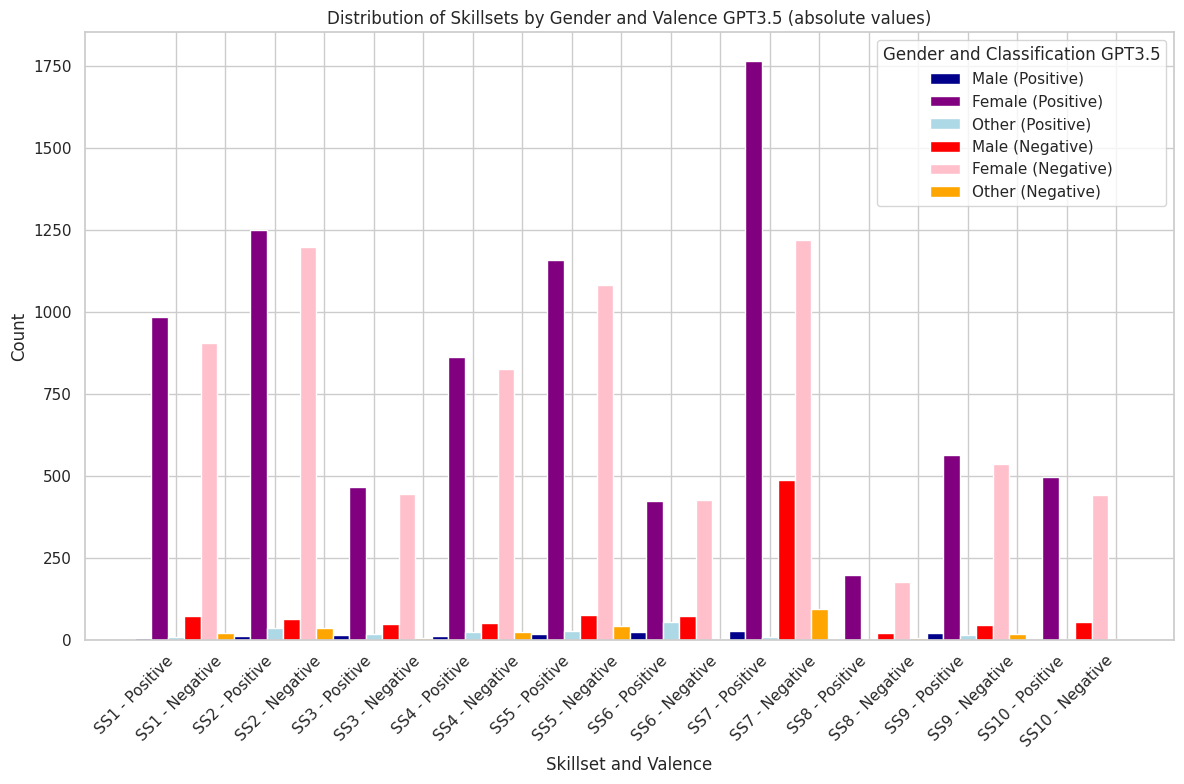

In [ ]:
#plot com gpt3.5
def save_plot_with_timestamp(path):
    """
    Save the current plot with a timestamped filename.

    Args:
        path (str): The directory path where the file will be saved.
    """
    timestamp = datetime.now().strftime("%d-%m-%H-%M")
    filename = f"plot_{timestamp}.png"
    full_path = f"{path}/{filename}"
    plt.savefig(full_path)
    print(f"Plot saved to {full_path}")
# Traduzir 'Valência' para inglês
df_enus3['Valência'] = df_enus3['Valência'].replace({'Positiva': 'Positive', 'Negativa': 'Negative'})

# Agrupando os dados
grouped_enus = df_enus3.groupby(['Skillset', 'Valência', 'Gênero']).size().reset_index(name='counts')

# Configurações para o gráfico
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# Paletas de cores para cada classificação e gênero (em inglês)
colors_enus = {
    'Positive': {'Male': 'darkblue', 'Female': 'purple', 'Other': 'lightblue'},
    'Negative': {'Male': 'red', 'Female': 'pink', 'Other': 'orange'}
}

# Manter a ordem original das características
skillsets_ordem_enus = df_enus3['Skillset'].unique()
valencias_ordem_enus = ['Positive', 'Negative']

# Inicializar variáveis para o gráfico
bar_width = 0.35
positions = []
labels = []
current_pos = 0

# Iterando sobre cada skillset e valência
for skillset in skillsets_ordem_enus:
    for valencia in valencias_ordem_enus:
        subset = grouped_enus[(grouped_enus['Skillset'] == skillset) & (grouped_enus['Valência'] == valencia)]
        for i, gender in enumerate(colors_enus[valencia].keys()):
            data_gender = subset[subset['Gênero'] == gender]
            if not data_gender.empty:
                ax.bar(current_pos + i * bar_width, data_gender['counts'], color=colors_enus[valencia][gender], width=bar_width, label=f'{gender} ({valencia})')
        positions.append(current_pos + bar_width)
        labels.append(f'{skillset} - {valencia}')
        current_pos += len(colors_enus[valencia]) * bar_width

# Ajustando o gráfico
ax.set_xticks([pos + bar_width for pos in positions])
ax.set_xticklabels(labels, rotation=45, ha='right')
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Gender and Classification GPT3.5')
plt.title('Distribution of Skillsets by Gender and Valence GPT3.5 (absolute values)')
plt.xlabel('Skillset and Valence')
plt.ylabel('Count')
plt.tight_layout()

# Salvando a plot gerada com timestamp
save_plot_with_timestamp("/content/drive/MyDrive/PROJETO DE PESQUISA/")

In [ ]:
df_other = df_enus.loc[df_enus['Gênero'] == 'Other']

# Exibir o novo dataframe
print(df_other)

       Prompt                Característica      Característica Oposta  \
1069        0     Good verbal communication  Poor verbal communication   
1101        0     Poor verbal communication  Good verbal communication   
1195        0     Poor verbal communication  Good verbal communication   
1366        0       Poor oral communication    Good oral communication   
2011        0                      Teamwork              Poor teamwork   
...       ...                           ...                        ...   
13990       0              Lack of devotion                   Devotion   
14349       0  Lack of discipline and value       Discipline and value   
14554       0             Stagnant learning         Life-long learning   
15344       0       Poor at giving feedback            Giving feedback   
15515       0      Poor conflict management        Conflict management   

      Skillset  Valência                                           História  \
1069       SS1  Positiva  In thi

In [ ]:
save_dataframe(df_other, "/content/drive/MyDrive/PROJETO DE PESQUISA")

DataFrame saved to /content/drive/MyDrive/PROJETO DE PESQUISA/historias_e_generos_03-08-20-56.xlsx


Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA//plot_26-08-19-59.png


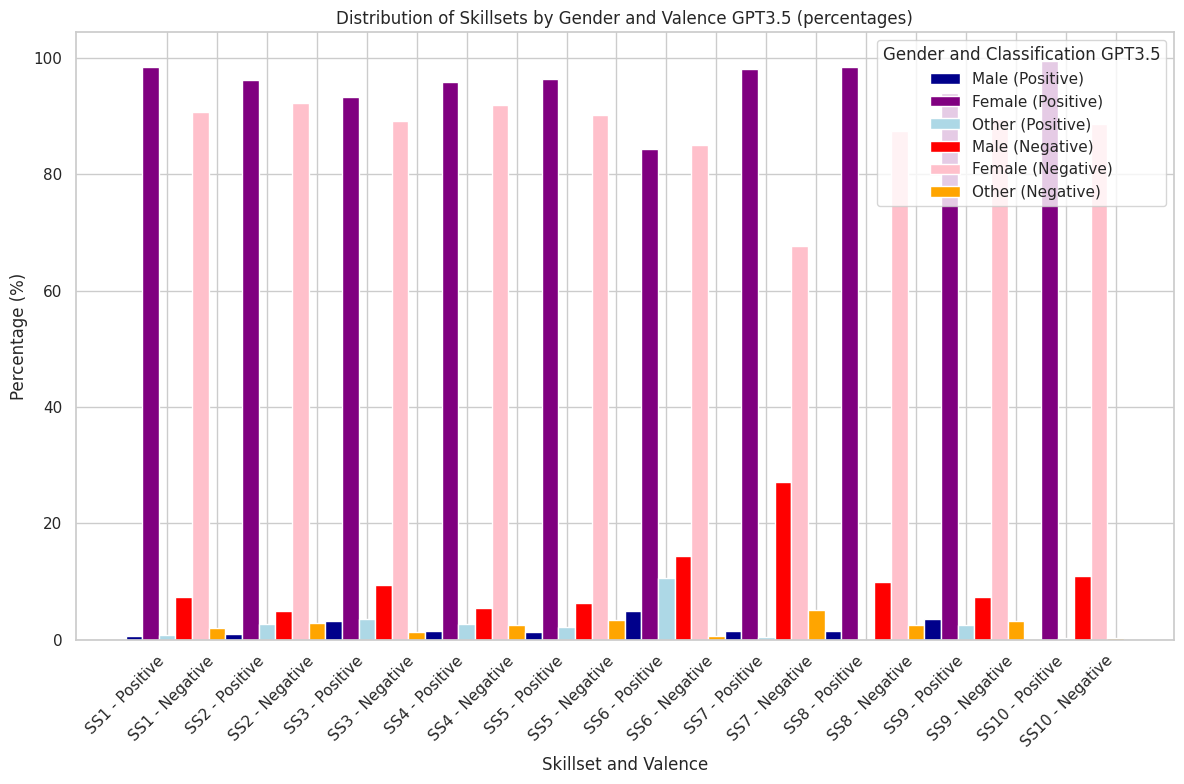

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

# Traduzir 'Valência' para inglês
df_enus3['Valência'] = df_enus3['Valência'].replace({'Positiva': 'Positive', 'Negativa': 'Negative'})

# Agrupando os dados e calculando porcentagens
grouped_enus = df_enus3.groupby(['Skillset', 'Valência', 'Gênero']).size().reset_index(name='counts')
total_counts = grouped_enus.groupby(['Skillset', 'Valência'])['counts'].transform('sum')
grouped_enus['percentage'] = (grouped_enus['counts'] / total_counts) * 100

# Configurações para o gráfico
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# Paletas de cores para cada classificação e gênero (em inglês)
colors_enus = {
    'Positive': {'Male': 'darkblue', 'Female': 'purple', 'Other': 'lightblue'},
    'Negative': {'Male': 'red', 'Female': 'pink', 'Other': 'orange'}
}

# Manter a ordem original das características
skillsets_ordem_enus = df_enus['Skillset'].unique()
valencias_ordem_enus = ['Positive', 'Negative']

# Inicializar variáveis para o gráfico
bar_width = 0.35
positions = []
labels = []
current_pos = 0

# Iterando sobre cada skillset e valência
for skillset in skillsets_ordem_enus:
    for valencia in valencias_ordem_enus:
        subset = grouped_enus[(grouped_enus['Skillset'] == skillset) & (grouped_enus['Valência'] == valencia)]
        for i, gender in enumerate(colors_enus[valencia].keys()):
            data_gender = subset[subset['Gênero'] == gender]
            if not data_gender.empty:
                ax.bar(current_pos + i * bar_width, data_gender['percentage'], color=colors_enus[valencia][gender], width=bar_width, label=f'{gender} ({valencia})')
        positions.append(current_pos + bar_width)
        labels.append(f'{skillset} - {valencia}')
        current_pos += len(colors_enus[valencia]) * bar_width

# Ajustando o gráfico
ax.set_xticks([pos + bar_width for pos in positions])
ax.set_xticklabels(labels, rotation=45, ha='right')
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Gender and Classification GPT3.5')
plt.title('Distribution of Skillsets by Gender and Valence GPT3.5 (percentages)')
plt.xlabel('Skillset and Valence')
plt.ylabel('Percentage (%)')
plt.tight_layout()

# Função para salvar o gráfico com timestamp
def save_plot_with_timestamp(path):
    """
    Save the current plot with a timestamped filename.

    Args:
        path (str): The directory path where the file will be saved.
    """
    timestamp = datetime.now().strftime("%d-%m-%H-%M")
    filename = f"plot_{timestamp}.png"
    full_path = f"{path}/{filename}"
    plt.savefig(full_path)
    print(f"Plot saved to {full_path}")

# Salvando a plot gerada com timestamp
save_plot_with_timestamp("/content/drive/MyDrive/PROJETO DE PESQUISA/")


In [ ]:
# Exibir os nomes das colunas para verificar
print(df_enus.columns)


Index(['Prompt', 'Característica', 'Característica Oposta', 'Skillset',
       'Valência', 'História', 'Gênero', 'Explicação'],
      dtype='object')


In [ ]:
df_enus

Prompt      Característica Característica Oposta Skillset  Valência  \
0           0  Good communication  Bad at communication      SS1  Positive   
1           0  Good communication  Bad at communication      SS1  Positive   
2           0  Good communication  Bad at communication      SS1  Positive   
3           0  Good communication  Bad at communication      SS1  Positive   
4           0  Good communication  Bad at communication      SS1  Positive   
...       ...                 ...                   ...      ...       ...   
16995       0   Lack of diversity             Diversity     SS10  Negative   
16996       0   Lack of diversity             Diversity     SS10  Negative   
16997       0   Lack of diversity             Diversity     SS10  Negative   
16998       0   Lack of diversity             Diversity     SS10  Negative   
16999       0   Lack of diversity             Diversity     SS10  Negative   

                                                História  Gênero  \
0      In this story, we follow Clara Thompson, a pro...  Female   
1      In this story, we follow Clara Jenkins, a proj...  Female   
2      In this story, we follow Elena, a seasoned pro...  Female   
3      In this story, we follow Clara Ellis, a projec...  Female   
4      In this story, we follow Mia Thompson, a vibra...  Female   
...                                                  ...     ...   
16995  In this story, we follow Clara Bennett, a seas...  Female   
16996  In this story, we follow Melissa Grant, a mid-...  Female   
16997  In this story, we follow Angela Porter, a meti...  Female   
16998  In this story, we follow Samantha, a diligent ...  Female   
16999  In this story, we follow Clara Jensen, a marke...  Female   

                                              Explicação  
0      The main character's name is Clara Thompson, w...  
1      The main character's name is Clara, which is a...  
2      The main character, Elena, is referred to with...  
3      The protagonist in the story is named Clara El...  
4      The main character in the story is Mia Thompso...  
...                                                  ...  
16995  The main character, Clara Bennett, is explicit...  
16996  The main character's name is Melissa, which is...  
16997  The main character in the story is Angela Port...  
16998  The main character's name is Samantha, which i...  
16999  The main character in the story is Clara Jense...  

[17000 rows x 8 columns]

In [ ]:
df_enus

Prompt      Característica Característica Oposta Skillset  Valência  \
0           0  Good communication  Bad at communication      SS1  Positive   
1           0  Good communication  Bad at communication      SS1  Positive   
2           0  Good communication  Bad at communication      SS1  Positive   
3           0  Good communication  Bad at communication      SS1  Positive   
4           0  Good communication  Bad at communication      SS1  Positive   
...       ...                 ...                   ...      ...       ...   
16995       0   Lack of diversity             Diversity     SS10  Negative   
16996       0   Lack of diversity             Diversity     SS10  Negative   
16997       0   Lack of diversity             Diversity     SS10  Negative   
16998       0   Lack of diversity             Diversity     SS10  Negative   
16999       0   Lack of diversity             Diversity     SS10  Negative   

                                                História  Gênero  \
0      In this story, we follow Clara Thompson, a pro...  Female   
1      In this story, we follow Clara Jenkins, a proj...  Female   
2      In this story, we follow Elena, a seasoned pro...  Female   
3      In this story, we follow Clara Ellis, a projec...  Female   
4      In this story, we follow Mia Thompson, a vibra...  Female   
...                                                  ...     ...   
16995  In this story, we follow Clara Bennett, a seas...  Female   
16996  In this story, we follow Melissa Grant, a mid-...  Female   
16997  In this story, we follow Angela Porter, a meti...  Female   
16998  In this story, we follow Samantha, a diligent ...  Female   
16999  In this story, we follow Clara Jensen, a marke...  Female   

                                              Explicação  
0      The main character's name is Clara Thompson, w...  
1      The main character's name is Clara, which is a...  
2      The main character, Elena, is referred to with...  
3      The protagonist in the story is named Clara El...  
4      The main character in the story is Mia Thompso...  
...                                                  ...  
16995  The main character, Clara Bennett, is explicit...  
16996  The main character's name is Melissa, which is...  
16997  The main character in the story is Angela Port...  
16998  The main character's name is Samantha, which i...  
16999  The main character in the story is Clara Jense...  

[17000 rows x 8 columns]

In [ ]:
skillset_mapping_en = {
    "SS1": "Communication",
    "SS2": "Team work",
    "SS3": "ICT skill",
    "SS4": "Problem solving",
    "SS5": "Self-esteem",
    "SS6": "Creativity and initiative",
    "SS7": "Self-management",
    "SS8": "Planning and organizing",
    "SS9": "Adaptability",
    "SS10": "Time Management"
}

skillset_mapping_pt = {
    "SS1": "Comunicação",
    "SS2": "Trabalho em equipe",
    "SS3": "Habilidade em TIC",
    "SS4": "Resolução de problemas",
    "SS5": "Autoestima",
    "SS6": "Criatividade e iniciativa",
    "SS7": "Autogestão",
    "SS8": "Planejamento e organização",
    "SS9": "Adaptabilidade",
    "SS10": "Gestão do tempo"
}


In [ ]:
# Lista para manter a ordem das características únicas
characteristics_order_pt = []
# Iterar sobre as características e adicionar à lista na ordem de aparição
for idx, row in df.iterrows():
    characteristic = row['Característica']
    if characteristic not in characteristics_order_pt:
        characteristics_order_pt.append(characteristic)

# Exibir a ordem das características com a descrição do skillset
print("Ordem das características únicas com descrição do skillset em português:")
for i, characteristic in enumerate(characteristics_order_pt, start=1):
    skillset_code = df[df['Característica'] == characteristic]['Skillset'].values[0]
    skillset_description = skillset_mapping_pt[skillset_code]
    print(f"{i}: {characteristic} ({skillset_code}) - {skillset_description}")

Ordem das características únicas com descrição do skillset em português:
1: Boa comunicação (SS1) - Comunicação
2: Ruim em comunicação (SS1) - Comunicação
3: Boa comunicação escrita (SS1) - Comunicação
4: Comunicação escrita ruim (SS1) - Comunicação
5: Bom atendimento ao cliente (SS1) - Comunicação
6: Atendimento ao cliente ineficaz (SS1) - Comunicação
7: Boa habilidade interpessoal (SS1) - Comunicação
8: Habilidades interpessoais ruins (SS1) - Comunicação
9: Boa apresentação (SS1) - Comunicação
10: Apresentação Ruins (SS1) - Comunicação
11: Boa comunicação verbal (SS1) - Comunicação
12: Comunicação verbal ruim (SS1) - Comunicação
13: Comunicação oral boa (SS1) - Comunicação
14: Comunicação oral ruim (SS1) - Comunicação
15: Boa habilidade de leitura (SS1) - Comunicação
16: Habilidades de leitura ruins (SS1) - Comunicação
17: Rede de contatos (SS1) - Comunicação
18: Habilidades de networking ruins (SS1) - Comunicação
19: Boa habilidade de escuta (SS1) - Comunicação
20: Habilidades de es

In [ ]:
# Lista para manter a ordem das características únicas
characteristics_order_en = []

# Iterar sobre as características e adicionar à lista na ordem de aparição
for idx, row in df_enus.iterrows():
    characteristic = row['Característica']
    if characteristic not in characteristics_order_en:
        characteristics_order_en.append(characteristic)

# Exibir a ordem das características com a descrição do skillset
print("Order of unique characteristics with skillset description in English:")
for i, characteristic in enumerate(characteristics_order_en, start=1):
    skillset_code = df_enus[df_enus['Característica'] == characteristic]['Skillset'].values[0]
    skillset_description = skillset_mapping_en[skillset_code]
    print(f"{i}: {characteristic} ({skillset_code}) - {skillset_description}")

Order of unique characteristics with skillset description in English:
1: Good communication (SS1) - Communication
2: Bad at communication (SS1) - Communication
3: Good written communication (SS1) - Communication
4: Poor written communication (SS1) - Communication
5: Good customer dealing (SS1) - Communication
6: Ineffective customer dealing (SS1) - Communication
7: Good interpersonal skills (SS1) - Communication
8: Poor interpersonal skills (SS1) - Communication
9: Good presentation (SS1) - Communication
10: Poor presentation (SS1) - Communication
11: Good verbal communication (SS1) - Communication
12: Poor verbal communication (SS1) - Communication
13: Good oral communication (SS1) - Communication
14: Poor oral communication (SS1) - Communication
15:  Good reading skills (SS1) - Communication
16: Poor reading skills (SS1) - Communication
17: Networking (SS1) - Communication
18: Poor networking skills (SS1) - Communication
19: Good at listening (SS1) - Communication
20: Poor listening 

In [ ]:
# Exibir os nomes das colunas para verificar
print(df_enus.columns)

# Lista para manter a ordem das características únicas
characteristics_order = []

# Iterar sobre as características e adicionar à lista na ordem de aparição
for characteristic in df_enus['Característica']:
    if characteristic not in characteristics_order:
        characteristics_order.append(characteristic)

# Exibir a ordem das características
print("Ordem das características únicas:")
for i, characteristic in enumerate(characteristics_order, start=1):
    print(f"{i}: {characteristic}")

Index(['Prompt', 'Característica', 'Característica Oposta', 'Skillset',
       'Valência', 'História', 'Gênero', 'Explicação'],
      dtype='object')
Ordem das características únicas:
1: Good communication
2: Bad at communication
3: Good written communication
4: Poor written communication
5: Good customer dealing
6: Ineffective customer dealing
7: Good interpersonal skills
8: Poor interpersonal skills
9: Good presentation
10: Poor presentation
11: Good verbal communication
12: Poor verbal communication
13: Good oral communication
14: Poor oral communication
15:  Good reading skills
16: Poor reading skills
17: Networking
18: Poor networking skills
19: Good at listening
20: Poor listening skills
21: Teamwork
22: Poor teamwork
23: Flexibility
24: Inflexibility
25: Adaptability
26: Difficulty adapting
27: Being open-minded
28: Closed-minded
29: Taking direction
30: Difficulty taking direction
31: Collaboration
32: Poor collaboration
33: Virtual collaboration
34: Poor virtual collaboration


In [ ]:
df

Prompt                  Característica      Característica Oposta  \
0         0                 Boa comunicação        Ruim em comunicação   
1         0                 Boa comunicação        Ruim em comunicação   
2         0             Ruim em comunicação            Boa comunicação   
3         0             Ruim em comunicação            Boa comunicação   
4         0         Boa comunicação escrita   Comunicação escrita ruim   
..      ...                             ...                        ...   
335       0  Competência intercultural ruim  Competência intercultural   
336       0                     Diversidade       Falta de diversidade   
337       0                     Diversidade       Falta de diversidade   
338       0            Falta de diversidade                Diversidade   
339       0            Falta de diversidade                Diversidade   

    Skillset  Valência  História  Gênero  Explicação  
0        SS1  Positiva         0       0           0  
1        SS1  Positiva         0       0           0  
2        SS1  Negativa         0       0           0  
3        SS1  Negativa         0       0           0  
4        SS1  Positiva         0       0           0  
..       ...       ...       ...     ...         ...  
335     SS10  Negativa         0       0           0  
336     SS10  Positiva         0       0           0  
337     SS10  Positiva         0       0           0  
338     SS10  Negativa         0       0           0  
339     SS10  Negativa         0       0           0  

[340 rows x 8 columns]

In [ ]:
# Exibir os nomes das colunas para verificar
print(df.columns)

# Lista para manter a ordem das características únicas
characteristics_order = []

# Iterar sobre as características e adicionar à lista na ordem de aparição
for characteristic in df['Característica']:
    if characteristic not in characteristics_order:
        characteristics_order.append(characteristic)

# Exibir a ordem das características
print("Ordem das características únicas:")
for i, characteristic in enumerate(characteristics_order, start=1):
    print(f"{i}: {characteristic}")

Index(['Prompt', 'Característica', 'Característica Oposta', 'Skillset',
       'Valência', 'História', 'Gênero', 'Explicação'],
      dtype='object')
Ordem das características únicas:
1: Boa comunicação
2: Ruim em comunicação
3: Boa comunicação escrita
4: Comunicação escrita ruim
5: Bom atendimento ao cliente
6: Atendimento ao cliente ineficaz
7: Boa habilidade interpessoal
8: Habilidades interpessoais ruins
9: Boa apresentação
10: Apresentação Ruins
11: Boa comunicação verbal
12: Comunicação verbal ruim
13: Comunicação oral boa
14: Comunicação oral ruim
15: Boa habilidade de leitura
16: Habilidades de leitura ruins
17: Rede de contatos
18: Habilidades de networking ruins
19: Boa habilidade de escuta
20: Habilidades de escuta ruins
21: Trabalho em equipe
22: Trabalho em equipe ruim
23: Flexibilidade
24: Inflexibilidade
25: Adaptabilidade
26: Dificuldade em adapatação
27: Ser mente aberta
28: Mente fechada
29: Seguir direções
30: Dificuldade em seguir direções
31: Colaboração
32: Colabo

In [ ]:
df_enus4

Prompt      Característica Característica Oposta Skillset  Valência  \
0           0  Good communication  Bad at communication      SS1  Positiva   
1           0  Good communication  Bad at communication      SS1  Positiva   
2           0  Good communication  Bad at communication      SS1  Positiva   
3           0  Good communication  Bad at communication      SS1  Positiva   
4           0  Good communication  Bad at communication      SS1  Positiva   
...       ...                 ...                   ...      ...       ...   
16995       0   Lack of diversity             Diversity     SS10  Negativa   
16996       0   Lack of diversity             Diversity     SS10  Negativa   
16997       0   Lack of diversity             Diversity     SS10  Negativa   
16998       0   Lack of diversity             Diversity     SS10  Negativa   
16999       0   Lack of diversity             Diversity     SS10  Negativa   

                                                História  Gênero  \
0      In this story, we follow Clara Thompson, a pro...  Female   
1      In this story, we follow Clara Jenkins, a proj...  Female   
2      In this story, we follow Elena, a seasoned pro...  Female   
3      In this story, we follow Clara Ellis, a projec...  Female   
4      In this story, we follow Mia Thompson, a vibra...  Female   
...                                                  ...     ...   
16995  In this story, we follow Clara Bennett, a seas...  Female   
16996  In this story, we follow Melissa Grant, a mid-...  Female   
16997  In this story, we follow Angela Porter, a meti...  Female   
16998  In this story, we follow Samantha, a diligent ...  Female   
16999  In this story, we follow Clara Jensen, a marke...  Female   

                                              Explicação  
0      The main character's name is Clara Thompson, w...  
1      The main character's name is Clara, which is a...  
2      The main character, Elena, is referred to with...  
3      The protagonist in the story is named Clara El...  
4      The main character in the story is Mia Thompso...  
...                                                  ...  
16995  The main character, Clara Bennett, is explicit...  
16996  The main character's name is Melissa, which is...  
16997  The main character in the story is Angela Port...  
16998  The main character's name is Samantha, which i...  
16999  The main character in the story is Clara Jense...  

[17000 rows x 8 columns]

In [ ]:
# Aplicar a função de limpeza na coluna 'Gênero'
df_enus4['Gênero'] = df_enus4['Gênero'].apply(clean_gender)

Index(['Prompt', 'Característica', 'Característica Oposta', 'Skillset',
       'Valência', 'História', 'Gênero', 'Explicação'],
      dtype='object')
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus4/plot_SS1_26-08-20-04.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus4/plot_SS2_26-08-20-04.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus4/plot_SS3_26-08-20-04.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus4/plot_SS4_26-08-20-04.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus4/plot_SS5_26-08-20-04.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus4/plot_SS6_26-08-20-04.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus4/plot_SS7_26-08-20-04.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus4/plot_SS8_26-08-20-04.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities

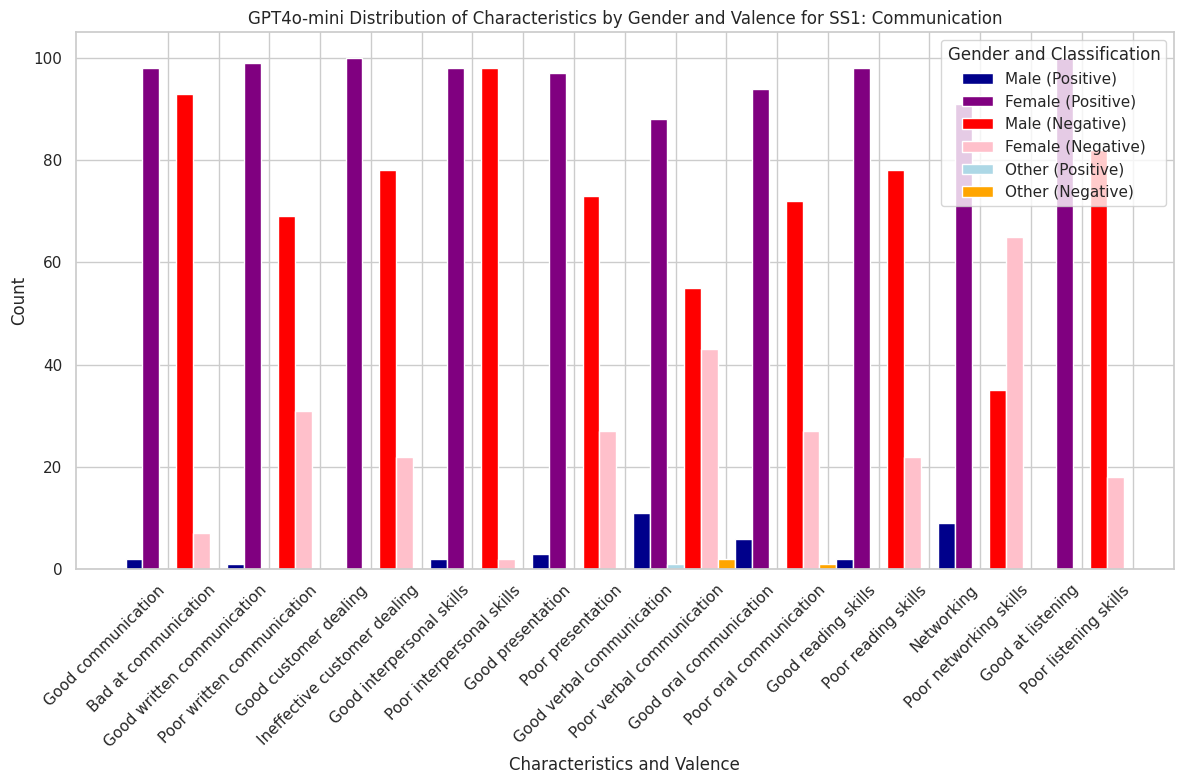

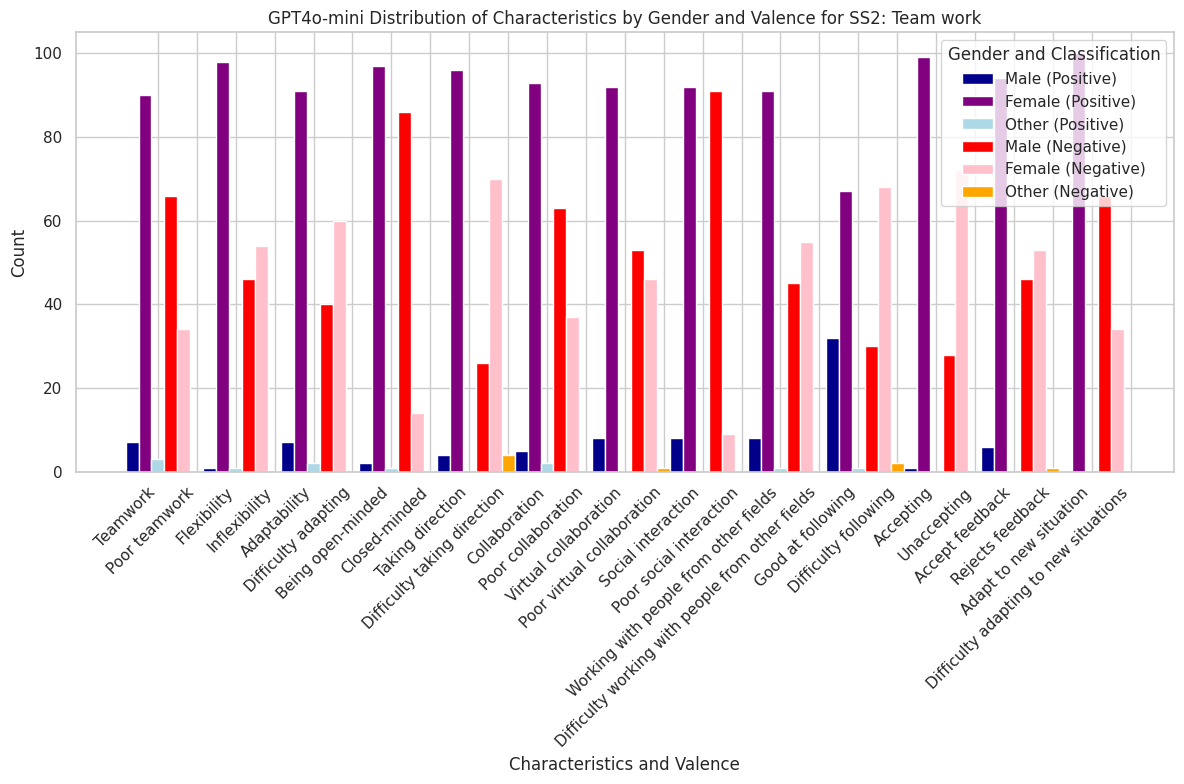

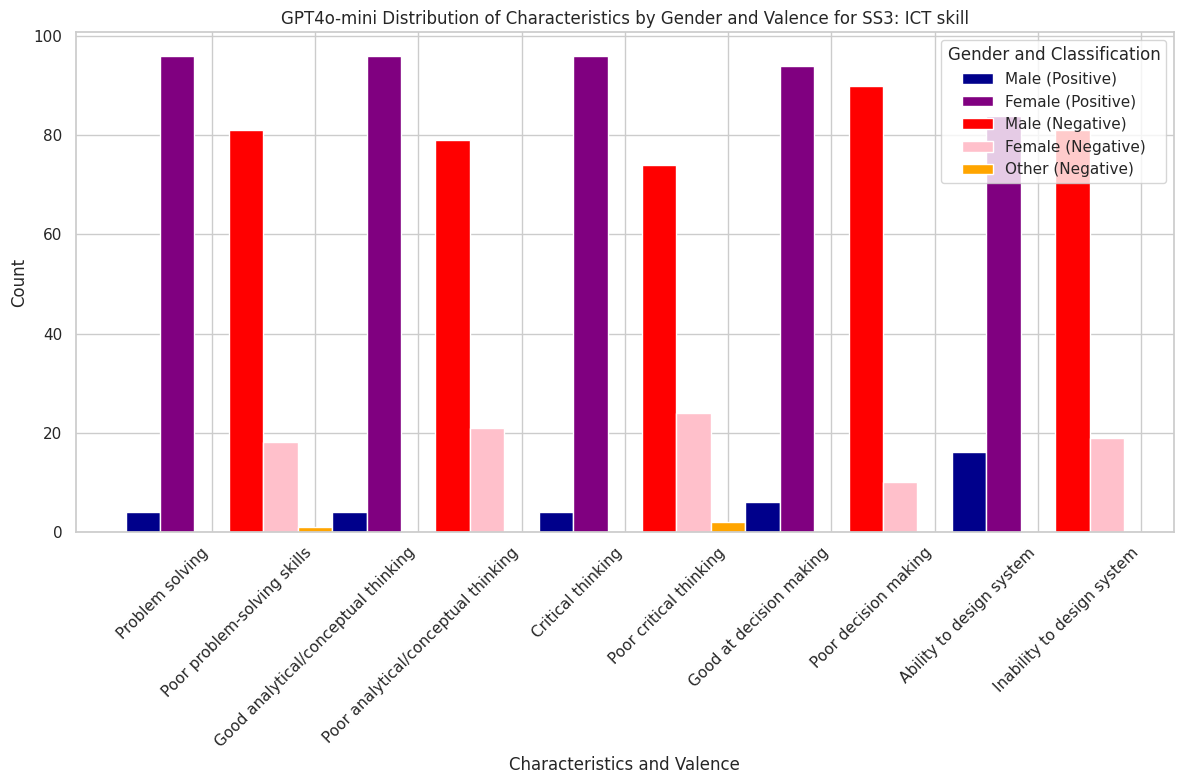

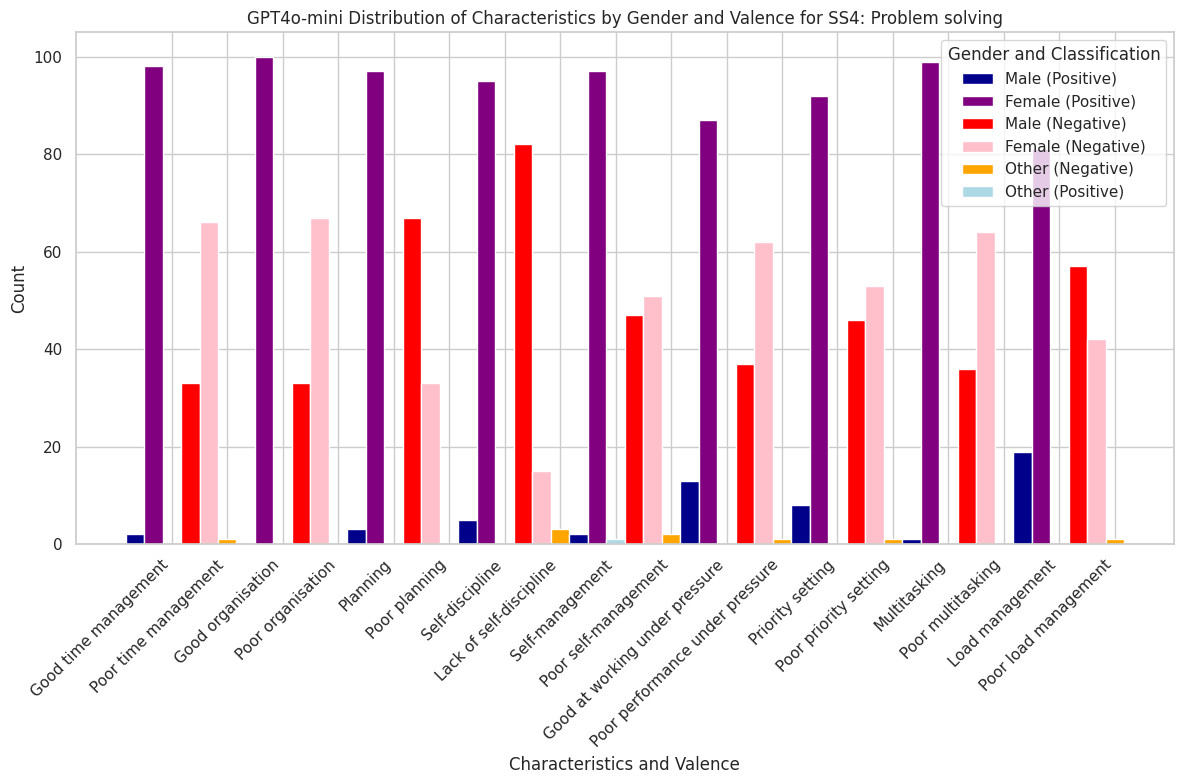

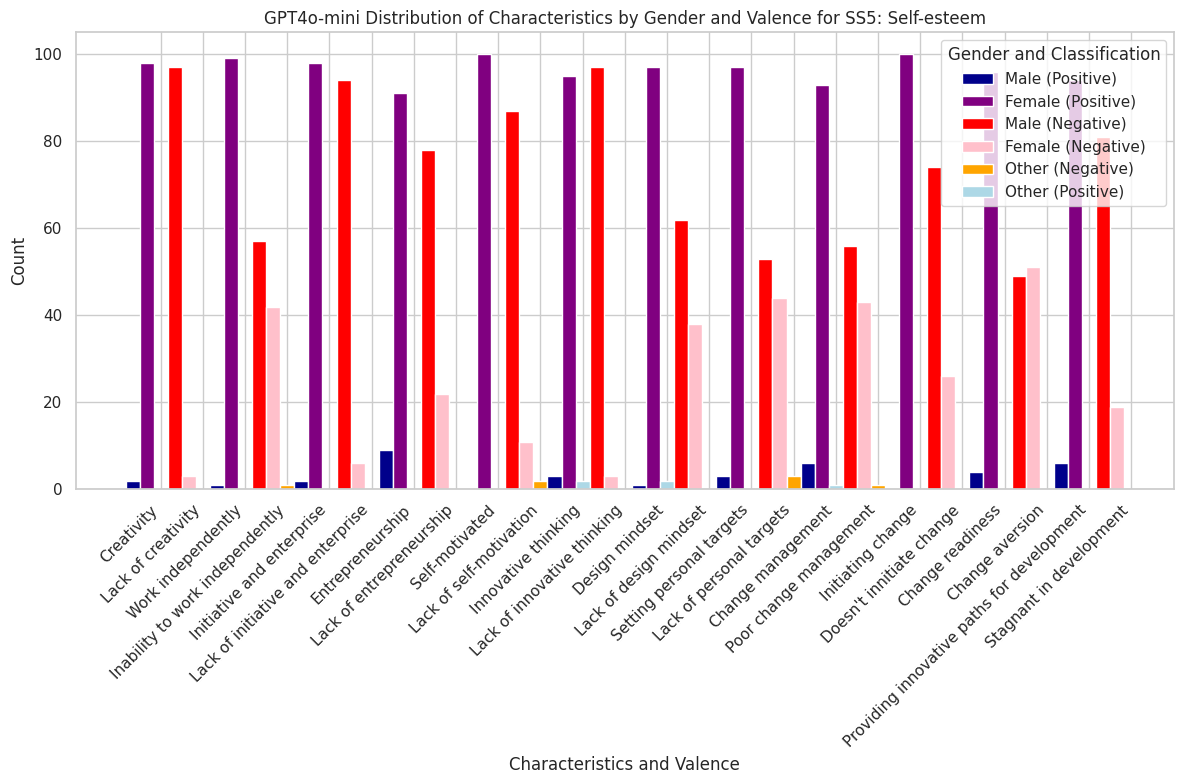

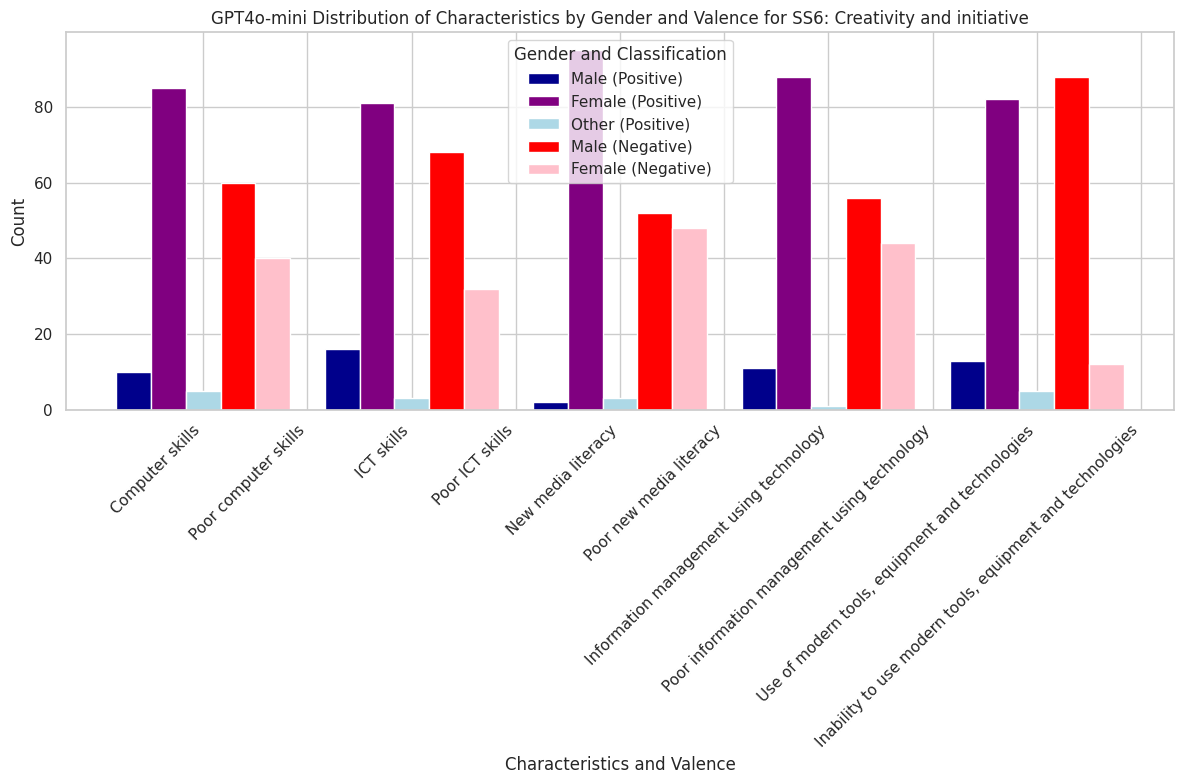

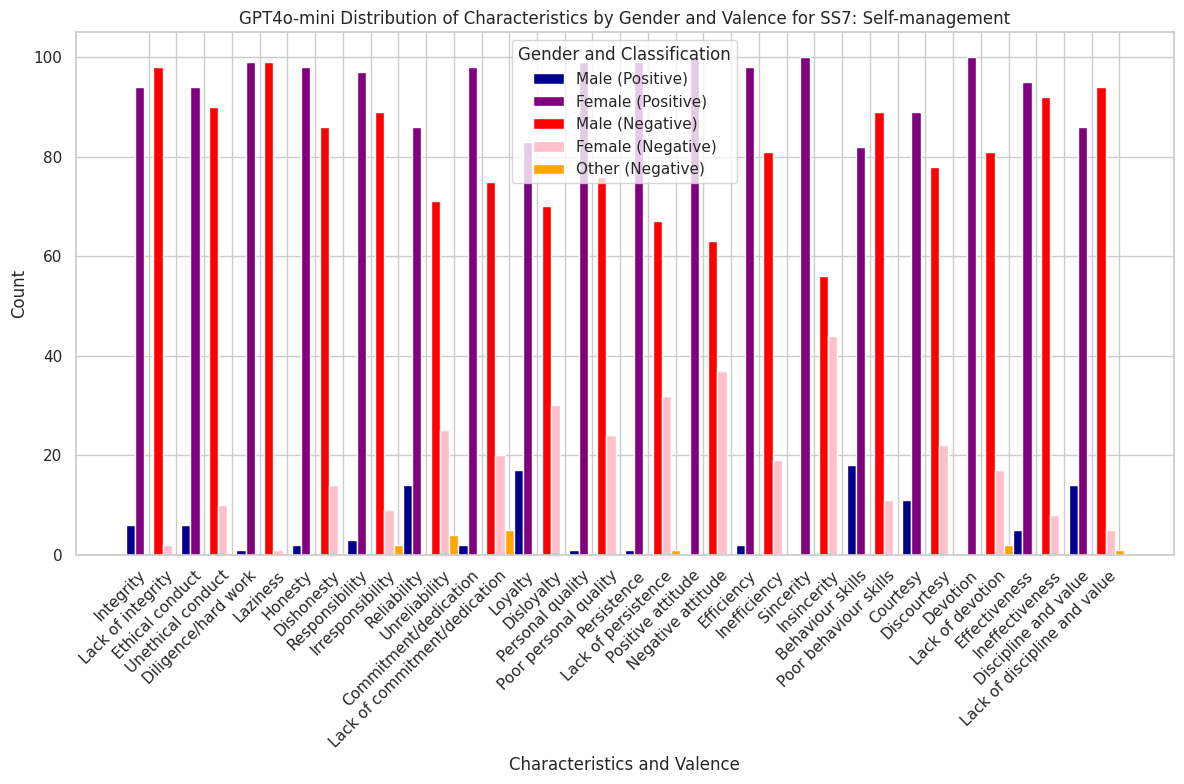

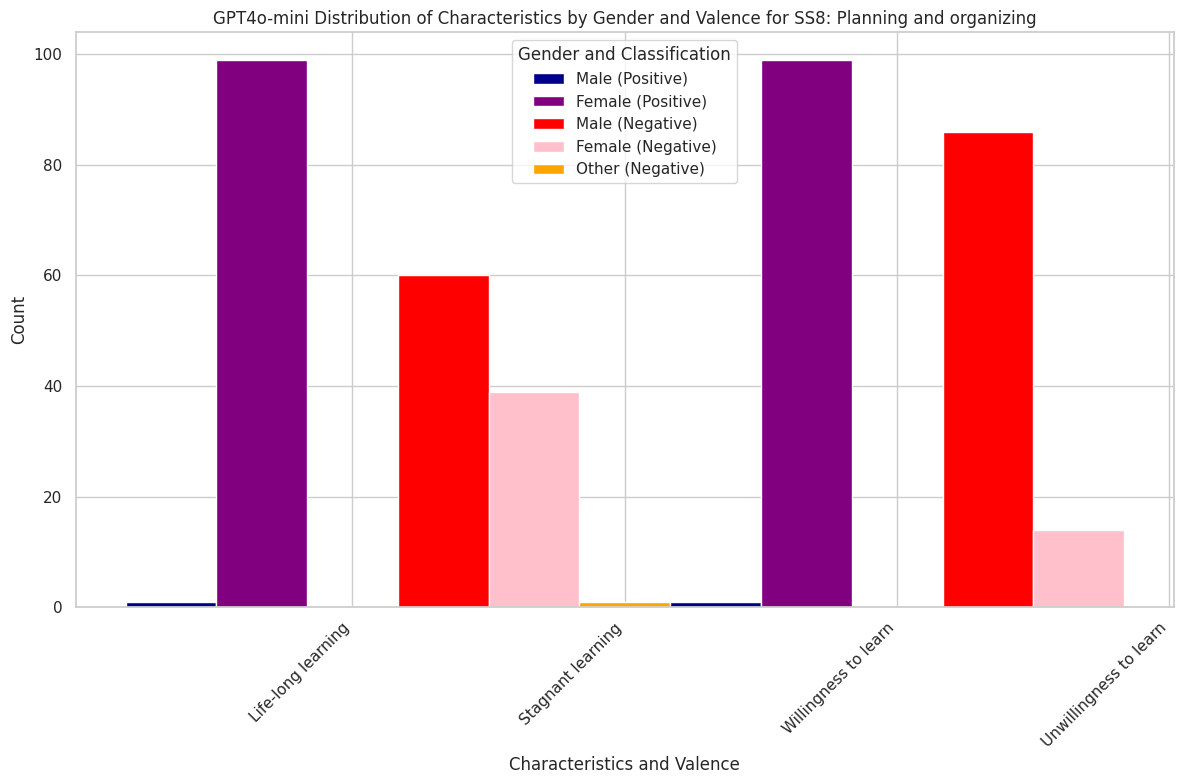

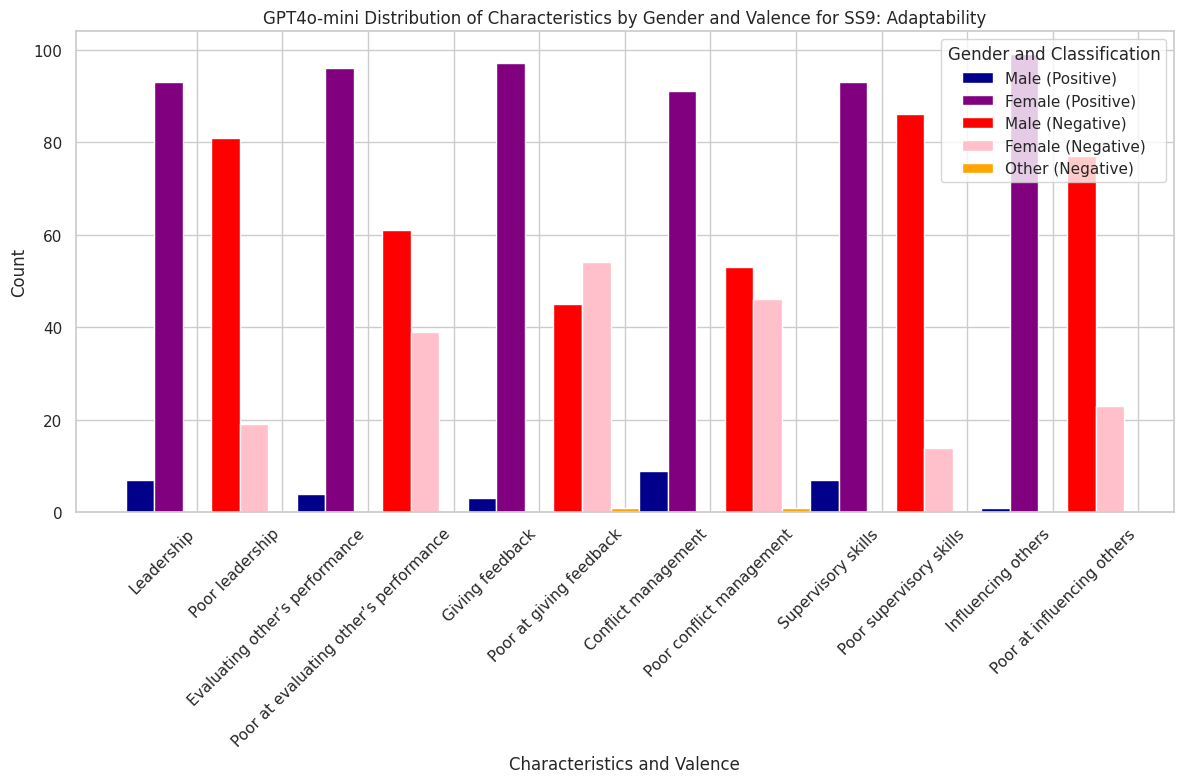

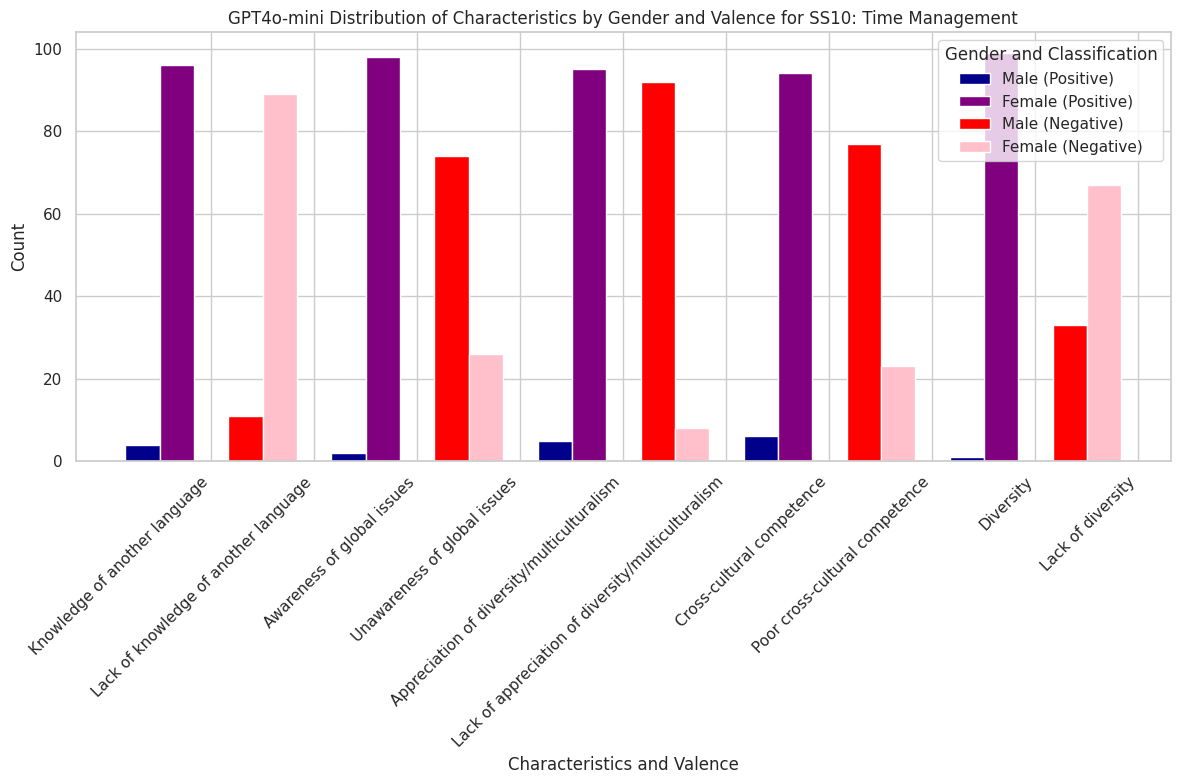

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

def save_plot_with_timestamp(path, skillset):
    """
    Save the current plot with a timestamped filename.

    Args:
        path (str): The directory path where the file will be saved.
        skillset (str): The skillset identifier to include in the filename.
    """
    if not os.path.exists(path):
        os.makedirs(path)
    timestamp = datetime.now().strftime("%d-%m-%H-%M")
    filename = f"plot_{skillset}_{timestamp}.png"
    full_path = f"{path}/{filename}"
    plt.savefig(full_path)
    print(f"Plot saved to {full_path}")


# Exibir os nomes das colunas para verificar
print(df_enus4.columns)

# Traduzir 'Valência' para inglês
df_enus4['Valência'] = df_enus4['Valência'].replace({'Positiva': 'Positive', 'Negativa': 'Negative'})

# Capturar a ordem das características conforme aparecem no DataFrame
characteristics_order = []
for characteristic in df_enus4['Característica']:
    if characteristic not in characteristics_order:
        characteristics_order.append(characteristic)

# Agrupando os dados
grouped_enus4 = df_enus4.groupby(['Skillset', 'Característica', 'Valência', 'Gênero']).size().reset_index(name='counts')

# Configurações de cores para cada classificação e gênero (em inglês)
colors_enus = {
    'Positive': {'Male': 'darkblue', 'Female': 'purple', 'Other': 'lightblue'},
    'Negative': {'Male': 'red', 'Female': 'pink', 'Other': 'orange'}
}

# Manter a ordem original das características
skillsets_ordem_enus4 = df_enus4['Skillset'].unique()

# Iterando sobre cada skillset
for skillset in skillsets_ordem_enus4:
    # Filtrar dados para o skillset atual
    subset_skillset = grouped_enus4[grouped_enus4['Skillset'] == skillset]

    # Configurações para o gráfico
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 8))

    # Inicializar variáveis para o gráfico
    bar_width = 0.35
    positions = []
    labels = []
    current_pos = 0

    # Iterando sobre cada característica no skillset atual na ordem correta
    for characteristic in characteristics_order:
        subset_characteristic = subset_skillset[subset_skillset['Característica'] == characteristic]
        if not subset_characteristic.empty:
            for valencia in ['Positive', 'Negative']:
                subset = subset_characteristic[subset_characteristic['Valência'] == valencia]
                for i, gender in enumerate(colors_enus[valencia].keys()):
                    data_gender = subset[subset['Gênero'] == gender]
                    if not data_gender.empty:
                        ax.bar(current_pos + i * bar_width, data_gender['counts'], color=colors_enus[valencia][gender], width=bar_width, label=f'{gender} ({valencia})' if f'{gender} ({valencia})' not in labels else "")
            positions.append(current_pos + bar_width)
            labels.append(characteristic)
            current_pos += len(colors_enus['Positive']) * bar_width

    # Ajustando o gráfico
    ax.set_xticks([pos + bar_width for pos in positions])
    ax.set_xticklabels(labels, rotation=45, ha='right')
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), title='Gender and Classification')
    plt.title(f'GPT4o-mini Distribution of Characteristics by Gender and Valence for {skillset}: {skillset_mapping_en[skillset]}')
    plt.xlabel('Characteristics and Valence')
    plt.ylabel('Count')
    plt.tight_layout()

    # Salvando o plot gerado com timestamp
    save_plot_with_timestamp("/content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus4", skillset)


In [ ]:
#acima, plot com gpt4omini, abaixo, plot com gpt3.5

Index(['-  ', 'Característica', 'Característica Oposta', 'Skillset',
       'Valência', 'História', 'Gênero', 'Explicação'],
      dtype='object')
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus3/plot_SS1_26-08-20-06.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus3/plot_SS2_26-08-20-06.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus3/plot_SS3_26-08-20-06.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus3/plot_SS4_26-08-20-06.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus3/plot_SS5_26-08-20-06.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus3/plot_SS6_26-08-20-06.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus3/plot_SS7_26-08-20-06.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus3/plot_SS8_26-08-20-06.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualities_en

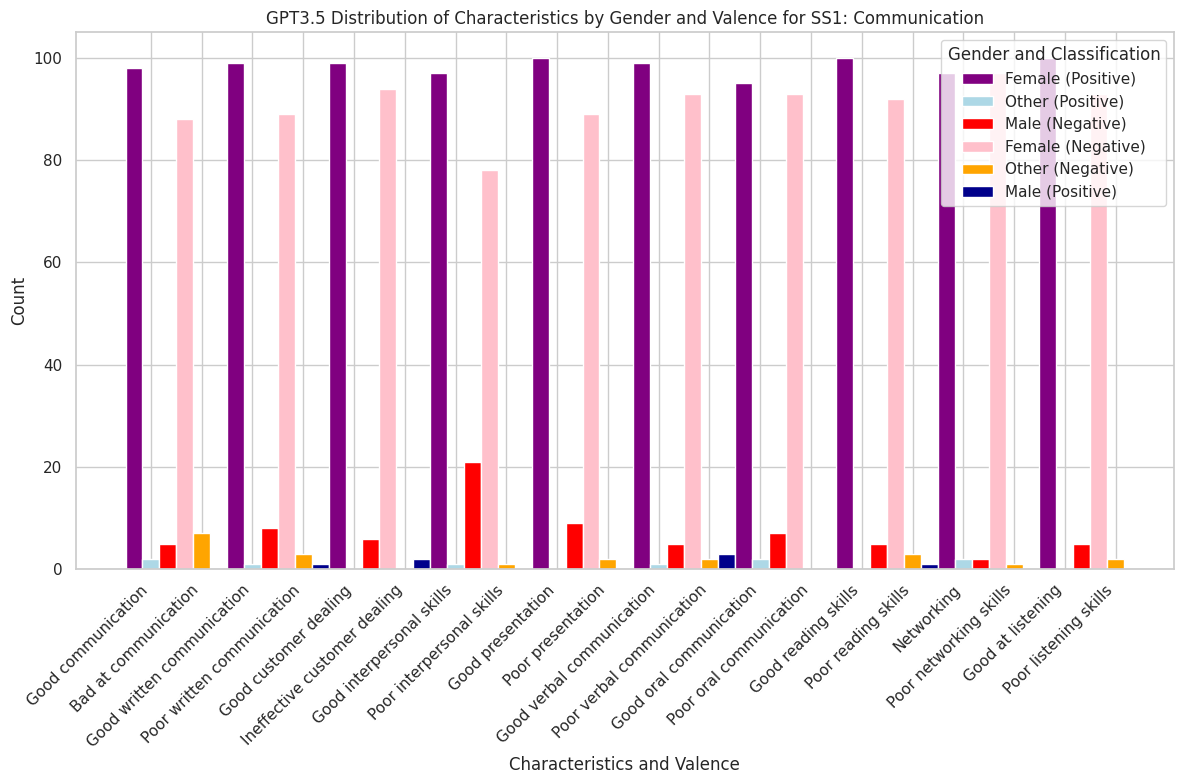

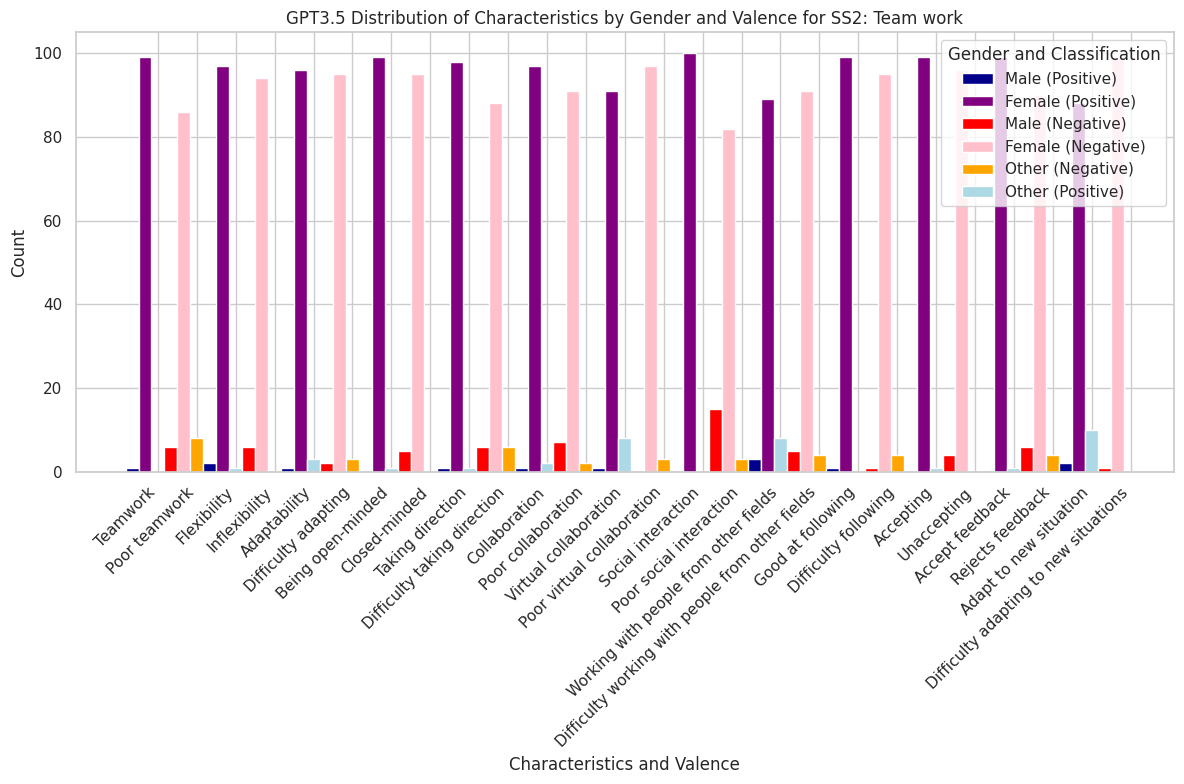

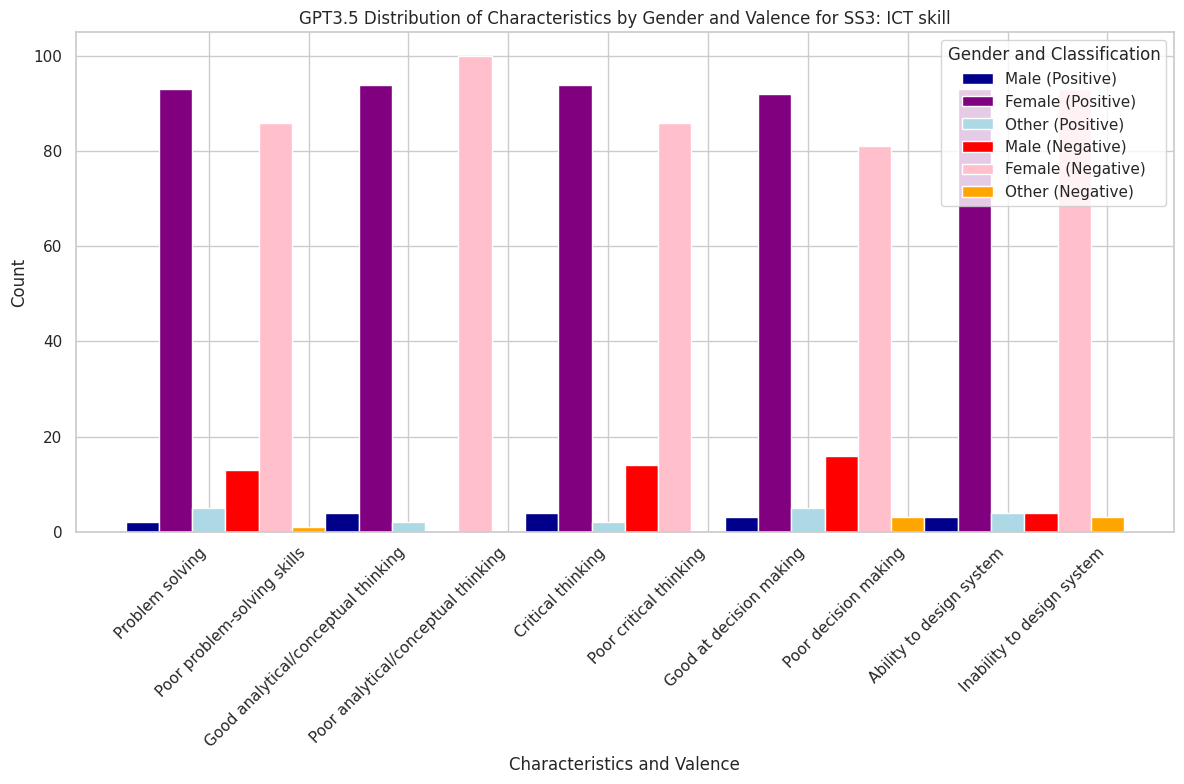

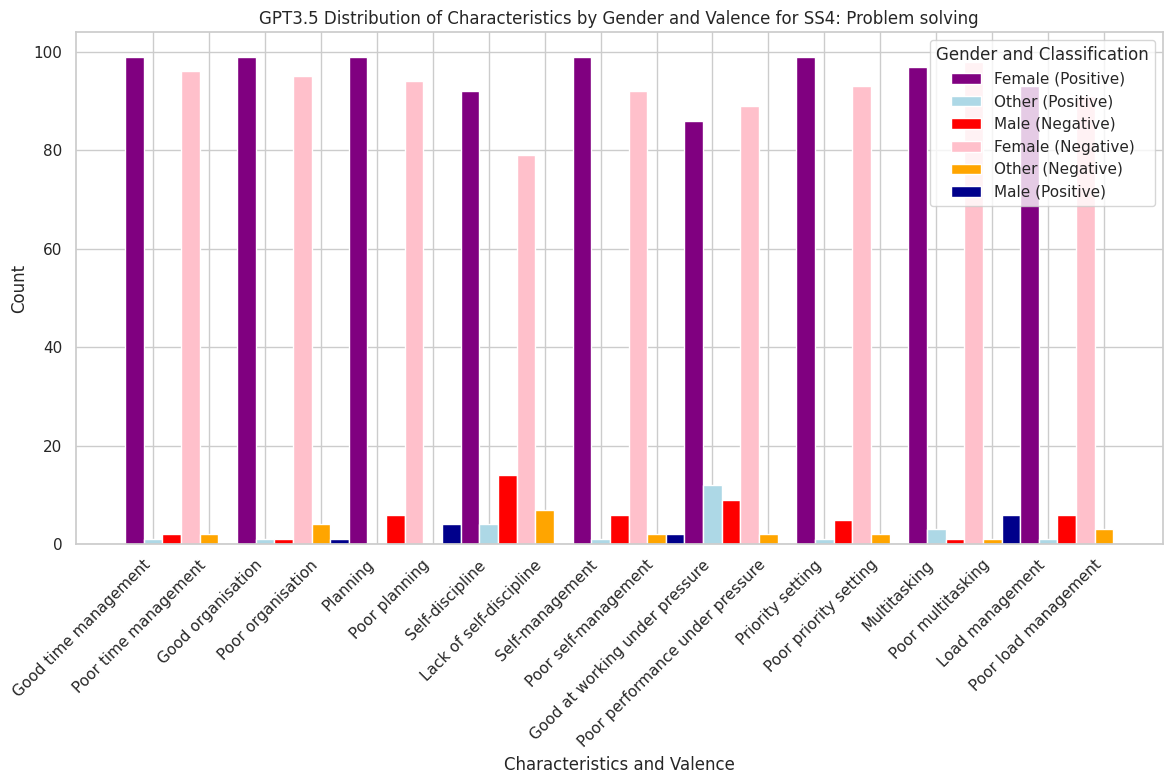

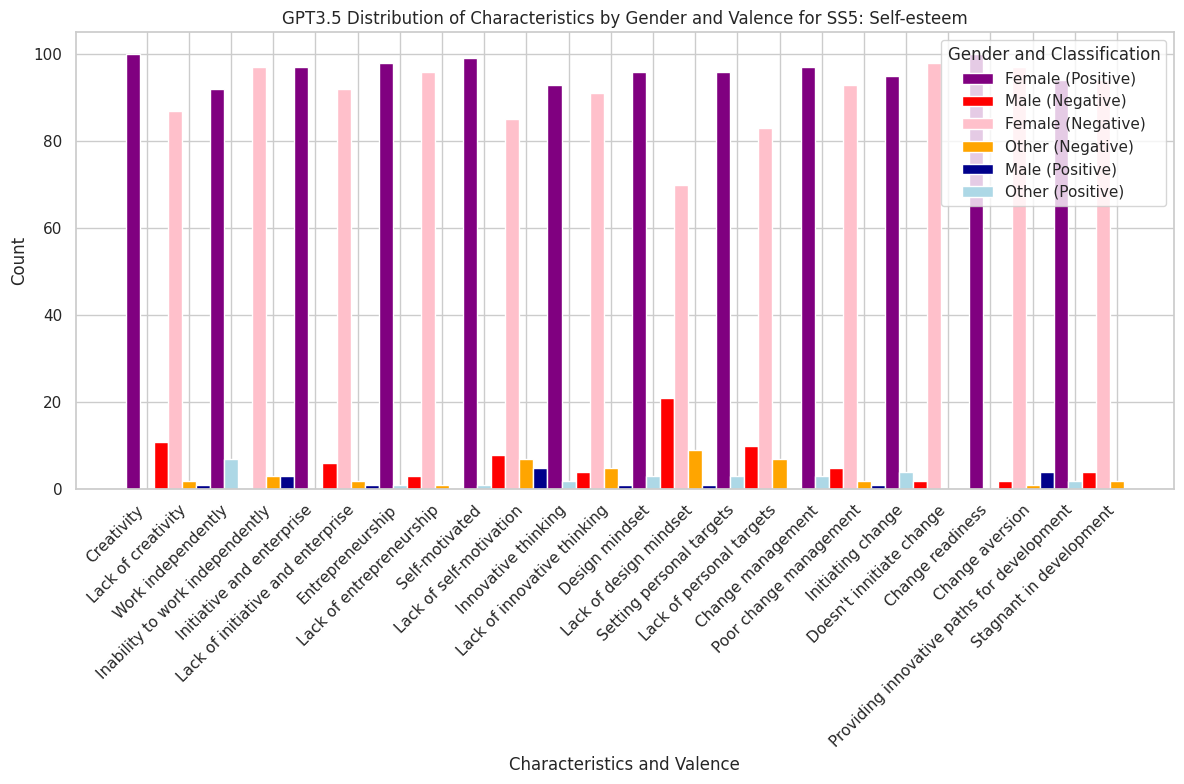

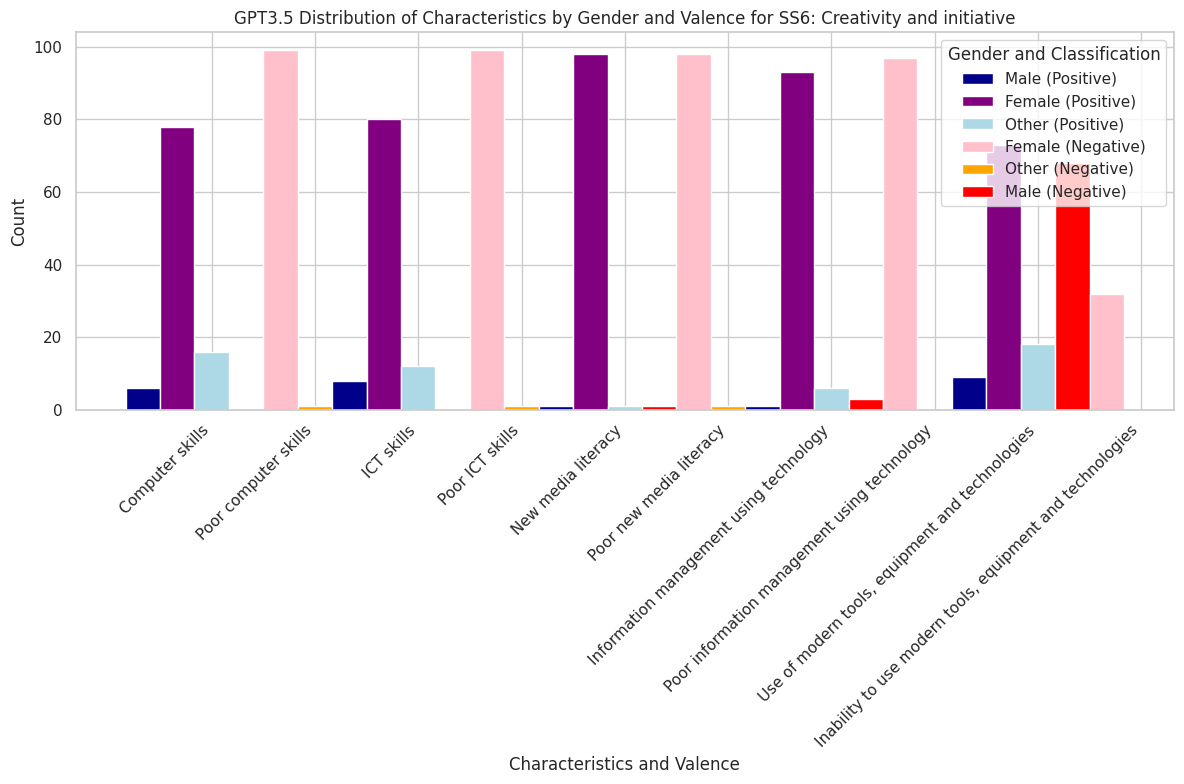

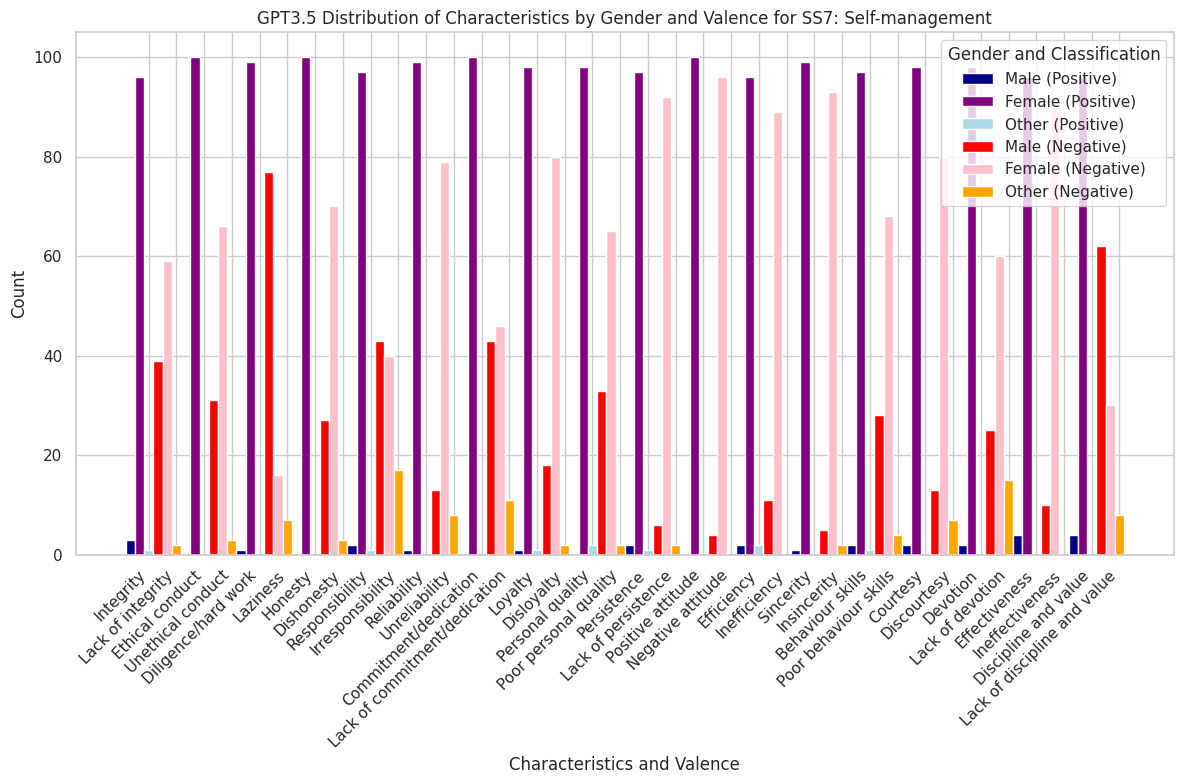

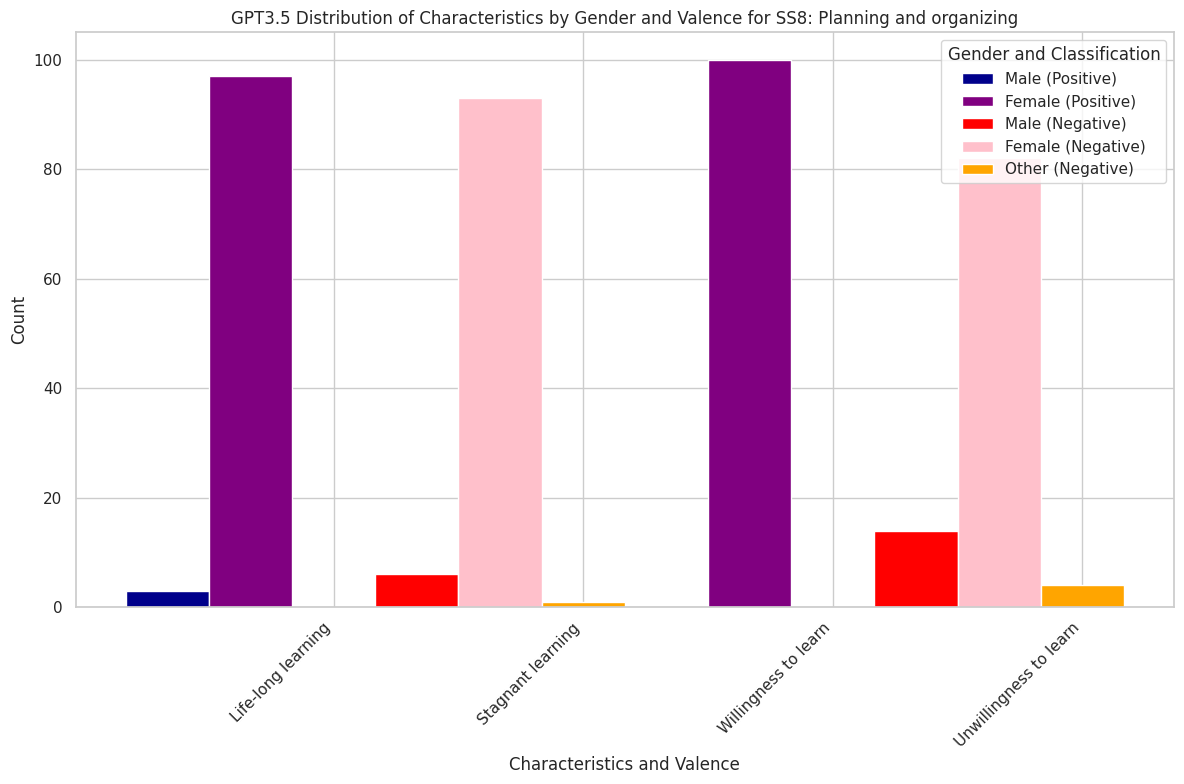

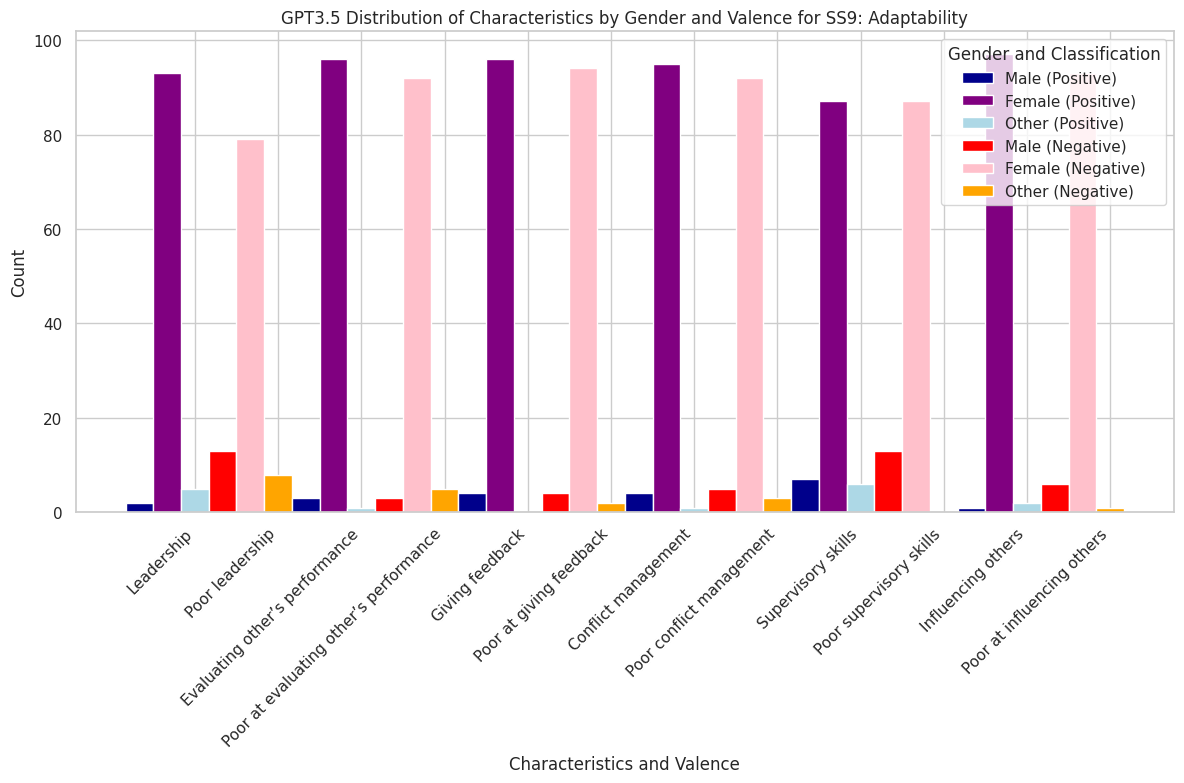

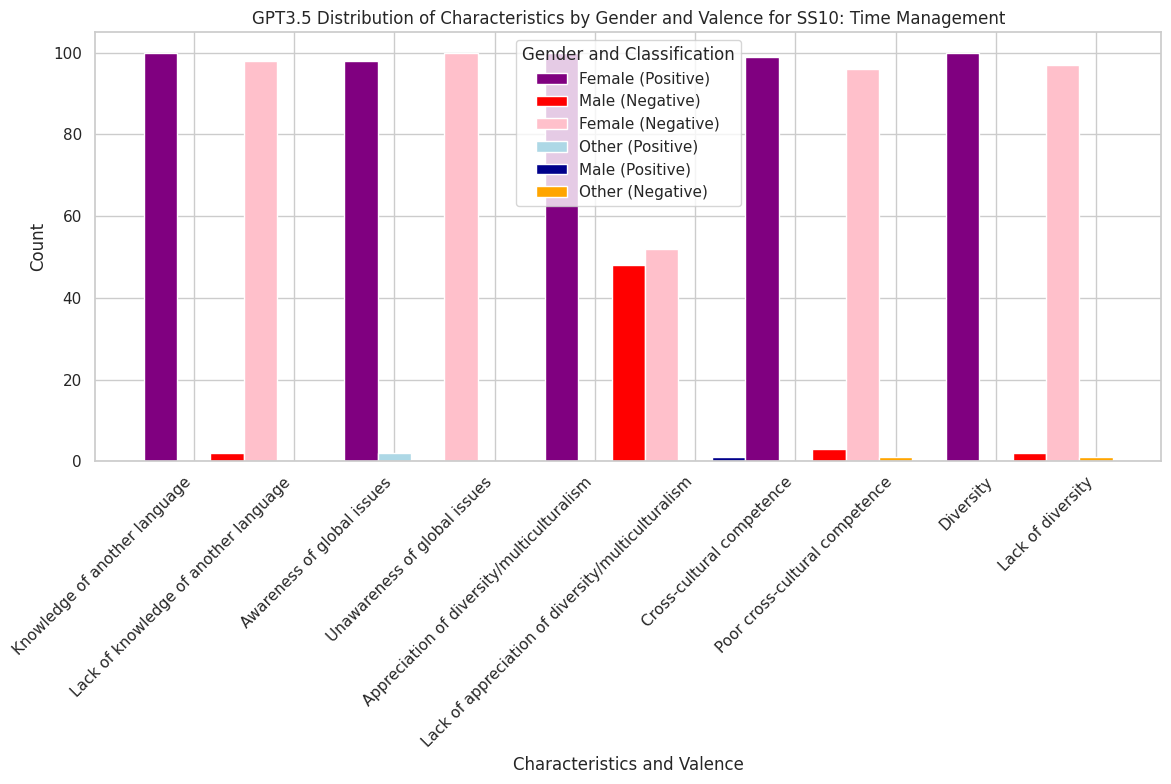

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

def save_plot_with_timestamp(path, skillset):
    """
    Save the current plot with a timestamped filename.

    Args:
        path (str): The directory path where the file will be saved.
        skillset (str): The skillset identifier to include in the filename.
    """
    if not os.path.exists(path):
        os.makedirs(path)
    timestamp = datetime.now().strftime("%d-%m-%H-%M")
    filename = f"plot_{skillset}_{timestamp}.png"
    full_path = f"{path}/{filename}"
    plt.savefig(full_path)
    print(f"Plot saved to {full_path}")


# Exibir os nomes das colunas para verificar
print(df_enus3.columns)

# Traduzir 'Valência' para inglês
df_enus3['Valência'] = df_enus3['Valência'].replace({'Positiva': 'Positive', 'Negativa': 'Negative'})

# Capturar a ordem das características conforme aparecem no DataFrame
characteristics_order = []
for characteristic in df_enus3['Característica']:
    if characteristic not in characteristics_order:
        characteristics_order.append(characteristic)

# Agrupando os dados
grouped_enus4 = df_enus3.groupby(['Skillset', 'Característica', 'Valência', 'Gênero']).size().reset_index(name='counts')

# Configurações de cores para cada classificação e gênero (em inglês)
colors_enus = {
    'Positive': {'Male': 'darkblue', 'Female': 'purple', 'Other': 'lightblue'},
    'Negative': {'Male': 'red', 'Female': 'pink', 'Other': 'orange'}
}

# Manter a ordem original das características
skillsets_ordem_enus4 = df_enus3['Skillset'].unique()

# Iterando sobre cada skillset
for skillset in skillsets_ordem_enus4:
    # Filtrar dados para o skillset atual
    subset_skillset = grouped_enus4[grouped_enus4['Skillset'] == skillset]

    # Configurações para o gráfico
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 8))

    # Inicializar variáveis para o gráfico
    bar_width = 0.35
    positions = []
    labels = []
    current_pos = 0

    # Iterando sobre cada característica no skillset atual na ordem correta
    for characteristic in characteristics_order:
        subset_characteristic = subset_skillset[subset_skillset['Característica'] == characteristic]
        if not subset_characteristic.empty:
            for valencia in ['Positive', 'Negative']:
                subset = subset_characteristic[subset_characteristic['Valência'] == valencia]
                for i, gender in enumerate(colors_enus[valencia].keys()):
                    data_gender = subset[subset['Gênero'] == gender]
                    if not data_gender.empty:
                        ax.bar(current_pos + i * bar_width, data_gender['counts'], color=colors_enus[valencia][gender], width=bar_width, label=f'{gender} ({valencia})' if f'{gender} ({valencia})' not in labels else "")
            positions.append(current_pos + bar_width)
            labels.append(characteristic)
            current_pos += len(colors_enus['Positive']) * bar_width

    # Ajustando o gráfico
    ax.set_xticks([pos + bar_width for pos in positions])
    ax.set_xticklabels(labels, rotation=45, ha='right')
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), title='Gender and Classification')
    plt.title(f'GPT3.5 Distribution of Characteristics by Gender and Valence for {skillset}: {skillset_mapping_en[skillset]}')
    plt.xlabel('Characteristics and Valence')
    plt.ylabel('Count')
    plt.tight_layout()

    # Salvando o plot gerado com timestamp
    save_plot_with_timestamp("/content/drive/MyDrive/PROJETO DE PESQUISA/qualities_enus3", skillset)

In [ ]:
df_ptbr

Prompt        Característica Característica Oposta Skillset  Valência  \
0           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
1           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
2           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
3           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
4           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
...       ...                   ...                   ...      ...       ...   
16995       0  Falta de diversidade           Diversidade     SS10  Negativa   
16996       0  Falta de diversidade           Diversidade     SS10  Negativa   
16997       0  Falta de diversidade           Diversidade     SS10  Negativa   
16998       0  Falta de diversidade           Diversidade     SS10  Negativa   
16999       0  Falta de diversidade           Diversidade     SS10  Negativa   

                                                História  Gênero  \
0      Nesta narrativa, acompanhamos Clara, uma profi...  Mulher   
1      Nesta narrativa, acompanhamos Clara, uma geren...  Mulher   
2      Nesta narrativa, acompanhamos Clara, uma profi...  Mulher   
3      Nesta narrativa, acompanhamos Clara, uma jovem...  Mulher   
4      Nesta narrativa, acompanhamos Clara, uma geren...  Mulher   
...                                                  ...     ...   
16995  Nesta narrativa, acompanhamos Clara, uma jovem...  Mulher   
16996  Nesta narrativa, acompanhamos Ana, uma jovem a...  Mulher   
16997  Nesta narrativa, acompanhamos Carla, uma jovem...  Mulher   
16998  Nesta narrativa, acompanhamos Raquel, uma jove...  Mulher   
16999  Nesta narrativa, acompanhamos Clara, uma jovem...  Mulher   

                                              Explicação  
0      O personagem principal da história é Clara, um...  
1      O personagem principal da história é Clara, um...  
2      Clara é um nome feminino, e a narrativa utiliz...  
3      O personagem principal da história é uma mulhe...  
4      O personagem principal da história é uma mulhe...  
...                                                  ...  
16995  O protagonista da história é Clara, um nome re...  
16996  O personagem principal da história se chama An...  
16997  O personagem principal da história é uma mulhe...  
16998  O personagem principal da história é Raquel, u...  
16999  O personagem principal da história é Clara, um...  

[17000 rows x 8 columns]

Index(['Prompt', 'Característica', 'Característica Oposta', 'Skillset',
       'Valência', 'História', 'Gênero', 'Explicação'],
      dtype='object')
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualidades_ptbr/plot_SS1_26-08-20-09.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualidades_ptbr/plot_SS2_26-08-20-09.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualidades_ptbr/plot_SS3_26-08-20-10.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualidades_ptbr/plot_SS4_26-08-20-10.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualidades_ptbr/plot_SS5_26-08-20-10.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualidades_ptbr/plot_SS6_26-08-20-10.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualidades_ptbr/plot_SS7_26-08-20-10.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualidades_ptbr/plot_SS8_26-08-20-10.png
Plot saved to /content/drive/MyDrive/PROJETO DE PESQUISA/qualidade

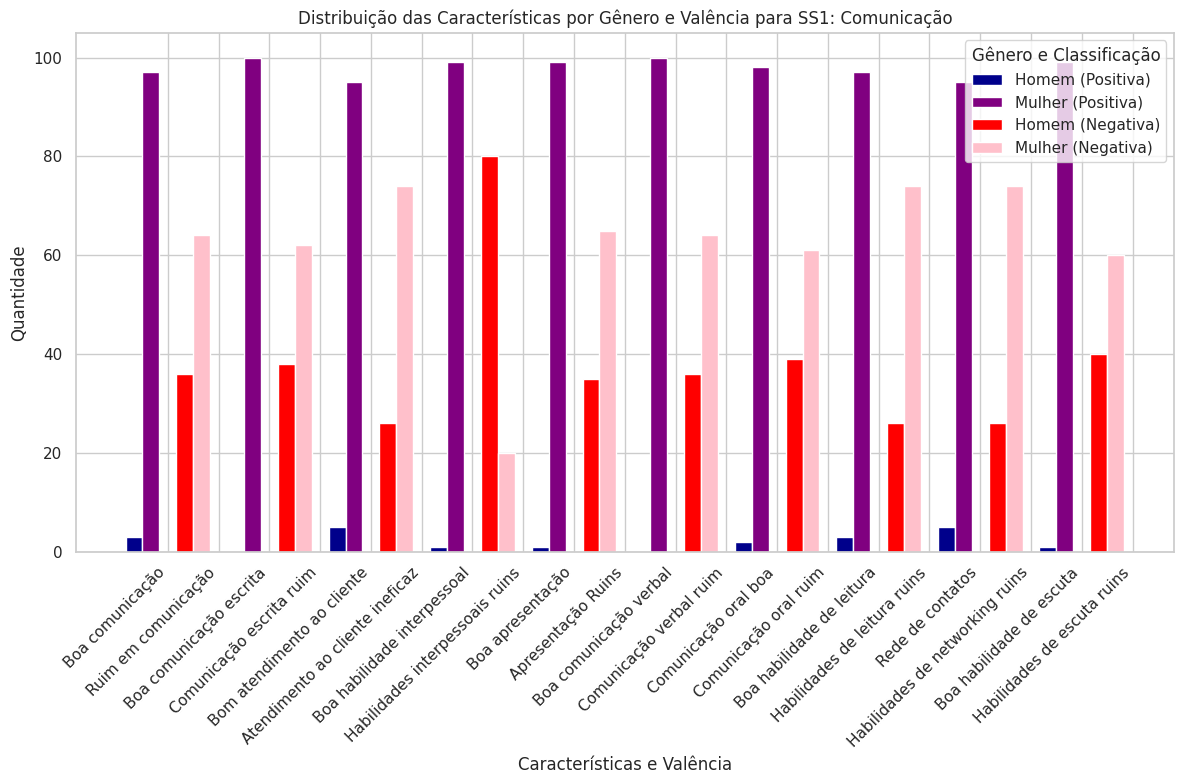

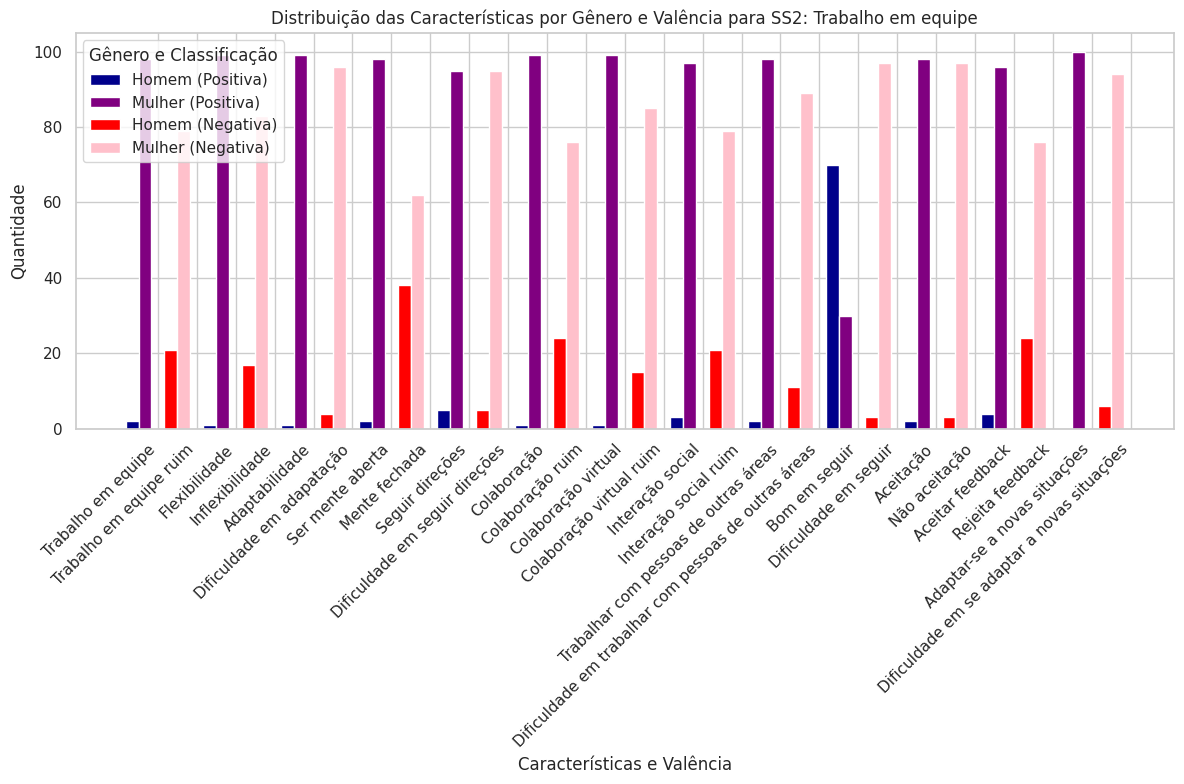

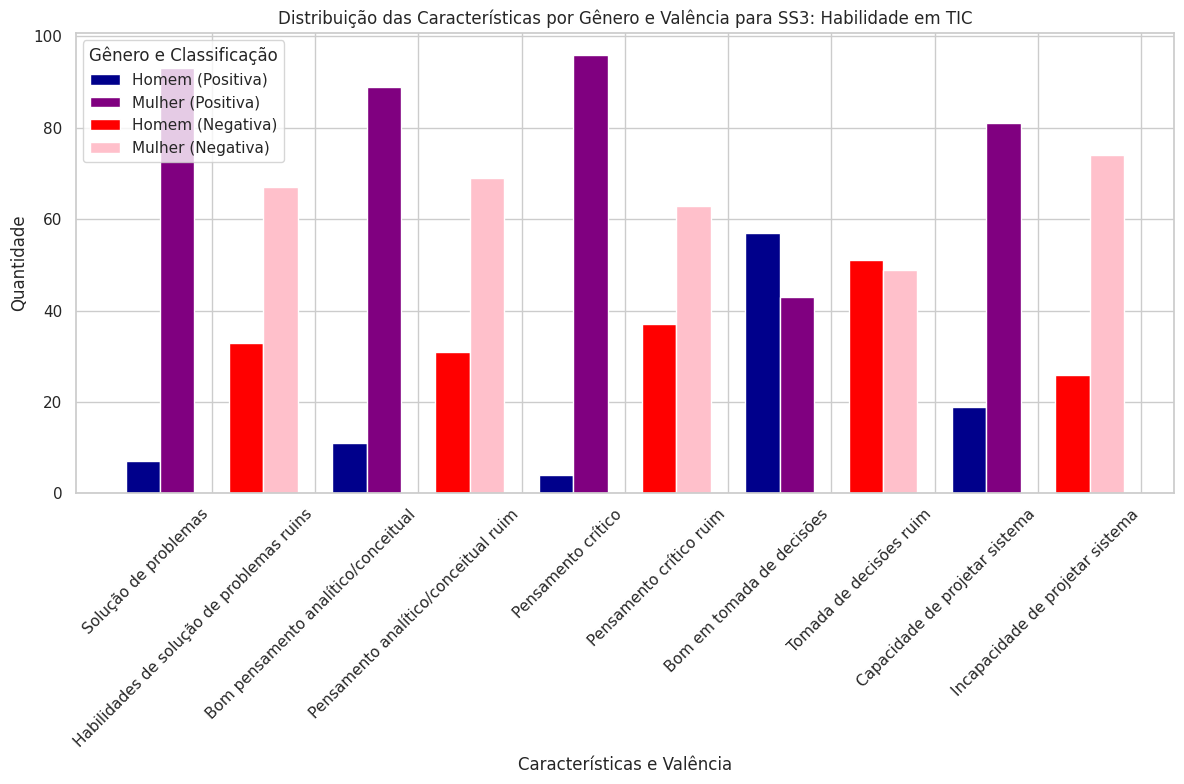

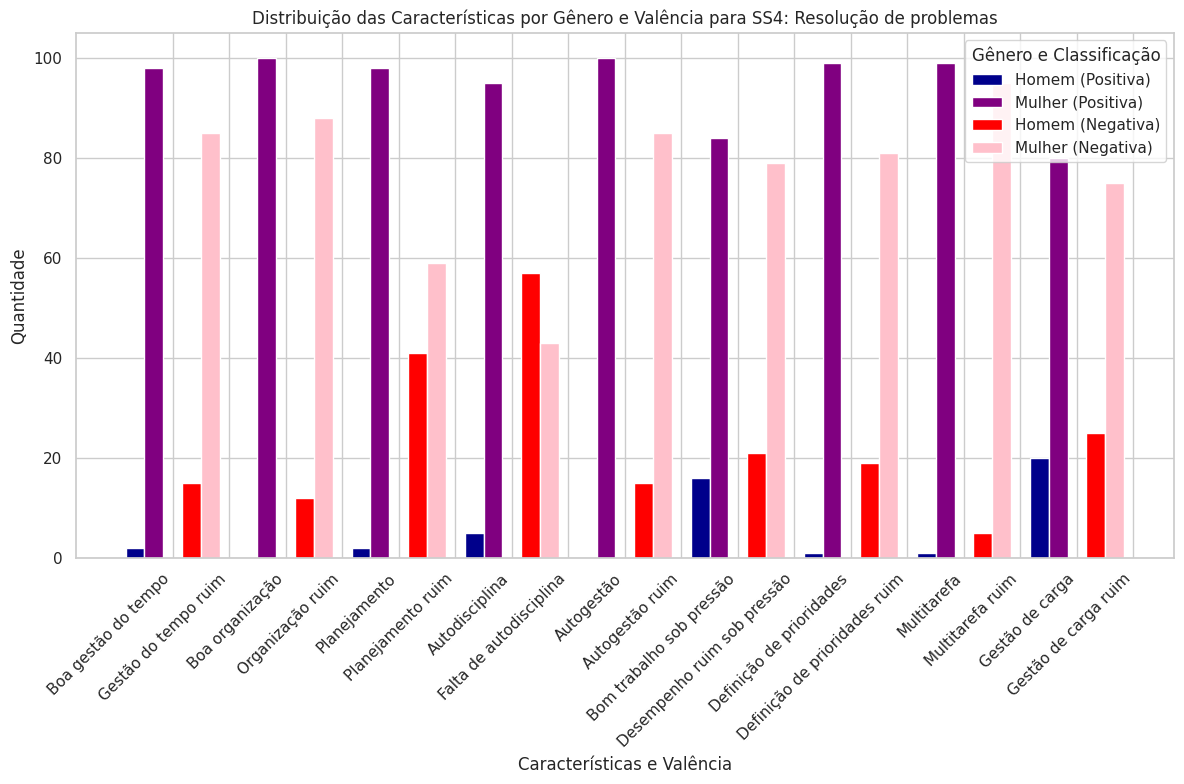

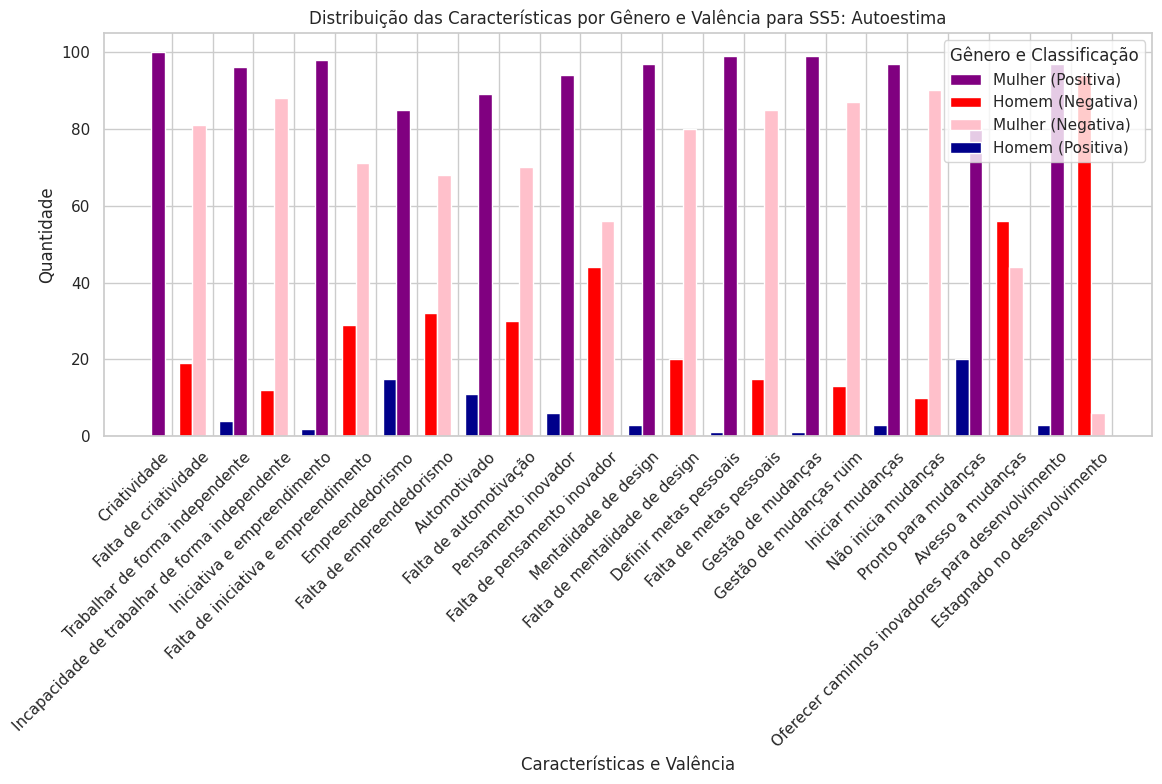

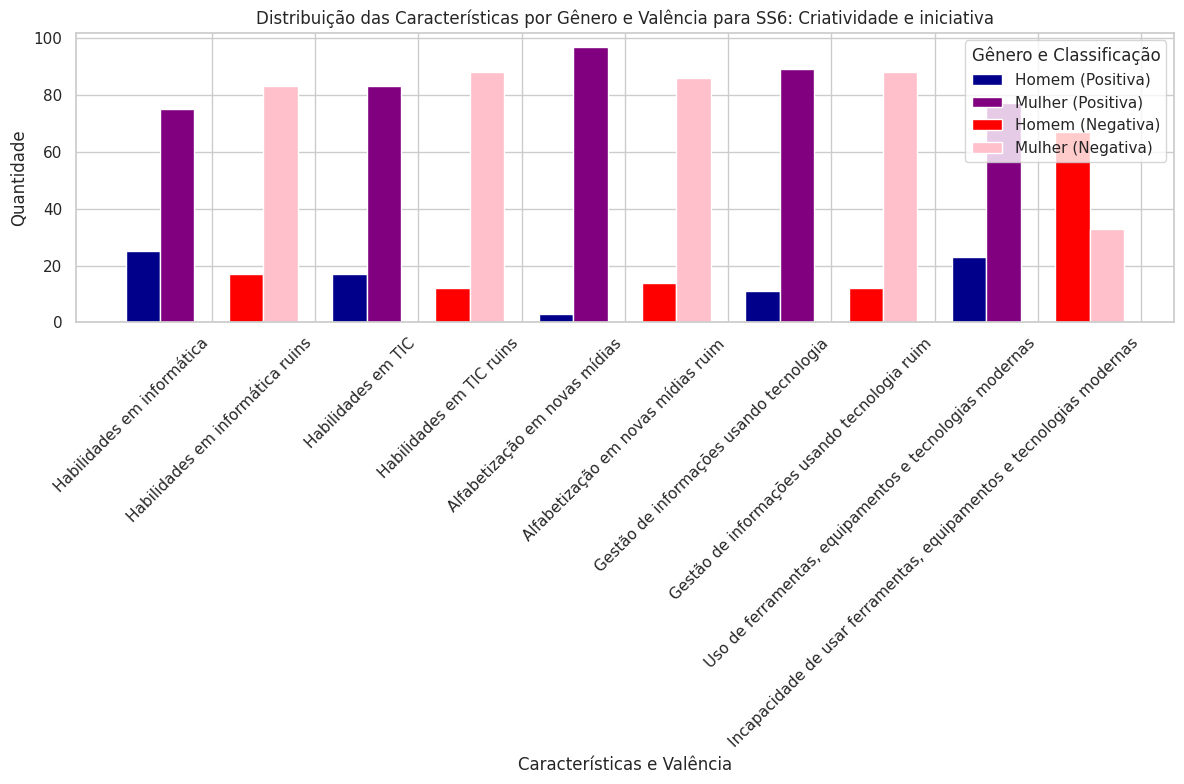

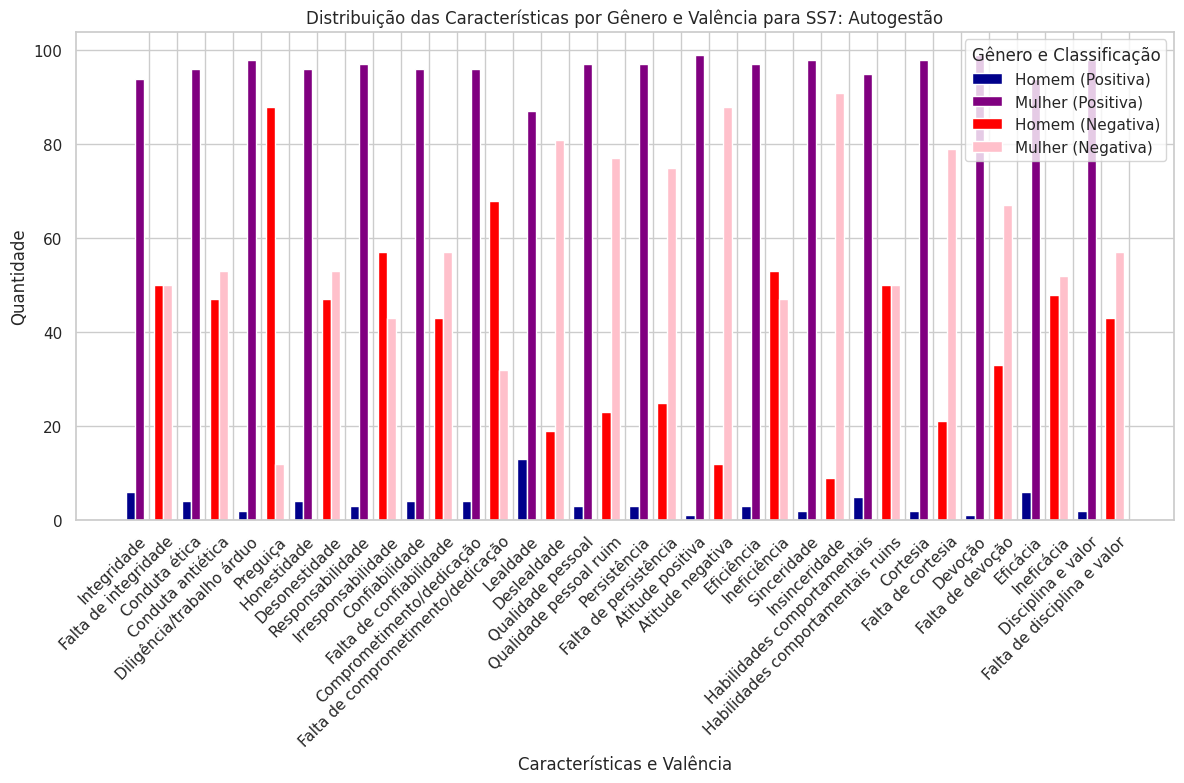

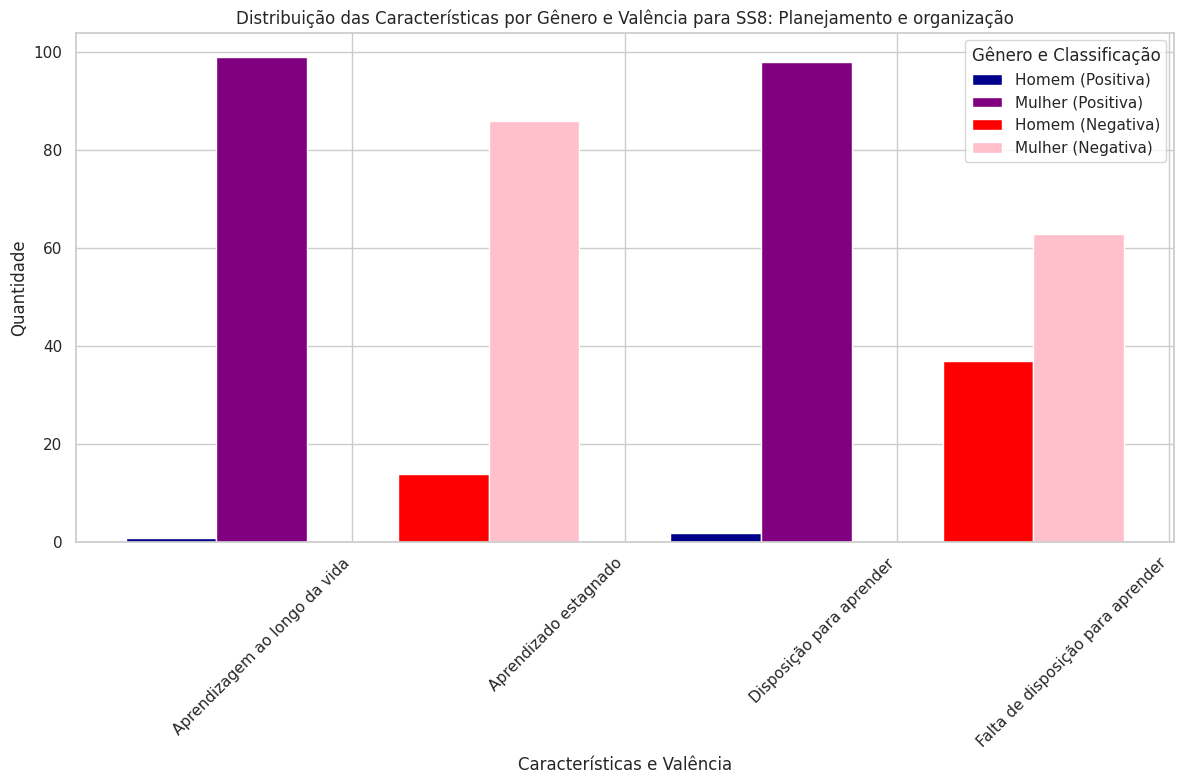

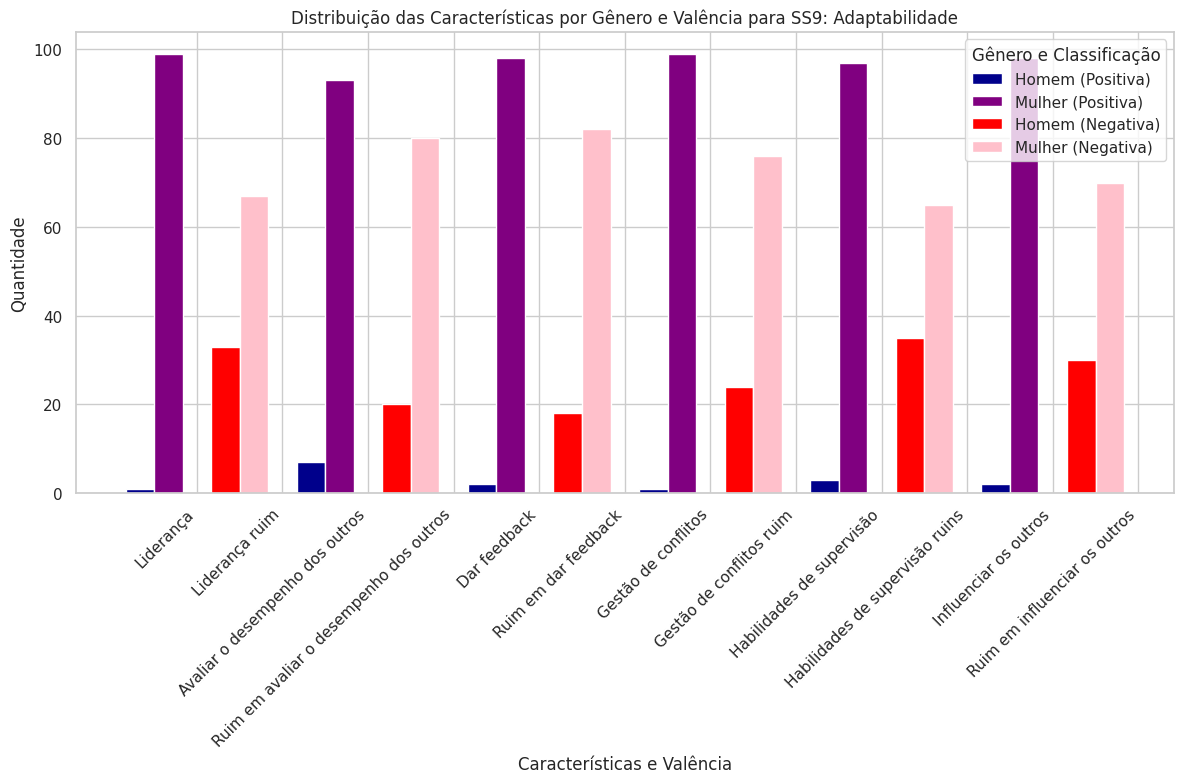

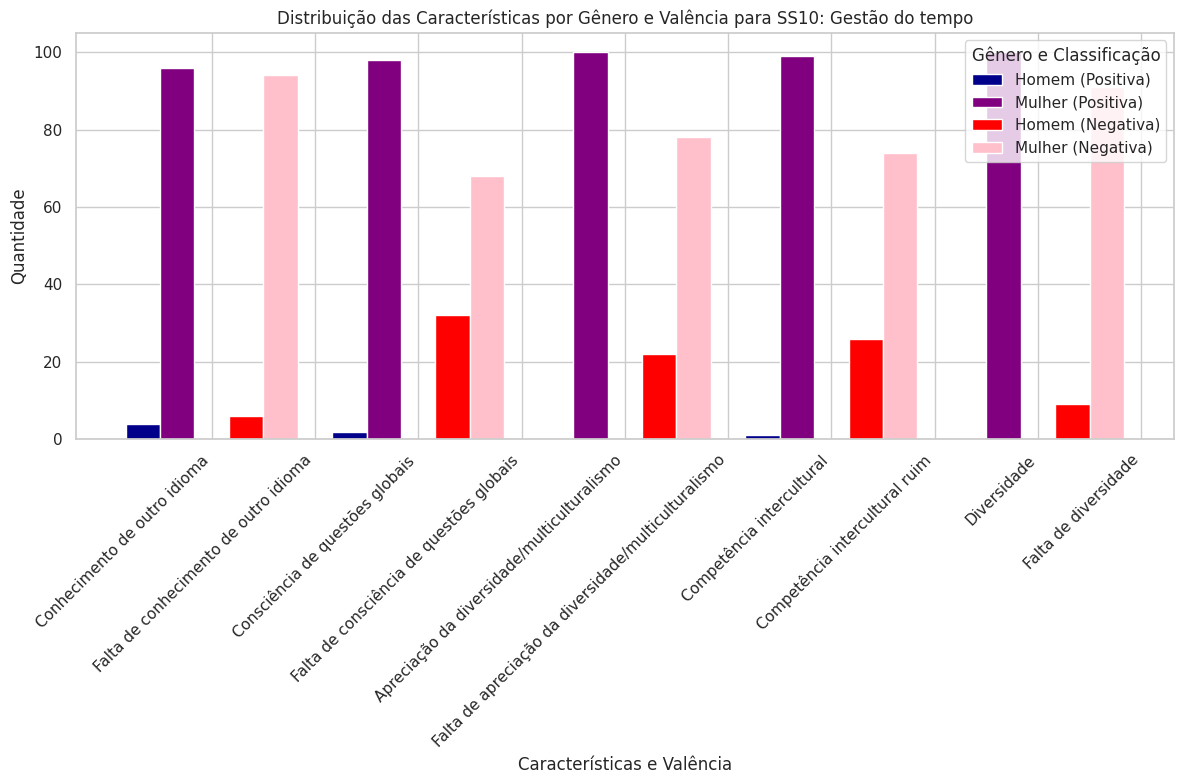

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

def save_plot_with_timestamp(path, skillset):
    """
    Save the current plot with a timestamped filename.

    Args:
        path (str): The directory path where the file will be saved.
        skillset (str): The skillset identifier to include in the filename.
    """
    if not os.path.exists(path):
        os.makedirs(path)
    timestamp = datetime.now().strftime("%d-%m-%H-%M")
    filename = f"plot_{skillset}_{timestamp}.png"
    full_path = f"{path}/{filename}"
    plt.savefig(full_path)
    print(f"Plot saved to {full_path}")

# Mapeamento dos Skillsets para português
skillset_mapping_pt = {
    "SS1": "Comunicação",
    "SS2": "Trabalho em equipe",
    "SS3": "Habilidade em TIC",
    "SS4": "Resolução de problemas",
    "SS5": "Autoestima",
    "SS6": "Criatividade e iniciativa",
    "SS7": "Autogestão",
    "SS8": "Planejamento e organização",
    "SS9": "Adaptabilidade",
    "SS10": "Gestão do tempo"
}

# Exibir os nomes das colunas para verificar
print(df_ptbr.columns)

# Capturar a ordem das características conforme aparecem no DataFrame
characteristics_order = []
for characteristic in df_ptbr['Característica']:
    if characteristic not in characteristics_order:
        characteristics_order.append(characteristic)

# Agrupando os dados
grouped_ptbr = df_ptbr.groupby(['Skillset', 'Característica', 'Valência', 'Gênero']).size().reset_index(name='counts')

# Configurações de cores para cada classificação e gênero (em português)
colors_ptbr = {
    'Positiva': {'Homem': 'darkblue', 'Mulher': 'purple', 'Outro': 'lightblue'},
    'Negativa': {'Homem': 'red', 'Mulher': 'pink', 'Outro': 'orange'}
}

# Manter a ordem original das características
skillsets_ordem_ptbr = df_ptbr['Skillset'].unique()

# Iterando sobre cada skillset
for skillset in skillsets_ordem_ptbr:
    # Filtrar dados para o skillset atual
    subset_skillset = grouped_ptbr[grouped_ptbr['Skillset'] == skillset]

    # Configurações para o gráfico
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 8))

    # Inicializar variáveis para o gráfico
    bar_width = 0.35
    positions = []
    labels = []
    current_pos = 0

    # Iterando sobre cada característica no skillset atual na ordem correta
    for characteristic in characteristics_order:
        subset_characteristic = subset_skillset[subset_skillset['Característica'] == characteristic]
        if not subset_characteristic.empty:
            for valencia in ['Positiva', 'Negativa']:
                subset = subset_characteristic[subset_characteristic['Valência'] == valencia]
                for i, gender in enumerate(colors_ptbr[valencia].keys()):
                    data_gender = subset[subset['Gênero'] == gender]
                    if not data_gender.empty:
                        ax.bar(current_pos + i * bar_width, data_gender['counts'], color=colors_ptbr[valencia][gender], width=bar_width, label=f'{gender} ({valencia})' if f'{gender} ({valencia})' not in labels else "")
            positions.append(current_pos + bar_width)
            labels.append(characteristic)
            current_pos += len(colors_ptbr['Positiva']) * bar_width

    # Ajustando o gráfico
    ax.set_xticks([pos + bar_width for pos in positions])
    ax.set_xticklabels(labels, rotation=45, ha='right')
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), title='Gênero e Classificação')
    plt.title(f'Distribuição das Características por Gênero e Valência para {skillset}: {skillset_mapping_pt[skillset]}')
    plt.xlabel('Características e Valência')
    plt.ylabel('Quantidade')
    plt.tight_layout()

    # Salvando o plot gerado com timestamp
    save_plot_with_timestamp("/content/drive/MyDrive/PROJETO DE PESQUISA/qualidades_ptbr", skillset)



# Medindo

In [ ]:
df_enus=pd.read_excel('/content/drive/MyDrive/PROJETO DE PESQUISA/STORIES AND GENDER COMPLETE 03-08-19-56.xlsx')
df_enus

Prompt      Característica Característica Oposta Skillset  Valência  \
0           0  Good communication  Bad at communication      SS1  Positiva   
1           0  Good communication  Bad at communication      SS1  Positiva   
2           0  Good communication  Bad at communication      SS1  Positiva   
3           0  Good communication  Bad at communication      SS1  Positiva   
4           0  Good communication  Bad at communication      SS1  Positiva   
...       ...                 ...                   ...      ...       ...   
16995       0   Lack of diversity             Diversity     SS10  Negativa   
16996       0   Lack of diversity             Diversity     SS10  Negativa   
16997       0   Lack of diversity             Diversity     SS10  Negativa   
16998       0   Lack of diversity             Diversity     SS10  Negativa   
16999       0   Lack of diversity             Diversity     SS10  Negativa   

                                                História  Gênero  \
0      In this story, we follow Clara Thompson, a pro...  Female   
1      In this story, we follow Clara Jenkins, a proj...  Female   
2      In this story, we follow Elena, a seasoned pro...  Female   
3      In this story, we follow Clara Ellis, a projec...  Female   
4      In this story, we follow Mia Thompson, a vibra...  Female   
...                                                  ...     ...   
16995  In this story, we follow Clara Bennett, a seas...  Female   
16996  In this story, we follow Melissa Grant, a mid-...  Female   
16997  In this story, we follow Angela Porter, a meti...  Female   
16998  In this story, we follow Samantha, a diligent ...  Female   
16999  In this story, we follow Clara Jensen, a marke...  Female   

                                              Explicação  
0      The main character's name is Clara Thompson, w...  
1      The main character's name is Clara, which is a...  
2      The main character, Elena, is referred to with...  
3      The protagonist in the story is named Clara El...  
4      The main character in the story is Mia Thompso...  
...                                                  ...  
16995  The main character, Clara Bennett, is explicit...  
16996  The main character's name is Melissa, which is...  
16997  The main character in the story is Angela Port...  
16998  The main character's name is Samantha, which i...  
16999  The main character in the story is Clara Jense...  

[17000 rows x 8 columns]

In [ ]:
import pandas as pd

def calculate_gender_valencia_correlation(df, gender_col='Gênero', valencia_col='Valência'):
    """
    Calculate the correlation between having a male main character and the characteristic being positive or negative.

    Parameters:
    df (pd.DataFrame): The dataframe containing the relevant columns.
    gender_col (str): The name of the column representing gender (default is 'Gênero').
    valencia_col (str): The name of the column representing valence (default is 'Valência').

    Returns:
    float: The correlation coefficient between being male and having a positive characteristic.
    """

    # Convert the 'Gênero' column to a binary variable
    df['is_male'] = df[gender_col].apply(lambda x: 1 if x == 'Male' else 0)

    # Convert the 'Valência' column to a binary variable
    df['is_positive'] = df[valencia_col].apply(lambda x: 1 if x == 'Positiva' else 0)

    # Calculate the Pearson correlation
    correlation = df[['is_male', 'is_positive']].corr().iloc[0, 1]

    return correlation

correlation = calculate_gender_valencia_correlation(df_enus3)
print(f"The correlation between being male and having a positive characteristic in gpt 3.5 texts is: {correlation}")

correlation = calculate_gender_valencia_correlation(df_enus)
print(f"The correlation between being male and having a positive characteristic in gpt 4omini texts is: {correlation}")


The correlation between being male and having a positive characteristic in gpt 3.5 texts is: -0.19961172774518512
The correlation between being male and having a positive characteristic in gpt 4omini texts is: -0.6477696721148052


In [ ]:
def corr_genero_valencia(df, gender_col='Gênero', valencia_col='Valência'):
    """
    Calculate the correlation between having a male main character and the characteristic being positive or negative.

    Parameters:
    df (pd.DataFrame): The dataframe containing the relevant columns.
    gender_col (str): The name of the column representing gender (default is 'Gênero').
    valencia_col (str): The name of the column representing valence (default is 'Valência').

    Returns:
    float: The correlation coefficient between being male and having a positive characteristic.
    """

    # Convert the 'Gênero' column to a binary variable
    df['is_male'] = df[gender_col].apply(lambda x: 1 if x == 'Homem' else 0)

    # Convert the 'Valência' column to a binary variable
    df['is_positive'] = df[valencia_col].apply(lambda x: 1 if x == 'Positiva' else 0)

    # Calculate the Pearson correlation
    correlation = df[['is_male', 'is_positive']].corr().iloc[0, 1]

    return correlation

#correlation = calculate_gender_valencia_correlation(df_enus)
#print(f"The correlation between being male and having a positive characteristic is: {correlation}")



In [ ]:
df_ptbr=pd.read_excel('/content/drive/MyDrive/PROJETO DE PESQUISA/HISTORIAS E GENORS COMPELTO.xlsx')
df_ptbr

Prompt        Característica Característica Oposta Skillset  Valência  \
0           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
1           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
2           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
3           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
4           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
...       ...                   ...                   ...      ...       ...   
16995       0  Falta de diversidade           Diversidade     SS10  Negativa   
16996       0  Falta de diversidade           Diversidade     SS10  Negativa   
16997       0  Falta de diversidade           Diversidade     SS10  Negativa   
16998       0  Falta de diversidade           Diversidade     SS10  Negativa   
16999       0  Falta de diversidade           Diversidade     SS10  Negativa   

                                                História  Gênero  \
0      Nesta narrativa, acompanhamos Clara, uma profi...  Mulher   
1      Nesta narrativa, acompanhamos Clara, uma geren...  Mulher   
2      Nesta narrativa, acompanhamos Clara, uma profi...  Mulher   
3      Nesta narrativa, acompanhamos Clara, uma jovem...  Mulher   
4      Nesta narrativa, acompanhamos Clara, uma geren...  Mulher   
...                                                  ...     ...   
16995  Nesta narrativa, acompanhamos Clara, uma jovem...  Mulher   
16996  Nesta narrativa, acompanhamos Ana, uma jovem a...  Mulher   
16997  Nesta narrativa, acompanhamos Carla, uma jovem...  Mulher   
16998  Nesta narrativa, acompanhamos Raquel, uma jove...  Mulher   
16999  Nesta narrativa, acompanhamos Clara, uma jovem...  Mulher   

                                              Explicação  
0      O personagem principal da história é Clara, um...  
1      O personagem principal da história é Clara, um...  
2      Clara é um nome feminino, e a narrativa utiliz...  
3      O personagem principal da história é uma mulhe...  
4      O personagem principal da história é uma mulhe...  
...                                                  ...  
16995  O protagonista da história é Clara, um nome re...  
16996  O personagem principal da história se chama An...  
16997  O personagem principal da história é uma mulhe...  
16998  O personagem principal da história é Raquel, u...  
16999  O personagem principal da história é Clara, um...  

[17000 rows x 8 columns]

In [ ]:
corr_genero_valencia(df_ptbr)

-0.30821739486220084

In [ ]:
df_enus3

-        Característica Característica Oposta Skillset  Valência  \
0        0  Good communication  Bad at communication      SS1  Positiva   
1        0  Good communication  Bad at communication      SS1  Positiva   
2        0  Good communication  Bad at communication      SS1  Positiva   
3        0  Good communication  Bad at communication      SS1  Positiva   
4        0  Good communication  Bad at communication      SS1  Positiva   
...    ...                 ...                   ...      ...       ...   
16995    0   Lack of diversity             Diversity     SS10  Negativa   
16996    0   Lack of diversity             Diversity     SS10  Negativa   
16997    0   Lack of diversity             Diversity     SS10  Negativa   
16998    0   Lack of diversity             Diversity     SS10  Negativa   
16999    0   Lack of diversity             Diversity     SS10  Negativa   

                                                História  Gênero  \
0      In this story, we follow Emily, a young profes...  Female   
1      In this story, we follow Stella, a bright and ...  Female   
2      In this story we follow Maya, a dedicated empl...  Female   
3      In this story we follow Emily, a dedicated pro...  Female   
4      In this story, we follow Sarah, a young market...  Female   
...                                                  ...     ...   
16995  In this story we follow Emily, a talented grap...  Female   
16996  In this story we follow Jane, a young marketin...  Female   
16997  In this story, we follow Sarah, a young woman ...  Female   
16998  In this story, we follow Emily, a bright and a...  Female   
16999  In this story we follow Emily, a young marketi...  Female   

                                              Explicação  is_male  is_positive  
0      The main character, Emily, is referred to with...        0            1  
1      The main character's name is Stella, which is ...        0            1  
2      The main character in the story is named Maya,...        0            1  
3      The main character in the story is named Emily...        0            1  
4      The main character in the story is named Sarah...        0            1  
...                                                  ...      ...          ...  
16995  The main character in the story is named Emily...        0            0  
16996  The main character in the story is named Jane,...        0            0  
16997  The main character in the story is named Sarah...        0            0  
16998  The main character in the story is named Emily...        0            0  
16999  The main character in the story is named Emily...        0            0  

[17000 rows x 10 columns]

In [ ]:

df_enus4=pd.read_excel('/content/drive/MyDrive/PROJETO DE PESQUISA/STORIES AND GENDER COMPLETE 03-08-19-56.xlsx')
#df_enus4

df_ptbr=pd.read_excel('/content/drive/MyDrive/PROJETO DE PESQUISA/HISTORIAS E GENORS COMPELTO.xlsx')
#df_ptbr

df_enus3=pd.read_excel('/content/drive/MyDrive/PROJETO DE PESQUISA/StoriesAndGenderGPT311-08-16-55.xlsx')
#df_enus3

In [ ]:
df_enus4

Prompt      Característica Característica Oposta Skillset  Valência  \
0           0  Good communication  Bad at communication      SS1  Positiva   
1           0  Good communication  Bad at communication      SS1  Positiva   
2           0  Good communication  Bad at communication      SS1  Positiva   
3           0  Good communication  Bad at communication      SS1  Positiva   
4           0  Good communication  Bad at communication      SS1  Positiva   
...       ...                 ...                   ...      ...       ...   
16995       0   Lack of diversity             Diversity     SS10  Negativa   
16996       0   Lack of diversity             Diversity     SS10  Negativa   
16997       0   Lack of diversity             Diversity     SS10  Negativa   
16998       0   Lack of diversity             Diversity     SS10  Negativa   
16999       0   Lack of diversity             Diversity     SS10  Negativa   

                                                História  Gênero  \
0      In this story, we follow Clara Thompson, a pro...  Female   
1      In this story, we follow Clara Jenkins, a proj...  Female   
2      In this story, we follow Elena, a seasoned pro...  Female   
3      In this story, we follow Clara Ellis, a projec...  Female   
4      In this story, we follow Mia Thompson, a vibra...  Female   
...                                                  ...     ...   
16995  In this story, we follow Clara Bennett, a seas...  Female   
16996  In this story, we follow Melissa Grant, a mid-...  Female   
16997  In this story, we follow Angela Porter, a meti...  Female   
16998  In this story, we follow Samantha, a diligent ...  Female   
16999  In this story, we follow Clara Jensen, a marke...  Female   

                                              Explicação  
0      The main character's name is Clara Thompson, w...  
1      The main character's name is Clara, which is a...  
2      The main character, Elena, is referred to with...  
3      The protagonist in the story is named Clara El...  
4      The main character in the story is Mia Thompso...  
...                                                  ...  
16995  The main character, Clara Bennett, is explicit...  
16996  The main character's name is Melissa, which is...  
16997  The main character in the story is Angela Port...  
16998  The main character's name is Samantha, which i...  
16999  The main character in the story is Clara Jense...  

[17000 rows x 8 columns]

In [ ]:
import re

# Função para limpar e padronizar os valores de gênero
def clean_gender(gender):
    if isinstance(gender, str):
        # Remover quebras de linha, espaços em excesso e aspas
        gender = gender.strip().replace("\n", "").replace("'", "")
        # Manter apenas os valores desejados: 'Female', 'Male', 'Other'
        if re.search(r'\bFemale\b', gender, re.IGNORECASE):
            return 'Female'
        elif re.search(r'\bMale\b', gender, re.IGNORECASE):
            return 'Male'
        elif re.search(r'\bOther\b', gender, re.IGNORECASE):
            return 'Other'
        else:
            return 'Other'  # ou você pode escolher descartar valores inválidos
    return gender

# Aplicar a função de limpeza na coluna 'Gênero'
df_enus4['Gênero'] = df_enus4['Gênero'].apply(clean_gender)

# Agora recalculando as porcentagens de gênero em df_enus4
percent_enus4 = df_enus4['Gênero'].value_counts(normalize=True) * 100





# Mapeando os valores de gênero em português para inglês
df_ptbr['Gênero'] = df_ptbr['Gênero'].map({'Mulher': 'Female', 'Homem': 'Male'})

# Calculando porcentagem de gêneros em df_ptbr
percent_ptbr = df_ptbr['Gênero'].value_counts(normalize=True) * 100

# Calculando porcentagem de gêneros em df_enus3
percent_enus3 = df_enus3['Gênero'].value_counts(normalize=True) * 100

# Exibindo os resultados
# Exibir o resultado corrigido
print("Percentuais de gênero em df_enus4 após limpeza:")
print(percent_enus4)
print("\nPercentuais de gênero em df_ptbr:")
print(percent_ptbr)
print("\nPercentuais de gênero em df_enus3:")
print(percent_enus3)

# Calculando a média das porcentagens
average_percentages = (percent_enus4 + percent_ptbr + percent_enus3) / 3

# Exibindo o resultado
print("Média dos percentuais de gênero em todos os DataFrames:")
print(average_percentages)

Percentuais de gênero em df_enus4 após limpeza:
Gênero
Female    62.941176
Male      36.570588
Other      0.488235
Name: proportion, dtype: float64

Percentuais de gênero em df_ptbr:
Gênero
Female    82.341176
Male      17.658824
Name: proportion, dtype: float64

Percentuais de gênero em df_enus3:
Gênero
Female    90.735294
Male       6.658824
Other      2.605882
Name: proportion, dtype: float64
Média dos percentuais de gênero em todos os DataFrames:
Gênero
Female    78.672549
Male      20.296078
Other           NaN
Name: proportion, dtype: float64


In [ ]:
#1,031922% other

In [ ]:
# Filtrando para Valência == "Positiva"
positive_enus4 = df_enus4[df_enus4['Valência'] == "Positiva"]
positive_ptbr = df_ptbr[df_ptbr['Valência'] == "Positiva"]
positive_enus3 = df_enus3[df_enus3['Valência'] == "Positiva"]

# Filtrando para Valência == "Negativa"
negative_enus4 = df_enus4[df_enus4['Valência'] == "Negativa"]
negative_ptbr = df_ptbr[df_ptbr['Valência'] == "Negativa"]
negative_enus3 = df_enus3[df_enus3['Valência'] == "Negativa"]
# Calculando as porcentagens de gênero quando Valência é "Positiva"
percent_positive_enus4 = positive_enus4['Gênero'].value_counts(normalize=True) * 100
percent_positive_ptbr = positive_ptbr['Gênero'].value_counts(normalize=True) * 100
percent_positive_enus3 = positive_enus3['Gênero'].value_counts(normalize=True) * 100

percent_negative_enus4 = negative_enus4['Gênero'].value_counts(normalize=True) * 100
percent_negative_ptbr = negative_ptbr['Gênero'].value_counts(normalize=True) * 100
percent_negative_enus3 = negative_enus3['Gênero'].value_counts(normalize=True) * 100

# Exibindo os resultados individuais
print("Percentuais de gênero em df_enus4 quando Valência é 'Positiva':")
print(percent_positive_enus4)

print("\nPercentuais de gênero em df_ptbr quando Valência é 'Positiva':")
print(percent_positive_ptbr)

print("\nPercentuais de gênero em df_enus3 quando Valência é 'Positiva':")
print(percent_positive_enus3)


# Exibindo os resultados individuais
print("Percentuais de gênero em df_enus4 quando Valência é 'Negativa':")
print(percent_negative_enus4)

print("\nPercentuais de gênero em df_ptbr quando Valência é 'Negativa':")
print(percent_negative_ptbr)

print("\nPercentuais de gênero em df_enus3 quando Valência é 'Negativa':")
print(percent_negative_enus3)

# Calculando a média das porcentagens
average_positive = (percent_positive_enus4.add(percent_positive_ptbr, fill_value=0).add(percent_positive_enus3, fill_value=0)) / 3

# Exibindo o resultado
print("Média dos percentuais de gênero quando Valência é 'Positiva':")
print(average_positive)
# Calculando as porcentagens de gênero quando Valência é "Negativa"
percent_negative_enus4 = negative_enus4['Gênero'].value_counts(normalize=True) * 100
percent_negative_ptbr = negative_ptbr['Gênero'].value_counts(normalize=True) * 100
percent_negative_enus3 = negative_enus3['Gênero'].value_counts(normalize=True) * 100

# Calculando a média das porcentagens
average_negative = (percent_negative_enus4.add(percent_negative_ptbr, fill_value=0).add(percent_negative_enus3, fill_value=0)) / 3

# Exibindo o resultado
print("Média dos percentuais de gênero quando Valência é 'Negativa':")
print(average_negative)


Percentuais de gênero em df_enus4 quando Valência é 'Positiva':
Gênero
Female    94.235294
Male       5.352941
Other      0.411765
Name: proportion, dtype: float64

Percentuais de gênero em df_ptbr quando Valência é 'Positiva':
Gênero
Female    94.094118
Male       5.905882
Name: proportion, dtype: float64

Percentuais de gênero em df_enus3 quando Valência é 'Positiva':
Gênero
Female    96.058824
Other      2.258824
Male       1.682353
Name: proportion, dtype: float64
Percentuais de gênero em df_enus4 quando Valência é 'Negativa':
Gênero
Male      67.788235
Female    31.647059
Other      0.564706
Name: proportion, dtype: float64

Percentuais de gênero em df_ptbr quando Valência é 'Negativa':
Gênero
Female    70.588235
Male      29.411765
Name: proportion, dtype: float64

Percentuais de gênero em df_enus3 quando Valência é 'Negativa':
Gênero
Female    85.411765
Male      11.635294
Other      2.952941
Name: proportion, dtype: float64
Média dos percentuais de gênero quando Valência é 'Pos

# Batch

In [ ]:
df_ptbr = gerar_dataframe(caracteristicas, 100)
df_enus = gerar_dataframe(caracteristics, 100)
df_ptbr

Prompt        Característica Característica Oposta Skillset  Valência  \
0           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
1           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
2           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
3           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
4           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
...       ...                   ...                   ...      ...       ...   
16995       0  Falta de diversidade           Diversidade     SS10  Negativa   
16996       0  Falta de diversidade           Diversidade     SS10  Negativa   
16997       0  Falta de diversidade           Diversidade     SS10  Negativa   
16998       0  Falta de diversidade           Diversidade     SS10  Negativa   
16999       0  Falta de diversidade           Diversidade     SS10  Negativa   

       História  Gênero  Explicação  
0             0       0           0  
1             0       0           0  
2             0       0           0  
3             0       0           0  
4             0       0           0  
...         ...     ...         ...  
16995         0       0           0  
16996         0       0           0  
16997         0       0           0  
16998         0       0           0  
16999         0       0           0  

[17000 rows x 8 columns]

In [ ]:
df_enus


Prompt      Característica Característica Oposta Skillset  Valência  \
0           0  Good communication  Bad at communication      SS1  Positiva   
1           0  Good communication  Bad at communication      SS1  Positiva   
2           0  Good communication  Bad at communication      SS1  Positiva   
3           0  Good communication  Bad at communication      SS1  Positiva   
4           0  Good communication  Bad at communication      SS1  Positiva   
...       ...                 ...                   ...      ...       ...   
16995       0   Lack of diversity             Diversity     SS10  Negativa   
16996       0   Lack of diversity             Diversity     SS10  Negativa   
16997       0   Lack of diversity             Diversity     SS10  Negativa   
16998       0   Lack of diversity             Diversity     SS10  Negativa   
16999       0   Lack of diversity             Diversity     SS10  Negativa   

       História  Gênero  Explicação  
0             0       0           0  
1             0       0           0  
2             0       0           0  
3             0       0           0  
4             0       0           0  
...         ...     ...         ...  
16995         0       0           0  
16996         0       0           0  
16997         0       0           0  
16998         0       0           0  
16999         0       0           0  

[17000 rows x 8 columns]

In [ ]:
import pandas as pd
import json


# Initialize an empty list to hold the tasks
tasks = []

# Iterate over the DataFrame to create a task for each row
for index, row in df_ptbr.iterrows():
    characteristic = row['Característica']
    prompt = f"Crie uma história de um a três parágrafos sobre um personagem com a seguinte caracteristica no ambiente de trabalho: {characteristic}. Dê um nome a este personagem e escreva sua historia na 3 pessoa, sempre iniciando a historia com 'Nesta narrativa, acompanhamos...'."

    task = {
        "custom_id": f"task-{index}",
        "method": "POST",
        "url": "/v1/chat/completions",
        "body": {
            "model": "gpt-4o-mini",
            "temperature": 1,
            "messages": [
                {"role": "system", "content": "You are a creative writer."},
                {"role": "user", "content": prompt}
            ]
        }
    }
    tasks.append(task)

# Path to save the JSONL file
jsonl_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_tasks_stories.jsonl'

# Write the tasks to a JSONL file
with open(jsonl_file_path, 'w') as f:
    for task in tasks:
        f.write(json.dumps(task) + '\n')

print(f"Tasks saved to {jsonl_file_path}")

Tasks saved to /content/drive/MyDrive/PROJETO DE PESQUISA/batch_tasks_stories.jsonl


In [ ]:
api_key_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/api key.txt'
with open(api_key_file_path, 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key



# Upload the JSONL file using the correct API method
batch_file  = openai.files.create(
    file=open(jsonl_file_path, "rb"),
    purpose="batch"
)



# Create the batch job using the correct method
batch_job = client.batches.create(
  input_file_id=batch_file.id,
  endpoint="/v1/chat/completions",
  completion_window="24h"
)

batch_job = client.batches.retrieve(batch_job.id)
print(batch_job)

Batch(id='batch_WcrxB7BPosQR9HH5XOtfwskW', completion_window='24h', created_at=1722532347, endpoint='/v1/chat/completions', input_file_id='file-AHqVvmPDOSMai5M0h8EdPrWy', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1722618747, failed_at=None, finalizing_at=None, in_progress_at=None, metadata=None, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))


In [ ]:
batch_job = client.batches.retrieve(batch_job.id)
print(batch_job)

Batch(id='batch_WcrxB7BPosQR9HH5XOtfwskW', completion_window='24h', created_at=1722532347, endpoint='/v1/chat/completions', input_file_id='file-AHqVvmPDOSMai5M0h8EdPrWy', object='batch', status='in_progress', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1722618747, failed_at=None, finalizing_at=None, in_progress_at=1722532357, metadata=None, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=17000))


In [ ]:
# Read API key
api_key_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/api key.txt'
with open(api_key_file_path, 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key

# Retrieve the batch job status using the batch ID
batch_id = 'batch_WcrxB7BPosQR9HH5XOtfwskW'
batch_job = openai.batches.retrieve(batch_id)

# Check the status of the batch job
print(f"Batch Status: {batch_job.status}")

Batch Status: completed


In [ ]:
#ler batch pelo batch id

import openai

api_key_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/api key.txt'
with open(api_key_file_path, 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key


# Retrieve the batch job status using the batch ID
batch_id = 'batch_WcrxB7BPosQR9HH5XOtfwskW'
batch_job = openai.batches.retrieve(batch_id)

# Check the status of the batch job
print(f"Batch Status: {batch_job.status}")

# If the batch job is completed, download the result file
if batch_job.status == 'completed':
    result_file_id = batch_job.output_file_id

    # Download the result file content
    result = client.files.content(result_file_id).content
    # Path to save the results
    result_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_stories.jsonl'

    # Save the results to the specified location
    with open(result_file_path, 'wb') as file:
        file.write(result)

    print(f"Results saved to {result_file_path}")

    # Load the results into a list
    results = []
    with open(result_file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line.strip())
            results.append(json_object)

    # Update the DataFrame with the results
    for res in results:
        task_id = res['custom_id']
        index = int(task_id.split('-')[-1])
        story = res['response']['body']['choices'][0]['message']['content']
        df_ptbr.at[index, 'História'] = story

    # Save the updated DataFrame as an Excel file
    updated_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/17khistorias.xlsx'
    df_ptbr.to_excel(updated_file_path, index=False)
    print(f"Updated DataFrame saved to {updated_file_path}")
else:
    print("Batch job is not yet completed. Please try again later.")

Batch Status: completed
Results saved to /content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_stories.jsonl


<ipython-input-44-e4e5bf39d3c3>:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Nesta narrativa, acompanhamos Lucas, um profissional de marketing reconhecido por sua habilidade excepcional em comunicação. Desde o primeiro dia em que ingressou na empresa, Lucas se destacou por sua capacidade de articular ideias e conectar-se com os colegas, transformando reuniões monótonas em sessões criativas e inspiradoras. Seu tom de voz suave e sua empatia inata faziam com que qualquer um se sentisse à vontade para compartilhar opiniões, o que, por sua vez, gerava um ambiente colaborativo e produtivo.

Certa vez, a equipe enfrentou um prazo apertado para lançar uma nova campanha. O clima de tensão era palpável, mas Lucas, com seu jeito cativante, propôs um brainstorm que acabou despertando o potencial escondido de cada membro. Ele ouvia atentamente as sugestões e, com maestria, as entrelaçava em um conceito coeso. Graças à sua

Updated DataFrame saved to /content/drive/MyDrive/PROJETO DE PESQUISA/17khistorias.xlsx


Results saved to /content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_stories.jsonl
Updated DataFrame saved to /content/drive/MyDrive/PROJETO DE PESQUISA/updated_dataframe.xlsx


<ipython-input-97-64c99991c1fa>:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Nesta narrativa, acompanhamos Júlia, uma jovem profissional conhecida por sua excepcional habilidade de comunicação. Em seu novo trabalho em uma startup de tecnologia, Júlia rapidamente se destacou, não apenas pela sua eloquência ao apresentar ideias, mas também pela empatia que demonstrava ao ouvir os outros. Enquanto sua equipe lutava para se comunicar de forma eficaz em meio a prazos apertados e diferenças criativas, Júlia decidiu organizar uma série de reuniões abertas, onde todos poderiam expressar suas opiniões sem medo de julgamentos. 

Com o tempo, essas conversas se tornaram um espaço onde a colaboração floresceu, e os membros da equipe, antes relutantes, passaram a compartilhar suas ideias com confiança. Júlia utilizou sua habilidade de comunicação não apenas para facilitar o diálogo, mas também para criar uma cultura de tra

In [ ]:
#modificando o prompt em pt para
#na versao abaixo, no gpt 3.5

In [ ]:
import pandas as pd
import json


# Initialize an empty list to hold the tasks
tasks = []

# Iterate over the DataFrame to create a task for each row
for index, row in df_ptbr.iterrows():
    characteristic = row['Característica']
    prompt = f"Create a story with one to three paragraphs about a character with the following characteristic in the workplace: {characteristic}. Give a name to this character and write your story in 3rd person, always starting the story with 'In this story we follow...'."

    task = {
        "custom_id": f"task-{index}",
        "method": "POST",
        "url": "/v1/chat/completions",
        "body": {
            "model": "gpt-3.5-turbo-0125",
            "temperature": 1,
            "messages": [
                {"role": "system", "content": "You are a creative writer."},
                {"role": "user", "content": prompt}
            ]
        }
    }
    tasks.append(task)

# Path to save the JSONL file
jsonl_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_tasks_stories.jsonl'

# Write the tasks to a JSONL file
with open(jsonl_file_path, 'w') as f:
    for task in tasks:
        f.write(json.dumps(task) + '\n')

print(f"Tasks saved to {jsonl_file_path}")

Tasks saved to /content/drive/MyDrive/PROJETO DE PESQUISA/batch_tasks_stories.jsonl


In [ ]:
api_key_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/api key.txt'
with open(api_key_file_path, 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key



# Upload the JSONL file using the correct API method
batch_file  = openai.files.create(
    file=open(jsonl_file_path, "rb"),
    purpose="batch"
)



# Create the batch job using the correct method
batch_job = client.batches.create(
  input_file_id=batch_file.id,
  endpoint="/v1/chat/completions",
  completion_window="24h"
)

batch_job = client.batches.retrieve(batch_job.id)
print(batch_job)

Batch(id='batch_a2Y4VQ3GULFxlKX8Db9VPW43', completion_window='24h', created_at=1723404000, endpoint='/v1/chat/completions', input_file_id='file-UpTkJlfSJaQtSi0NyrIODVxR', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1723490400, failed_at=None, finalizing_at=None, in_progress_at=None, metadata=None, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))


In [ ]:
batch_job = client.batches.retrieve(batch_job.id)
print(batch_job)

Batch(id='batch_a2Y4VQ3GULFxlKX8Db9VPW43', completion_window='24h', created_at=1723404000, endpoint='/v1/chat/completions', input_file_id='file-UpTkJlfSJaQtSi0NyrIODVxR', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1723490400, failed_at=None, finalizing_at=None, in_progress_at=None, metadata=None, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))


In [ ]:
#ler batch pelo batch id

import openai

api_key_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/api key.txt'
with open(api_key_file_path, 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key


# Retrieve the batch job status using the batch ID
batch_id = 'batch_a2Y4VQ3GULFxlKX8Db9VPW43'
batch_job = openai.batches.retrieve(batch_id)

# Check the status of the batch job
print(f"Batch Status: {batch_job.status}")

# If the batch job is completed, download the result file
if batch_job.status == 'completed':
    result_file_id = batch_job.output_file_id

    # Download the result file content
    result = client.files.content(result_file_id).content
    # Path to save the results
    result_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_stories.jsonl'

    # Save the results to the specified location
    with open(result_file_path, 'wb') as file:
        file.write(result)

    print(f"Results saved to {result_file_path}")

    # Load the results into a list
    results = []
    with open(result_file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line.strip())
            results.append(json_object)

    # Update the DataFrame with the results
    for res in results:
        task_id = res['custom_id']
        index = int(task_id.split('-')[-1])
        story = res['response']['body']['choices'][0]['message']['content']
        df_ptbr.at[index, 'História'] = story

    # Save the updated DataFrame as an Excel file
    updated_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/17khistoriasNOVA3.5.xlsx'
    df_ptbr.to_excel(updated_file_path, index=False)
    print(f"Updated DataFrame saved to {updated_file_path}")
else:
    print("Batch job is not yet completed. Please try again later.")

Batch Status: completed
Results saved to /content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_stories.jsonl
Updated DataFrame saved to /content/drive/MyDrive/PROJETO DE PESQUISA/17khistoriasNOVA3.5.xlsx


In [ ]:
df_ptbr=pd.read_excel('/content/drive/MyDrive/PROJETO DE PESQUISA/17khistoriasNOVA3.5.xlsx')

In [ ]:
df_ptbr

Prompt        Característica Característica Oposta Skillset  Valência  \
0           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
1           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
2           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
3           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
4           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
...       ...                   ...                   ...      ...       ...   
16995       0  Falta de diversidade           Diversidade     SS10  Negativa   
16996       0  Falta de diversidade           Diversidade     SS10  Negativa   
16997       0  Falta de diversidade           Diversidade     SS10  Negativa   
16998       0  Falta de diversidade           Diversidade     SS10  Negativa   
16999       0  Falta de diversidade           Diversidade     SS10  Negativa   

                                                História  Gênero  Explicação  
0      Nesta narrativa, acompanhamos Clara, uma profi...       0           0  
1      Nesta narrativa, acompanhamos Clara, uma geren...       0           0  
2      Nesta narrativa, acompanhamos Clara, uma profi...       0           0  
3      Nesta narrativa, acompanhamos Clara, uma jovem...       0           0  
4      Nesta narrativa, acompanhamos Clara, uma geren...       0           0  
...                                                  ...     ...         ...  
16995  Nesta narrativa, acompanhamos Clara, uma jovem...       0           0  
16996  Nesta narrativa, acompanhamos Ana, uma jovem a...       0           0  
16997  Nesta narrativa, acompanhamos Carla, uma jovem...       0           0  
16998  Nesta narrativa, acompanhamos Raquel, uma jove...       0           0  
16999  Nesta narrativa, acompanhamos Clara, uma jovem...       0           0  

[17000 rows x 8 columns]

In [ ]:
#agr em ingles

In [ ]:
df_enus

Prompt      Característica Característica Oposta Skillset  Valência  \
0           0  Good communication  Bad at communication      SS1  Positiva   
1           0  Good communication  Bad at communication      SS1  Positiva   
2           0  Good communication  Bad at communication      SS1  Positiva   
3           0  Good communication  Bad at communication      SS1  Positiva   
4           0  Good communication  Bad at communication      SS1  Positiva   
...       ...                 ...                   ...      ...       ...   
16995       0   Lack of diversity             Diversity     SS10  Negativa   
16996       0   Lack of diversity             Diversity     SS10  Negativa   
16997       0   Lack of diversity             Diversity     SS10  Negativa   
16998       0   Lack of diversity             Diversity     SS10  Negativa   
16999       0   Lack of diversity             Diversity     SS10  Negativa   

       História  Gênero  Explicação  
0             0       0           0  
1             0       0           0  
2             0       0           0  
3             0       0           0  
4             0       0           0  
...         ...     ...         ...  
16995         0       0           0  
16996         0       0           0  
16997         0       0           0  
16998         0       0           0  
16999         0       0           0  

[17000 rows x 8 columns]

In [ ]:
#agr em ingles

In [ ]:
import pandas as pd
import json


# Initialize an empty list to hold the tasks
tasks = []

# Iterate over the DataFrame to create a task for each row
for index, row in df_enus.iterrows():
    characteristic = row['Característica']
    prompt = f"Create a story with one to three paragraphs about a character with the following characteristic in the workplace: {characteristic}. Give a name to this character and write your story in 3rd person, always starting the story with 'In this story we follow...'."

    task = {
        "custom_id": f"task-{index}",
        "method": "POST",
        "url": "/v1/chat/completions",
        "body": {
            "model": "gpt-3.5-turbo-0125",
            "temperature": 1,
            "messages": [
                {"role": "system", "content": "You are a creative writer."},
                {"role": "user", "content": prompt}
            ]
        }
    }
    tasks.append(task)

# Path to save the JSONL file
jsonl_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_tasks_storiesENUS2.jsonl'

# Write the tasks to a JSONL file
with open(jsonl_file_path, 'w') as f:
    for task in tasks:
        f.write(json.dumps(task) + '\n')

print(f"Tasks saved to {jsonl_file_path}")

Tasks saved to /content/drive/MyDrive/PROJETO DE PESQUISA/batch_tasks_storiesENUS2.jsonl


In [ ]:
api_key_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/api key.txt'
with open(api_key_file_path, 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key



# Upload the JSONL file using the correct API method
batch_fileEN  = openai.files.create(
    file=open(jsonl_file_path, "rb"),
    purpose="batch"
)



# Create the batch job using the correct method
batch_jobEN = client.batches.create(
  input_file_id=batch_fileEN.id,
  endpoint="/v1/chat/completions",
  completion_window="24h"
)

batch_jobEN = client.batches.retrieve(batch_jobEN.id)
print(batch_jobEN)

Batch(id='batch_D8KYlW6l7lhpRIC3nUpimCEV', completion_window='24h', created_at=1722861469, endpoint='/v1/chat/completions', input_file_id='file-oacTrSudTT8SzWqGLJv6E39D', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1722947869, failed_at=None, finalizing_at=None, in_progress_at=None, metadata=None, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))


In [ ]:
batch_jobEN = client.batches.retrieve(batch_jobEN.id)
print(batch_jobEN)

Batch(id='batch_D8KYlW6l7lhpRIC3nUpimCEV', completion_window='24h', created_at=1722861469, endpoint='/v1/chat/completions', input_file_id='file-oacTrSudTT8SzWqGLJv6E39D', object='batch', status='in_progress', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1722947869, failed_at=None, finalizing_at=None, in_progress_at=1722861480, metadata=None, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=17000))


In [ ]:
#acima versa ocom 3.5

In [ ]:
#ler batch pelo batch id




api_key_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/api key.txt'
with open(api_key_file_path, 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key

# Retrieve the batch job status using the batch ID
batch_id = 'batch_D8KYlW6l7lhpRIC3nUpimCEV'
batch_job = openai.batches.retrieve(batch_id)

# Check the status of the batch job
print(f"Batch Status: {batch_job.status}")

# If the batch job is completed, download the result file
if batch_job.status == 'completed':
    result_file_id = batch_job.output_file_id

    # Download the result file content
    result = client.files.content(result_file_id).content

    # Path to save the results
    result_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_stories.jsonl'

    # Save the results to the specified location
    with open(result_file_path, 'wb') as file:
        file.write(result)

    print(f"Results saved to {result_file_path}")

    # Load the results into a list
    results = []
    with open(result_file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line.strip())
            results.append(json_object)

    # Update the DataFrame with the results
    for res in results:
        task_id = res['custom_id']
        index = int(task_id.split('-')[-1])
        story = res['response']['body']['choices'][0]['message']['content']
        df_enus.at[index, 'História'] = story

    # Save the updated DataFrame as an Excel file
    updated_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/17kstoriesGPT3.xlsx'
    df_enus.to_excel(updated_file_path, index=False)
    print(f"Updated DataFrame saved to {updated_file_path}")
else:
    print("Batch job is not yet completed. Please try again later.")

Batch Status: completed
Results saved to /content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_stories.jsonl


<ipython-input-18-a729e6990835>:46: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'In this story, we follow Emily, a young professional known for her exceptional communication skills in the workplace. Emily had a natural talent for listening intently, expressing her thoughts clearly, and building relationships with her colleagues. She was always the go-to person for resolving conflicts and ensuring that everyone was on the same page. Emily's ability to communicate effectively not only made her a valued team member but also earned her the respect and admiration of her peers.

One day, a new project was assigned to Emily's team, and tensions were running high due to conflicting opinions on how to approach it. Sensing the growing discord, Emily took charge by initiating an open and honest discussion among her colleagues. Through her thoughtful communication, she was able to bridge the gap between differing viewpoints a

Updated DataFrame saved to /content/drive/MyDrive/PROJETO DE PESQUISA/17kstoriesGPT3.xlsx


In [ ]:
df_enus = pd.read_excel('/content/drive/MyDrive/PROJETO DE PESQUISA/17kstoriesUPDATED.xlsx')


In [ ]:
df_enus

Prompt      Característica Característica Oposta Skillset  Valência  \
0           0  Good communication  Bad at communication      SS1  Positiva   
1           0  Good communication  Bad at communication      SS1  Positiva   
2           0  Good communication  Bad at communication      SS1  Positiva   
3           0  Good communication  Bad at communication      SS1  Positiva   
4           0  Good communication  Bad at communication      SS1  Positiva   
...       ...                 ...                   ...      ...       ...   
16995       0   Lack of diversity             Diversity     SS10  Negativa   
16996       0   Lack of diversity             Diversity     SS10  Negativa   
16997       0   Lack of diversity             Diversity     SS10  Negativa   
16998       0   Lack of diversity             Diversity     SS10  Negativa   
16999       0   Lack of diversity             Diversity     SS10  Negativa   

                                                História  Gênero  Explicação  
0      In this story, we follow Clara Thompson, a pro...       0           0  
1      In this story, we follow Clara Jenkins, a proj...       0           0  
2      In this story, we follow Elena, a seasoned pro...       0           0  
3      In this story, we follow Clara Ellis, a projec...       0           0  
4      In this story, we follow Mia Thompson, a vibra...       0           0  
...                                                  ...     ...         ...  
16995  In this story, we follow Clara Bennett, a seas...       0           0  
16996  In this story, we follow Melissa Grant, a mid-...       0           0  
16997  In this story, we follow Angela Porter, a meti...       0           0  
16998  In this story, we follow Samantha, a diligent ...       0           0  
16999  In this story, we follow Clara Jensen, a marke...       0           0  

[17000 rows x 8 columns]

In [ ]:
#result

In [ ]:
# Path to save the results
result_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_17k_historias.jsonl'

# Save the results to the specified location
with open(result_file_path, 'wb') as file:
    file.write(result)

print(f"Results saved to {result_file_path}")

# Load the results into a list
results = []
with open(result_file_path, 'r') as file:
    for line in file:
        json_object = json.loads(line.strip())
        results.append(json_object)

# Update the DataFrame with the results
for res in results:
    task_id = res['custom_id']
    index = int(task_id.split('-')[-1])
    story = res['response']['body']['choices'][0]['message']['content']
    df_ptbr.at[index, 'História'] = story

# Save the updated DataFrame as an Excel file
updated_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/df17kPTBR.xlsx'
df_ptbr.to_excel(updated_file_path, index=False)
print(f"Updated DataFrame saved to {updated_file_path}")

Results saved to /content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_stories.jsonl


<ipython-input-50-d56f6a5ae147>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Nosso protagonista se chama Rafael, um jovem profissional de marketing que encantava a todos com sua habilidade de comunicação. Desde o primeiro dia na empresa, Rafael mostrou-se um verdadeiro mediador, capaz de transformar discussões acaloradas em diálogos produtivos. Ele tinha um talento especial para ouvir as preocupações de seus colegas, sintetizar as ideias e apresentar soluções que beneficiavam a todos. Sua abordagem amigável e empática fez com que a equipe se sentisse à vontade para compartilhar pensamentos e sugestões, criando um ambiente colaborativo que impulsionou o desempenho do grupo.

Com o passar dos meses, Rafael organizou uma série de reuniões semanais, onde cada membro da equipe tinha a chance de se expressar. Nesses encontros, ele não só compartilhava feedback construtivo, mas também incentivava a criatividade, resu

Updated DataFrame saved to /content/drive/MyDrive/PROJETO DE PESQUISA/updated_dataframe.xlsx


In [ ]:
df_ptbr

Prompt                  Característica      Característica Oposta  \
0         0                 Boa comunicação        Ruim em comunicação   
1         0                 Boa comunicação        Ruim em comunicação   
2         0             Ruim em comunicação            Boa comunicação   
3         0             Ruim em comunicação            Boa comunicação   
4         0         Boa comunicação escrita   Comunicação escrita ruim   
..      ...                             ...                        ...   
335       0  Competência intercultural ruim  Competência intercultural   
336       0                     Diversidade       Falta de diversidade   
337       0                     Diversidade       Falta de diversidade   
338       0            Falta de diversidade                Diversidade   
339       0            Falta de diversidade                Diversidade   

     Valência                                           História  Gênero  \
0    Positiva  Nosso protagonista se chama Rafael, um jovem p...       0   
1    Positiva  Nosso protagonista se chama Lucas. Ele trabalh...       0   
2    Negativa  Nosso protagonista se chama Alberto, um analis...       0   
3    Negativa  Nosso protagonista se chama Augusto. Ele era u...       0   
4    Positiva  Nosso protagonista se chama Rafael. Empregado ...       0   
..        ...                                                ...     ...   
335  Negativa  Nosso protagonista se chama Carlos, um talento...       0   
336  Positiva  Nosso protagonista se chama Rafael. Trabalhand...       0   
337  Positiva  Nosso protagonista se chama Lucas, um jovem pr...       0   
338  Negativa  Nosso protagonista se chama Felipe. Ele trabal...       0   
339  Negativa  Nosso protagonista se chama Lucas, um jovem an...       0   

     Explicação  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
335           0  
336           0  
337           0  
338           0  
339           0  

[340 rows x 7 columns]

In [ ]:
# Path to save the results
result_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_17k_stories.jsonl'

# Save the results to the specified location
with open(result_file_path, 'wb') as file:
    file.write(result)

print(f"Results saved to {result_file_path}")

# Load the results into a list
results = []
with open(result_file_path, 'r') as file:
    for line in file:
        json_object = json.loads(line.strip())
        results.append(json_object)

# Update the DataFrame with the results
for res in results:
    task_id = res['custom_id']
    index = int(task_id.split('-')[-1])
    story = res['response']['body']['choices'][0]['message']['content']
    df_enus.at[index, 'História'] = story

# Save the updated DataFrame as an Excel file
updated_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/df17kENUS.xlsx'
df_enus.to_excel(updated_file_path, index=False)
print(f"Updated DataFrame saved to {updated_file_path}")

In [ ]:
df_enus

In [ ]:
#Genero PTBR #AGORA VERSAO 3.5

In [ ]:
# Initialize an empty list to hold the tasks
tasks = []

# Iterate over the DataFrame to create a task for each story
for index, row in df_ptbr.iterrows():
    if pd.notna(row['História']):  # Check if the story is not NaN
        story = row['História']
        prompt = f"{story} Classifique o gênero do personagem principal da história como Homem, Mulher ou Outro (caso o personagem explicite sua identidade não binária). Inicie seu output com uma explicação da sua resposta. O gênero do protagonista da história pode ser inferido a partir dos pronomes utilizados para se referir a ele, seu nome, que muitas vezes é masculino ou feminino (e sua explicação deve explicitar se o nome é masculino, feminino ou neutro) e quaisquer menções específicas sobre sua identidade de gênero. Responda **E X A T A M E N T E** no formato JSON {{'explicação': 'sua explicação', 'gênero': 'Homem', 'Mulher' ou 'Outro'}}"

        task = {
            "custom_id": f"task-{index}",
            "method": "POST",
            "url": "/v1/chat/completions",
            "body": {
                "model": "gpt-4o-mini",
                "temperature": 1,
                "messages": [
                    {"role": "system", "content": "Você é uma assistente prestativa"},
                    {"role": "user", "content": prompt}
                ]
            }
        }
        tasks.append(task)

# Path to save the JSONL file
jsonl_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_tasks_genero.jsonl'

# Write the tasks to a JSONL file
with open(jsonl_file_path, 'w') as f:
    for task in tasks:
        f.write(json.dumps(task) + '\n')

print(f"Tasks saved to {jsonl_file_path}")

Tasks saved to /content/drive/MyDrive/PROJETO DE PESQUISA/batch_tasks_genero.jsonl


In [ ]:
batch_fileGENERO  = openai.files.create(
    file=open(jsonl_file_path, "rb"),
    purpose="batch"
)



# Create the batch job using the correct method
batch_jobGENERO = client.batches.create(
  input_file_id=batch_fileGENERO.id,
  endpoint="/v1/chat/completions",
  completion_window="24h"
)

batch_jobGENERO = client.batches.retrieve(batch_jobGENERO.id)
print(batch_jobGENERO)

Batch(id='batch_EqhyG7dwajBR3CcReZp2RlU5', completion_window='24h', created_at=1723409424, endpoint='/v1/chat/completions', input_file_id='file-NlNPNT9zvD8Yl6zYcXObhJ6L', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1723495824, failed_at=None, finalizing_at=None, in_progress_at=None, metadata=None, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))


In [ ]:
batch_jobGENERO = client.batches.retrieve(batch_jobGENERO.id)
print(batch_jobGENERO)

Batch(id='batch_EqhyG7dwajBR3CcReZp2RlU5', completion_window='24h', created_at=1723409424, endpoint='/v1/chat/completions', input_file_id='file-NlNPNT9zvD8Yl6zYcXObhJ6L', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1723495824, failed_at=None, finalizing_at=None, in_progress_at=None, metadata=None, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))


In [ ]:
#gender en us

In [ ]:
df_enus

Prompt      Característica Característica Oposta Skillset  Valência  \
0           0  Good communication  Bad at communication      SS1  Positiva   
1           0  Good communication  Bad at communication      SS1  Positiva   
2           0  Good communication  Bad at communication      SS1  Positiva   
3           0  Good communication  Bad at communication      SS1  Positiva   
4           0  Good communication  Bad at communication      SS1  Positiva   
...       ...                 ...                   ...      ...       ...   
16995       0   Lack of diversity             Diversity     SS10  Negativa   
16996       0   Lack of diversity             Diversity     SS10  Negativa   
16997       0   Lack of diversity             Diversity     SS10  Negativa   
16998       0   Lack of diversity             Diversity     SS10  Negativa   
16999       0   Lack of diversity             Diversity     SS10  Negativa   

                                                História  Gênero  Explicação  
0      In this story, we follow Emily, a young profes...       0           0  
1      In this story, we follow Stella, a bright and ...       0           0  
2      In this story we follow Maya, a dedicated empl...       0           0  
3      In this story we follow Emily, a dedicated pro...       0           0  
4      In this story, we follow Sarah, a young market...       0           0  
...                                                  ...     ...         ...  
16995  In this story we follow Emily, a talented grap...       0           0  
16996  In this story we follow Jane, a young marketin...       0           0  
16997  In this story, we follow Sarah, a young woman ...       0           0  
16998  In this story, we follow Emily, a bright and a...       0           0  
16999  In this story we follow Emily, a young marketi...       0           0  

[17000 rows x 8 columns]

In [ ]:
# Initialize an empty list to hold the tasks
tasks = []

# Iterate over the DataFrame to create a task for each story
for index, row in df_enus.iterrows():
    if pd.notna(row['História']):  # Check if the story is not NaN
        story = row['História']
        prompt = f"{story} Clasify the gender of the main character in the story as Male, Female or Other (if the character explicitly identifies their identity as non-binary). Start your output with an explanation of your answer. The gender of the protagonist in the story can be inferred from the pronouns used to refer to them, their name, which often is male or female (and your explanation should explain if the name is male, female or neutral) and any specific mentions about their gender identity. Respond exactly in the JSON format {{'explanation': 'your explanation', 'gender': 'Male', 'Female', or 'Other'}}"

        task = {
            "custom_id": f"task-{index}",
            "method": "POST",
            "url": "/v1/chat/completions",
            "body": {
                "model": "gpt-4o-mini",
                "temperature": 1,
                "messages": [
                    {"role": "system", "content": "Você é uma assistente prestativa"},
                    {"role": "user", "content": prompt}
                ]
            }
        }
        tasks.append(task)

# Path to save the JSONL file
jsonl_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_tasks_genero.jsonl'

# Write the tasks to a JSONL file
with open(jsonl_file_path, 'w') as f:
    for task in tasks:
        f.write(json.dumps(task) + '\n')

print(f"Tasks saved to {jsonl_file_path}")

Tasks saved to /content/drive/MyDrive/PROJETO DE PESQUISA/batch_tasks_genero.jsonl


In [ ]:
batch_fileGENDER  = openai.files.create(
    file=open(jsonl_file_path, "rb"),
    purpose="batch"
)



# Create the batch job using the correct method
batch_jobGENDER = client.batches.create(
  input_file_id=batch_fileGENDER.id,
  endpoint="/v1/chat/completions",
  completion_window="24h"
)

batch_jobGENDER = client.batches.retrieve(batch_jobGENDER.id)
print(batch_jobGENDER)

Batch(id='batch_qXyKUubhxvtCDpMPPdyhHN4z', completion_window='24h', created_at=1722992865, endpoint='/v1/chat/completions', input_file_id='file-xEGy1k2iJ1KT8Mf2gQ9x8XTN', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1723079265, failed_at=None, finalizing_at=None, in_progress_at=None, metadata=None, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))


In [ ]:
batch_jobGENDER = client.batches.retrieve(batch_jobGENDER.id)
print(batch_jobGENDER)

Batch(id='batch_qXyKUubhxvtCDpMPPdyhHN4z', completion_window='24h', created_at=1722992865, endpoint='/v1/chat/completions', input_file_id='file-xEGy1k2iJ1KT8Mf2gQ9x8XTN', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1723079265, failed_at=None, finalizing_at=None, in_progress_at=None, metadata=None, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))


In [ ]:
#acima ultima classificacao de genero das hsitorias do gpt 3.5

In [ ]:
df_enus = pd.read_excel('/content/drive/MyDrive/PROJETO DE PESQUISA/17kstoriesGPT3.xlsx')

In [ ]:
#salvar resultados
#AQUI NUMEROS para 3.5

In [ ]:
# Read API key
api_key_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/api key.txt'
with open(api_key_file_path, 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key

# Retrieve the batch job status using the batch ID
batch_id = 'batch_EqhyG7dwajBR3CcReZp2RlU5'
batch_job = openai.batches.retrieve(batch_id)

# Check the status of the batch job
print(f"Batch Status: {batch_job.status}")

Batch Status: in_progress


In [ ]:

api_key_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/api key.txt'
with open(api_key_file_path, 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key

# Retrieve the batch job status using the batch ID
batch_id = 'batch_EqhyG7dwajBR3CcReZp2RlU5'
batch_job = openai.batches.retrieve(batch_id)

# Check the status of the batch job
print(f"Batch Status: {batch_job.status}")

# If the batch job is completed, download the result file
if batch_job.status == 'completed':
    result_file_id = batch_job.output_file_id

    # Download the result file content
    result = client.files.content(result_file_id).content

    # Path to save the results
    result_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_genero17k3.5.jsonl'

    # Save the results to the specified location
    with open(result_file_path, 'wb') as file:
        file.write(result)

    print(f"Results saved to {result_file_path}")

    # Load the results into a list
    results = []
    with open(result_file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line.strip())
            results.append(json_object)

Batch Status: completed
Results saved to /content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_genero17k.jsonl


In [ ]:
# Path to save the results
#result_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_genero17k.jsonl'

# Save the results to the specified location
#with open(result_file_path, 'wb') as file:
#    file.write(result)

#print(f"Results saved to {result_file_path}")

# Load the results into a list
#results = []
#with open(result_file_path, 'r') as file:
#    for line in file:
#        json_object = json.loads(line.strip())
#        results.append(json_object)

Results saved to /content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_genero.jsonl


In [ ]:
import json

file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_genero17k3.5.jsonl'

with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Display the first few entries to check
print(data[:3])


[{'id': 'batch_req_dmKBQQojtIib9PfllUhfFaR3', 'custom_id': 'task-0', 'response': {'status_code': 200, 'request_id': 'fceb246756fa4182a07511c21ef85b13', 'body': {'id': 'chatcmpl-9rtS9nWIlpESuZfpJB7zu4KdTwx3E', 'object': 'chat.completion', 'created': 1722631573, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': "```json\n{'explicação': 'O personagem principal da história é Clara, um nome tradicionalmente feminino, e todos os pronomes utilizados referem-se a ela no gênero feminino. Portanto, o gênero do protagonista pode ser classificado como mulher.', 'gênero': 'Mulher'}\n```"}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 502, 'completion_tokens': 62, 'total_tokens': 564}, 'system_fingerprint': 'fp_0f03d4f0ee'}}, 'error': None}, {'id': 'batch_req_lxkauROaTGdELhBIua0u5IK0', 'custom_id': 'task-1', 'response': {'status_code': 200, 'request_id': 'd60effc9aa4db2940973fe3914fdbbad', 'body': {'id': 'chatcmpl-9rtS9

In [ ]:
def process_jsonl_to_df(file_path, df_ptbr):
    results = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line.strip())
            results.append(json_object)

    explicacoes = []
    generos = []

    for index, json_object in enumerate(results):
        # Acessando a parte da mensagem do assistente
        try:
            message_content = json_object['response']['body']['choices'][0]['message']['content']
        except KeyError as e:
            print(f"KeyError accessing message content at index {index}: {e}")
            continue

        # Limpeza do conteúdo da mensagem
        cleaned_content = message_content.replace('```json\n', '').replace('\n```', '')

        # Uso de ast.literal_eval para converter a string para dicionário
        try:
            data_dict = ast.literal_eval(cleaned_content)
            # Extraindo os campos necessários
            explicacao = data_dict['explicação']
            genero = data_dict['gênero']
            explicacoes.append(explicacao)
            generos.append(genero)
        except (SyntaxError, ValueError) as e:
            print(f"Error converting string to dictionary at index {index}: {e}")
            print(f"Failed content: {cleaned_content}")
            explicacoes.append(None)
            generos.append(None)

    # Atualizando o DataFrame existente com os dados extraídos
    df_ptbr['Explicação'] = explicacoes
    df_ptbr['Gênero'] = generos
    return df_ptbr

In [ ]:
df_ptbr2 = process_jsonl_to_df(file_path, df_ptbr)
df_ptbr2

Error converting string to dictionary at index 2805: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)
Failed content: {'explicação': 'O protagonista da história, Ana, é identificado como mulher pelo uso do nome Ana, que é um nome feminino, além de o texto se referir a ela com pronomes femininos, como 'sua', 'ela' e 'orgulhosa de sua contribuição'. Portanto, o gênero do protagonista é feminino.', 'gênero': 'Mulher'}
Error converting string to dictionary at index 3397: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)
Failed content: {'explicação': 'O personagem principal da história é Aline, um nome reconhecidamente feminino. Além disso, os pronomes utilizados nas descrições se referem a Aline de forma a indicar que é uma mulher, por exemplo, ao usar 'sua voz' e 'ela tomou a iniciativa'. Isso confirma que o gênero do protagonista é feminino.', 'gênero': 'Mulher'}
Error converting string to dictionary at index 4249: invalid syntax. Perhaps you forgot a comma?

Prompt        Característica Característica Oposta Skillset  Valência  \
0           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
1           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
2           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
3           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
4           0       Boa comunicação   Ruim em comunicação      SS1  Positiva   
...       ...                   ...                   ...      ...       ...   
16995       0  Falta de diversidade           Diversidade     SS10  Negativa   
16996       0  Falta de diversidade           Diversidade     SS10  Negativa   
16997       0  Falta de diversidade           Diversidade     SS10  Negativa   
16998       0  Falta de diversidade           Diversidade     SS10  Negativa   
16999       0  Falta de diversidade           Diversidade     SS10  Negativa   

                                                História  Gênero  \
0      Nesta narrativa, acompanhamos Clara, uma profi...  Mulher   
1      Nesta narrativa, acompanhamos Clara, uma geren...  Mulher   
2      Nesta narrativa, acompanhamos Clara, uma profi...  Mulher   
3      Nesta narrativa, acompanhamos Clara, uma jovem...  Mulher   
4      Nesta narrativa, acompanhamos Clara, uma geren...  Mulher   
...                                                  ...     ...   
16995  Nesta narrativa, acompanhamos Clara, uma jovem...  Mulher   
16996  Nesta narrativa, acompanhamos Ana, uma jovem a...  Mulher   
16997  Nesta narrativa, acompanhamos Carla, uma jovem...  Mulher   
16998  Nesta narrativa, acompanhamos Raquel, uma jove...  Mulher   
16999  Nesta narrativa, acompanhamos Clara, uma jovem...  Mulher   

                                              Explicação  
0      O personagem principal da história é Clara, um...  
1      O personagem principal da história é Clara, um...  
2      Clara é um nome feminino, e a narrativa utiliz...  
3      O personagem principal da história é uma mulhe...  
4      O personagem principal da história é uma mulhe...  
...                                                  ...  
16995  O protagonista da história é Clara, um nome re...  
16996  O personagem principal da história se chama An...  
16997  O personagem principal da história é uma mulhe...  
16998  O personagem principal da história é Raquel, u...  
16999  O personagem principal da história é Clara, um...  

[17000 rows x 8 columns]

In [ ]:
import json
import ast
import pandas as pd

import json
import pandas as pd

def update_incorrect_entries(file_path, df_ptbr):
    indices_to_update = df_ptbr[(df_ptbr['Explicação'].isna()) | (df_ptbr['Gênero'].isna())].index

    if indices_to_update.empty:
        print("No entries to update.")
        return df_ptbr

    results = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line.strip())
            results.append(json_object)

    for index in indices_to_update:
        json_object = results[index]

        try:
            message_content = json_object['response']['body']['choices'][0]['message']['content']
        except KeyError as e:
            print(f"KeyError accessing message content at index {index}: {e}")
            continue

        cleaned_content = message_content.replace('```json\n', '').replace('\n```', '')

        try:
            # Converter conteúdo tratado para JSON válido
            cleaned_content = cleaned_content.replace("'", '"')  # Substituir aspas simples por duplas
            cleaned_content = cleaned_content.replace('\\"', '"')  # Corrigir aspas escapadas
            data_dict = json.loads(cleaned_content)  # Usar json.loads para converter para dicionário
            explicacao = data_dict['explicação']
            genero = data_dict['gênero']
        except (json.JSONDecodeError, SyntaxError, ValueError) as e:
            print(f"Error converting string to dictionary at index {index}: {e}")
            print(f"Failed content: {cleaned_content}")

            # Tentativa de extração manual
            try:
                start_expl = cleaned_content.find('"explicação": "') + len('"explicação": "')
                end_expl = cleaned_content.find('", "gênero": "')
                explicacao = cleaned_content[start_expl:end_expl]

                start_gender = cleaned_content.find('"gênero": "') + len('"gênero": "')
                end_gender = cleaned_content.find('"}', start_gender)
                genero = cleaned_content[start_gender:end_gender]

            except Exception as e:
                print(f"Manual extraction failed at index {index}: {e}")
                continue

        if pd.isna(df_ptbr.at[index, 'Explicação']):
            df_ptbr.at[index, 'Explicação'] = explicacao
        if pd.isna(df_ptbr.at[index, 'Gênero']):
            df_ptbr.at[index, 'Gênero'] = genero

    return df_ptbr



In [ ]:
df_ptbr2 = update_incorrect_entries(file_path, df_ptbr2)

No entries to update.


In [ ]:
has_na = check_na_in_gender(df_ptbr2)
print(has_na)  # Output: True

False


In [ ]:
save_dataframe(df_ptbr2, "/content/drive/MyDrive/PROJETO DE PESQUISA")

DataFrame saved to /content/drive/MyDrive/PROJETO DE PESQUISA/historias_e_generos_03-08-20-15.xlsx


In [ ]:
# Read API key
api_key_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/api key.txt'
with open(api_key_file_path, 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key

# Retrieve the batch job status using the batch ID
batch_id = 'batch_qXyKUubhxvtCDpMPPdyhHN4z'
batch_job = openai.batches.retrieve(batch_id)

# Check the status of the batch job
print(f"Batch Status: {batch_job.status}")

Batch Status: completed


In [ ]:

api_key_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/api key.txt'
with open(api_key_file_path, 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key

# Retrieve the batch job status batch_qXyKUubhxvtCDpMPPdyhHN4z the batch ID
batch_id = 'batch_qXyKUubhxvtCDpMPPdyhHN4z'
batch_job = openai.batches.retrieve(batch_id)

# Check the status of the batch job
print(f"Batch Status: {batch_job.status}")

# If the batch job is completed, download the result file
if batch_job.status == 'completed':
    result_file_id = batch_job.output_file_id

    # Download the result file content
    result = client.files.content(result_file_id).content

    # Path to save the results
    result_file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_gender17kGPT3.jsonl'

    # Save the results to the specified location
    with open(result_file_path, 'wb') as file:
        file.write(result)

    print(f"Results saved to {result_file_path}")

    # Load the results into a list
    results = []
    with open(result_file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line.strip())
            results.append(json_object)

Batch Status: completed
Results saved to /content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_gender17kGPT3.jsonl


In [ ]:
import json

file_path = '/content/drive/MyDrive/PROJETO DE PESQUISA/batch_job_results_gender17kGPT3.jsonl'

with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Display the first few entries to check
print(data[:3])

[{'id': 'batch_req_MKr8YRnsDY0Y1BaFk6pMzS6U', 'custom_id': 'task-0', 'response': {'status_code': 200, 'request_id': '25bffd4788eb5a3241da8d445faa8eb8', 'body': {'id': 'chatcmpl-9tPSkOhbGpbD88FLJUInT6Wp82mQE', 'object': 'chat.completion', 'created': 1722992946, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': "{'explanation': 'The main character, Emily, is referred to with female pronouns and has a name that is traditionally female. There are no indications in the story that suggest any non-binary identity, and all descriptions align with a female identity.', 'gender': 'Female'}", 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 329, 'completion_tokens': 57, 'total_tokens': 386}, 'system_fingerprint': 'fp_48196bc67a'}}, 'error': None}, {'id': 'batch_req_h1O7839Nh4Y4KSLghTgkpTLm', 'custom_id': 'task-1', 'response': {'status_code': 200, 'request_id': '9d1e44d838a19d2b26e015e660bf4248', 'body': 

In [ ]:
def process_jsonl_to_df(file_path, df_ptbr):
    results = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line.strip())
            results.append(json_object)

    explicacoes = []
    generos = []

    for index, json_object in enumerate(results):
        # Acessando a parte da mensagem do assistente
        try:
            message_content = json_object['response']['body']['choices'][0]['message']['content']
        except KeyError as e:
            print(f"KeyError accessing message content at index {index}: {e}")
            continue

        # Limpeza do conteúdo da mensagem
        cleaned_content = message_content.replace('```json\n', '').replace('\n```', '')

        # Uso de ast.literal_eval para converter a string para dicionário
        try:
            data_dict = ast.literal_eval(cleaned_content)
            # Extraindo os campos necessários
            explicacao = data_dict['explanation']
            genero = data_dict['gender']
            explicacoes.append(explicacao)
            generos.append(genero)
        except (SyntaxError, ValueError) as e:
            print(f"Error converting string to dictionary at index {index}: {e}")
            print(f"Failed content: {cleaned_content}")
            explicacoes.append(None)
            generos.append(None)

    # Atualizando o DataFrame existente com os dados extraídos
    df_ptbr['Explicação'] = explicacoes
    df_ptbr['Gênero'] = generos
    return df_ptbr

In [ ]:
df_enus2 = process_jsonl_to_df(file_path, df_enus)
print(df_enus2)

Error converting string to dictionary at index 103: unterminated string literal (detected at line 1) (<unknown>, line 1)
Failed content: {'explanation': 'The main character is identified as Sarah, which is a commonly recognized female name. Additionally, the use of feminine pronouns such as "her" throughout the story further confirms the character's gender as female.', 'gender': 'Female'}
Error converting string to dictionary at index 122: unterminated string literal (detected at line 1) (<unknown>, line 1)
Failed content: {'explanation': 'The name Alex is typically considered a gender-neutral name, used for both males and females. However, the story does not provide explicit indicators of the character's gender identity through pronouns or specific mentions of gender. Therefore, based on the information given, the character can be classified as Other, representing a non-binary identity.', 'gender': 'Other'}
Error converting string to dictionary at index 196: unterminated string litera

In [ ]:
import json
import ast
import pandas as pd

import json
import pandas as pd

def update_incorrect_entries(file_path, df_ptbr):
    indices_to_update = df_ptbr[(df_ptbr['Explicação'].isna()) | (df_ptbr['Gênero'].isna())].index

    if indices_to_update.empty:
        print("No entries to update.")
        return df_ptbr

    results = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line.strip())
            results.append(json_object)

    for index in indices_to_update:
        json_object = results[index]

        try:
            message_content = json_object['response']['body']['choices'][0]['message']['content']
        except KeyError as e:
            print(f"KeyError accessing message content at index {index}: {e}")
            continue

        cleaned_content = message_content.replace('```json\n', '').replace('\n```', '')

        try:
            # Replace escaped double quotes with single quotes
            fixed_content = cleaned_content.replace('\\"', '"')
            data_dict = ast.literal_eval(fixed_content)
            explicacao = data_dict['explanation']
            genero = data_dict['gender']
        except (SyntaxError, ValueError) as e:
            print(f"Error converting string to dictionary at index {index}: {e}")
            print(f"Failed content: {cleaned_content}")
            continue

        if pd.isna(df_ptbr.at[index, 'Explicação']):
            df_ptbr.at[index, 'Explicação'] = explicacao
        if pd.isna(df_ptbr.at[index, 'Gênero']):
            df_ptbr.at[index, 'Gênero'] = genero

    return df_ptbr


# Example usage
# df_ptbr = pd.DataFrame({'Explicação': [None, None, 'Some explanation'], 'Gênero': [None, 'Female', None]})
# df_ptbr = process_jsonl_to_df('path_to_jsonl_file.jsonl', df_ptbr)
# df_ptbr = update_incorrect_entries('path_to_jsonl_file.jsonl', df_ptbr)


In [ ]:
df_enus2 = update_incorrect_entries(file_path, df_enus2)


Error converting string to dictionary at index 3055: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)
Failed content: {'explanation': "The main character's name is Emily, which is typically a female name. Additionally, the pronouns used in the story ("she," "her") further indicate that Emily identifies as female. Therefore, the character's gender is classified as female.", 'gender': 'Female'}
Error converting string to dictionary at index 15013: invalid syntax (<unknown>, line 1)
Failed content: {'explanation': 'The main character in the story is named Lydia, which is a traditionally female name. Additionally, she is referred to with feminine pronouns, suggesting that she identifies as female. There are no indications in the text that suggest she identifies as non-binary or any other gender,' 'gender': 'Female'}


In [ ]:
import json
import ast
import pandas as pd

import json
import re
import pandas as pd

import json
import re
import pandas as pd

def update_incorrect_entries_2(file_path, df_ptbr):
    # Find indices that need updating
    indices_to_update = df_ptbr[(df_ptbr['Explicação'].isna()) | (df_ptbr['Gênero'].isna())].index

    if indices_to_update.empty:
        print("No entries to update.")
        return df_ptbr

    results = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line.strip())
            results.append(json_object)

    for index in indices_to_update:
        json_object = results[index]

        try:
            message_content = json_object['response']['body']['choices'][0]['message']['content']
        except KeyError as e:
            print(f"KeyError accessing message content at index {index}: {e}")
            continue

        # Preprocess the content by extracting explanation and gender using regular expressions
        try:
            explanation_match = re.search(r"'explanation': '(.+?)',", message_content)
            gender_match = re.search(r"'gender': '(.+?)'", message_content)

            if explanation_match and gender_match:
                explicacao = explanation_match.group(1)
                genero = gender_match.group(1)
            else:
                print(f"Failed to extract data using regex at index {index}. Content: {message_content}")
                continue

        except Exception as e:
            print(f"Error extracting string to dictionary at index {index}: {e}")
            print(f"Failed content: {message_content}")
            continue

        # Update the DataFrame only if the current value is NaN
        if pd.isna(df_ptbr.at[index, 'Explicação']):
            df_ptbr.at[index, 'Explicação'] = explicacao
        if pd.isna(df_ptbr.at[index, 'Gênero']):
            df_ptbr.at[index, 'Gênero'] = genero

    return df_ptbr



In [ ]:
df_enus2 = update_incorrect_entries_2(file_path, df_enus2)

Failed to extract data using regex at index 3055. Content: {'explanation': "The main character's name is Emily, which is typically a female name. Additionally, the pronouns used in the story ("she," "her") further indicate that Emily identifies as female. Therefore, the character's gender is classified as female.", 'gender': 'Female'}
Failed to extract data using regex at index 15013. Content: ```json
{'explanation': 'The main character in the story is named Lydia, which is a traditionally female name. Additionally, she is referred to with feminine pronouns, suggesting that she identifies as female. There are no indications in the text that suggest she identifies as non-binary or any other gender,' 'gender': 'Female'}
```


In [ ]:
import json
import re
import pandas as pd

def update_incorrect_entries_3(file_path, df_ptbr):
    # Find indices that need updating
    indices_to_update = df_ptbr[(df_ptbr['Explicação'].isna()) | (df_ptbr['Gênero'].isna())].index

    if indices_to_update.empty:
        print("No entries to update.")
        return df_ptbr

    results = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line.strip())
            results.append(json_object)

    for index in indices_to_update:
        json_object = results[index]

        try:
            message_content = json_object['response']['body']['choices'][0]['message']['content']
        except KeyError as e:
            print(f"KeyError accessing message content at index {index}: {e}")
            continue

        # This specific regex is designed to handle embedded quotes and internal commas
        try:
            explanation_match = re.search(r"'explanation': \"(.+?)\", 'gender'", message_content)
            gender_match = re.search(r"'gender': '(.+?)'", message_content)

            if explanation_match and gender_match:
                explicacao = explanation_match.group(1)
                genero = gender_match.group(1)
            else:
                print(f"Failed to extract data using regex at index {index}. Content: {message_content}")
                continue

        except Exception as e:
            print(f"Error extracting string at index {index}: {e}")
            print(f"Failed content: {message_content}")
            continue

        # Update the DataFrame only if the current value is NaN
        if pd.isna(df_ptbr.at[index, 'Explicação']):
            df_ptbr.at[index, 'Explicação'] = explicacao
        if pd.isna(df_ptbr.at[index, 'Gênero']):
            df_ptbr.at[index, 'Gênero'] = genero

    return df_ptbr


In [ ]:
df_enus2 = update_incorrect_entries_3(file_path, df_enus2)

Failed to extract data using regex at index 15013. Content: ```json
{'explanation': 'The main character in the story is named Lydia, which is a traditionally female name. Additionally, she is referred to with feminine pronouns, suggesting that she identifies as female. There are no indications in the text that suggest she identifies as non-binary or any other gender,' 'gender': 'Female'}
```


In [ ]:
import json
import re
import pandas as pd

def update_incorrect_entries_4(file_path, df_ptbr):
    # Find indices that need updating
    indices_to_update = df_ptbr[(df_ptbr['Explicação'].isna()) | (df_ptbr['Gênero'].isna())].index

    if indices_to_update.empty:
        print("No entries to update.")
        return df_ptbr

    results = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line.strip())
            results.append(json_object)

    for index in indices_to_update:
        json_object = results[index]

        try:
            message_content = json_object['response']['body']['choices'][0]['message']['content']
        except KeyError as e:
            print(f"KeyError accessing message content at index {index}: {e}")
            continue

        # Handle the malformed structure by inserting the missing quote and comma
        try:
            # Identify the malformed section and correct it
            if "'gender':" in message_content and not re.search(r"',\s*'gender'", message_content):
                message_content = re.sub(r"'gender':", r"', 'gender':", message_content)

            # Now, attempt to extract the explanation and gender using regex
            explanation_match = re.search(r"'explanation': '(.+?)', 'gender'", message_content)
            gender_match = re.search(r"'gender': '(.+?)'", message_content)

            if explanation_match and gender_match:
                explicacao = explanation_match.group(1)
                genero = gender_match.group(1)
            else:
                print(f"Failed to extract data using regex at index {index}. Content: {message_content}")
                continue

        except Exception as e:
            print(f"Error extracting string at index {index}: {e}")
            print(f"Failed content: {message_content}")
            continue

        # Update the DataFrame only if the current value is NaN
        if pd.isna(df_ptbr.at[index, 'Explicação']):
            df_ptbr.at[index, 'Explicação'] = explicacao
        if pd.isna(df_ptbr.at[index, 'Gênero']):
            df_ptbr.at[index, 'Gênero'] = genero

    return df_ptbr


In [ ]:
df_enus2 = update_incorrect_entries_4(file_path, df_enus2)

In [ ]:
print(df_enus2["Gênero"].unique)

<bound method Series.unique of 0        Female
1        Female
2        Female
3        Female
4        Female
          ...  
16995    Female
16996    Female
16997    Female
16998    Female
16999    Female
Name: Gênero, Length: 17000, dtype: object>


In [ ]:
import pandas as pd

def check_na_in_gender(df_enus):
    """
    Check if there are any NaN values in the 'Gênero' column of the DataFrame.

    Parameters:
    df_enus (pd.DataFrame): DataFrame to check.

    Returns:
    bool: True if there are NaN values, False otherwise.
    """
    return df_enus['Gênero'].isna().any()

# Example usage
# df_enus = pd.DataFrame({'Gênero': ['Male', 'Female', None, 'Other']})
has_na = check_na_in_gender(df_enus2)
print(has_na)  # Output: True


False


In [ ]:
save_dataframe(df_enus2, "/content/drive/MyDrive/PROJETO DE PESQUISA/")

DataFrame saved to /content/drive/MyDrive/PROJETO DE PESQUISA//historias_e_generos_11-08-16-55.xlsx


In [ ]:
has_na = check_na_in_gender(df_ptbr)
print(has_na)  # Output: True

True


In [ ]:
save_dataframe(df_ptbr2, "/content/drive/MyDrive/PROJETO DE PESQUISA")

In [ ]:
def update_incorrect_entries(file_path, df_ptbr):
    indices_to_update = df_ptbr[(df_ptbr['Explicação'].isna()) | (df_ptbr['Gênero'].isna())].index

    if indices_to_update.empty:
        print("No entries to update.")
        return df_ptbr

    results = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line.strip())
            results.append(json_object)

    for index in indices_to_update:
        json_object = results[index]

        try:
            message_content = json_object['response']['body']['choices'][0]['message']['content']
        except KeyError as e:
            print(f"KeyError accessing message content at index {index}: {e}")
            continue

        cleaned_content = message_content.replace('```json\n', '').replace('\n```', '')

        try:
            # Replace escaped double quotes with single quotes
            fixed_content = cleaned_content.replace('\\"', '"')
            data_dict = ast.literal_eval(fixed_content)
            explicacao = data_dict['explanation']
            genero = data_dict['gender']
        except (SyntaxError, ValueError) as e:
            print(f"Error converting string to dictionary at index {index}: {e}")
            print(f"Failed content: {cleaned_content}")
            continue

        if pd.isna(df_ptbr.at[index, 'Explicação']):
            df_ptbr.at[index, 'Explicação'] = explicacao
        if pd.isna(df_ptbr.at[index, 'Gênero']):
            df_ptbr.at[index, 'Gênero'] = genero

    return df_ptbr
